<img align="left" src="https://iili.io/HXJBlj9.jpg" style="height:90px" style="width:30px"/>
<br>

# **Predicting Health Insurance Charges: Unraveling Cost Determinants through Machine Learning**

<table>
    <tr>
        <td>
            <img src="https://compraracciones.com/wp-content/uploads/2021/04/insurance.jpg" alt="Health Insurance"/>
        </td>
        <td>
            <strong>Dataset Attribution and License:</strong><br>
            The dataset used in this project has been sourced from Kaggle, specifically the "Medical Cost Personal Dataset".<br>
            The original dataset can be found on <a href="https://www.kaggle.com/mirichoi0218/insurance">Kaggle</a>.<br>
            <br>
            The dataset is provided under the Open Database License, which grants a worldwide, royalty-free, non-exclusive, perpetual, and irrevocable copyright license for any act restricted by copyright over anything within the dataset. It explicitly includes commercial use and does not exclude any field of endeavor. More details about rights and obligations are available under the <a href="https://opendatacommons.org/licenses/dbcl/1-0/">Database Contents License (DbCL)</a>.
        </td>
    </tr>
</table>

<br>
<hr style="border:1px solid #4A90E2"> </hr>

# Table of Contents
1. [Table of Contents](#TableofContents)
2. [Objective Definition](#ObjectiveDefinition)
3. [Dataset Introduction](#DatasetIntroduction)
4. [Metric Selection](#MetricSelection)
5. [Exploratory Data Analysis (EDA)](#ExploratoryDataAnalysis)
6. [Establish a Baseline](#EstablishBaseline)
7. [Feature Engineering](#FeatureEngineering)
8. [Data Split](#DataSplit)
9. [Model Selection](#ModelSelection)
10. [Hyperparameter Tuning](#HyperparameterTuning)
11. [Model Evaluation](#ModelEvaluation)
12. [Final Evaluation on Test Data](#FinalEvaluation)
13. [Conclusion](#Conclusion)

---
<a name="ObjectiveDefinition"></a>
# Objective Definition

We aim to construct a predictive model that uses demographic and health-related factors to forecast an individual's healthcare costs billed by health insurance, represented by the 'charges' column in the dataset.

In essence, we are undertaking a Supervised Learning task, specifically a Regression problem. The success of our model will be gauged using appropriate metrics, namely Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R-squared value.

Our goal extends beyond prediction accuracy. We also seek to uncover the underlying relationships between the factors and healthcare costs, providing actionable insights for both insurance companies and individuals.

Our mission, in short: **"To use personal information to accurately and insightfully predict healthcare costs."**

*Note: Insights drawn from the data will accompany the title at the beginning of each corresponding section.*

---
<a name="DatasetIntroduction"></a>
# Dataset Introduction

The dataset we're exploring originates from Kaggle, available at this [link](https://www.kaggle.com/mirichoi0218/insurance). It encapsulates data about various health and demographic characteristics of individuals, juxtaposed with healthcare costs billed by their health insurance.

The dataset consists of 1338 records, each corresponding to a distinct individual, spread across 7 attributes. Here's a brief overview of the columns we have:
<br>     

| Variable    | Description                                                        | Variable Type         |
|-------------|--------------------------------------------------------------------|-----------------------|
| `age`       | Age of the primary beneficiary                                     | Discrete variable     |
| `sex`       | Gender of the primary beneficiary ('male', 'female')               | Categorical variable  |
| `bmi`       | Body Mass Index of the primary beneficiary                         | Continuous variable   |
| `children`  | Number of children/dependents covered by the health insurance      | Discrete variable     |
| `smoker`    | Whether the beneficiary is a smoker or not ('yes', 'no')           | Binary variable       |
| `region`    | Beneficiary's residential area in the US ('northeast', 'southeast', 'southwest', 'northwest')  | Categorical variable |
| `charges`   | Individual medical costs billed by the health insurance            | Continuous variable   |

<br> <br>   
With this clean dataset, our focus is twofold: predicting health charges and understanding the variables' interaction. <br>We seek to reveal patterns that can guide insurance companies to personalize services and help individuals see the financial impact of their lifestyle choices.

---
<a name="MetricSelection"></a>
# Metric Selection

For this task, we'll be using three metrics to evaluate our model. 

1. **Root Mean Squared Error (RMSE)**: It calculates the square root of the average squared differences between the predicted and actual values. This metric penalizes larger errors more due to the squaring operation, making it sensitive to outlier predictions.

2. **Mean Absolute Error (MAE)**: It finds the average absolute difference between predicted and actual values, providing an easy-to-understand measure of average model error in the same unit as the dependent variable.

3. **R-squared (R²)**: It assesses the goodness of fit of our model, expressing how much variance in the dependent variable our model can explain. It's an additional measure that can help understand the effectiveness of our model in broader terms.

These metrics together will help us ensure our model is precise, reliable, and meaningful in a practical context.

<hr style="border:1px solid #4A90E2"> </hr>
<a name="ExploratoryDataAnalysis"></a>

# Exploratory Data Analysis (EDA)

In our EDA section, we strive to uncover the intricacies of the dataset by:

- **Understanding Basic Properties**: Grasping the overall structure and key statistics of the data.
- **Diving into Distributions**: Investigating how individual features are spread and how they behave.
- **Identifying Relationships**: Spotting patterns, correlations, and interactions among different variables.
- **Detecting Anomalies**: Searching for outliers or uncommon data behaviors that warrant attention.
- **Deep Diving into Segments**: Highlighting specific subsets of the data that offer unique insights.
- **Preparing for Feature Engineering**: Identifying potential transformations, creations, or interactions of features to enhance our upcoming modeling phase.

Let's embark on this analytical journey to uncover the story our data tells.

---
## Load Data and Initial Inspection

In [109]:
# import basic libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [110]:
# load dataset
df = pd.read_csv("insurance.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   7725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

---
## Data Summary
A concise snapshot of the dataset's structure and attributes.

In [111]:
# Data Summary
from fast_ml.utilities import display_all
from fast_ml import eda

summary_df = eda.df_info(df)
display_all(summary_df)

data_type data_type_grp num_unique_values  \
age          int64     Numerical                47   
sex         object   Categorical                 2   
bmi        float64     Numerical               548   
children     int64     Numerical                 6   
smoker      object   Categorical                 2   
region      object   Categorical                 4   
charges    float64     Numerical              1337   

                                       sample_unique_values num_missing  \
age                [19, 18, 28, 33, 32, 31, 46, 37, 60, 25]           0   
sex                                          [female, male]           0   
bmi       [27.9, 33.77, 33.0, 22.705, 28.88, 25.74, 33.4...           0   
children                                 [0, 1, 3, 2, 5, 4]           0   
smoker                                            [yes, no]           0   
region         [southwest, southeast, northwest, northeast]           0   
charges   [16884.924, 7725.5523, 4449.462, 21984.47061, ...           0   

         perc_missing  
age               0.0  
sex               0.0  
bmi               0.0  
children          0.0  
smoker            0.0  
region            0.0  
charges           0.0

---
**Our Custom Data Summary Function with Subtype Classification**

In [112]:
# Feature Classification and Metadata Summary
def create_feature_lists(data):
    '''Create lists of all_numeric, continuous_numeric (>25 unique values), discrete_numeric, 
    and categorical features excluding high-cardinality features < 13'''
    
    #NUM_FEAT = [feature for feature in data.columns if data[feature].dtype in ['int64', 'float64', 'int32', 'float32', 'int16', 'float16', 'int8', 'float8']]
    NUM_FEAT = [feature for feature in data.select_dtypes(include=np.number).columns]
    CONT_FEAT = [feature for feature in NUM_FEAT if len(data[feature].unique()) > 25]
    DISC_FEAT = [feature for feature in NUM_FEAT if len(data[feature].unique()) < 25]
    CAT_FEAT = [feature for feature in data.columns if data[feature].dtype in ['object', 'category', 'bool'] 
                and len(data[feature].unique()) < 13]
    BINARY_FEAT = [feature for feature in CAT_FEAT if len(data[feature].unique()) == 2]
    NON_BINARY_FEAT = [feature for feature in CAT_FEAT if len(data[feature].unique()) > 2]

    return NUM_FEAT, CONT_FEAT, DISC_FEAT, CAT_FEAT, BINARY_FEAT, NON_BINARY_FEAT

# Run Create Feature List Function
num_feat, cont_feat, disc_feat, cat_feat, binary_feat, non_binary_feat = create_feature_lists(df)

# Creating a dataframe to store the feature metadata
feature_df = pd.DataFrame(index=df.columns, 
                          columns=['DataType', 'UniqueValues', 'FeatureType', 'SubType'])

# Overview of unique values and feature type
for col in df.columns:
    feature_df.loc[col, 'DataType'] = df[col].dtype
    
    if col in cont_feat:
        feature_df.loc[col, 'UniqueValues'] = len(df[col].unique())
    else:
        feature_df.loc[col, 'UniqueValues'] = df[col].unique()
    
    if col in num_feat:
        feature_df.loc[col, 'FeatureType'] = "Numeric"
        if col in cont_feat:
            feature_df.loc[col, 'SubType'] = "Continuous"
        elif col in disc_feat:
            feature_df.loc[col, 'SubType'] = "Discrete"
    elif col in cat_feat:
        feature_df.loc[col, 'FeatureType'] = "Categorical"
        if col in binary_feat:
            feature_df.loc[col, 'SubType'] = "Binary"
        elif col in non_binary_feat:
            feature_df.loc[col, 'SubType'] = "Nominal_or_Ordinal"

feature_df

DataType                                  UniqueValues  FeatureType  \
age         int64                                            47      Numeric   
sex        object                                [female, male]  Categorical   
bmi       float64                                           548      Numeric   
children    int64                            [0, 1, 3, 2, 5, 4]      Numeric   
smoker     object                                     [yes, no]  Categorical   
region     object  [southwest, southeast, northwest, northeast]  Categorical   
charges   float64                                          1337      Numeric   

                     SubType  
age               Continuous  
sex                   Binary  
bmi               Continuous  
children            Discrete  
smoker                Binary  
region    Nominal_or_Ordinal  
charges           Continuous

---
### Continuous Numerical Feature Distributions
We've identified potential outliers in 'bmi' and a notable number in 'charges'.

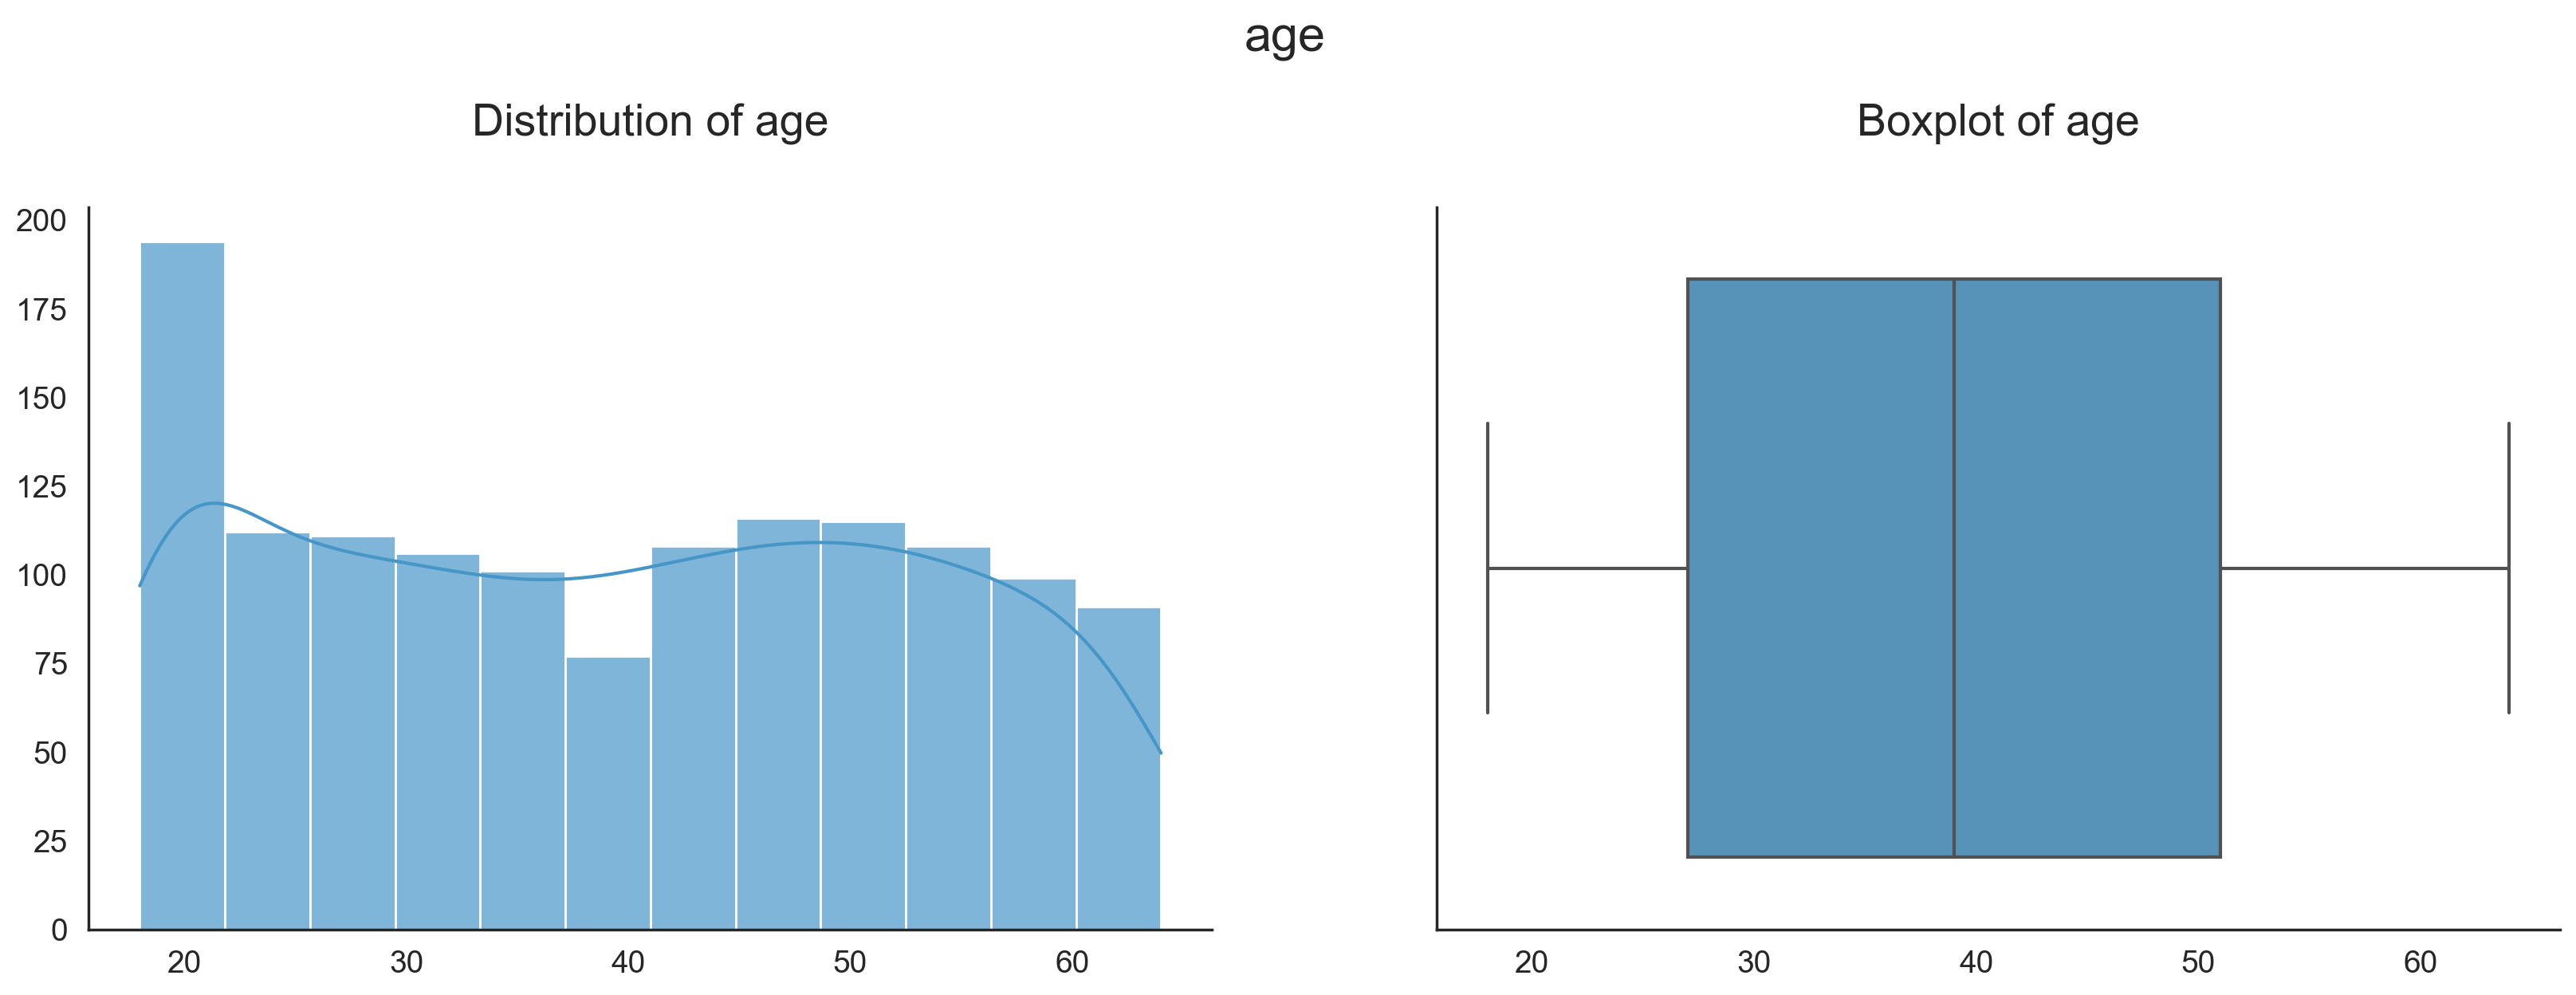

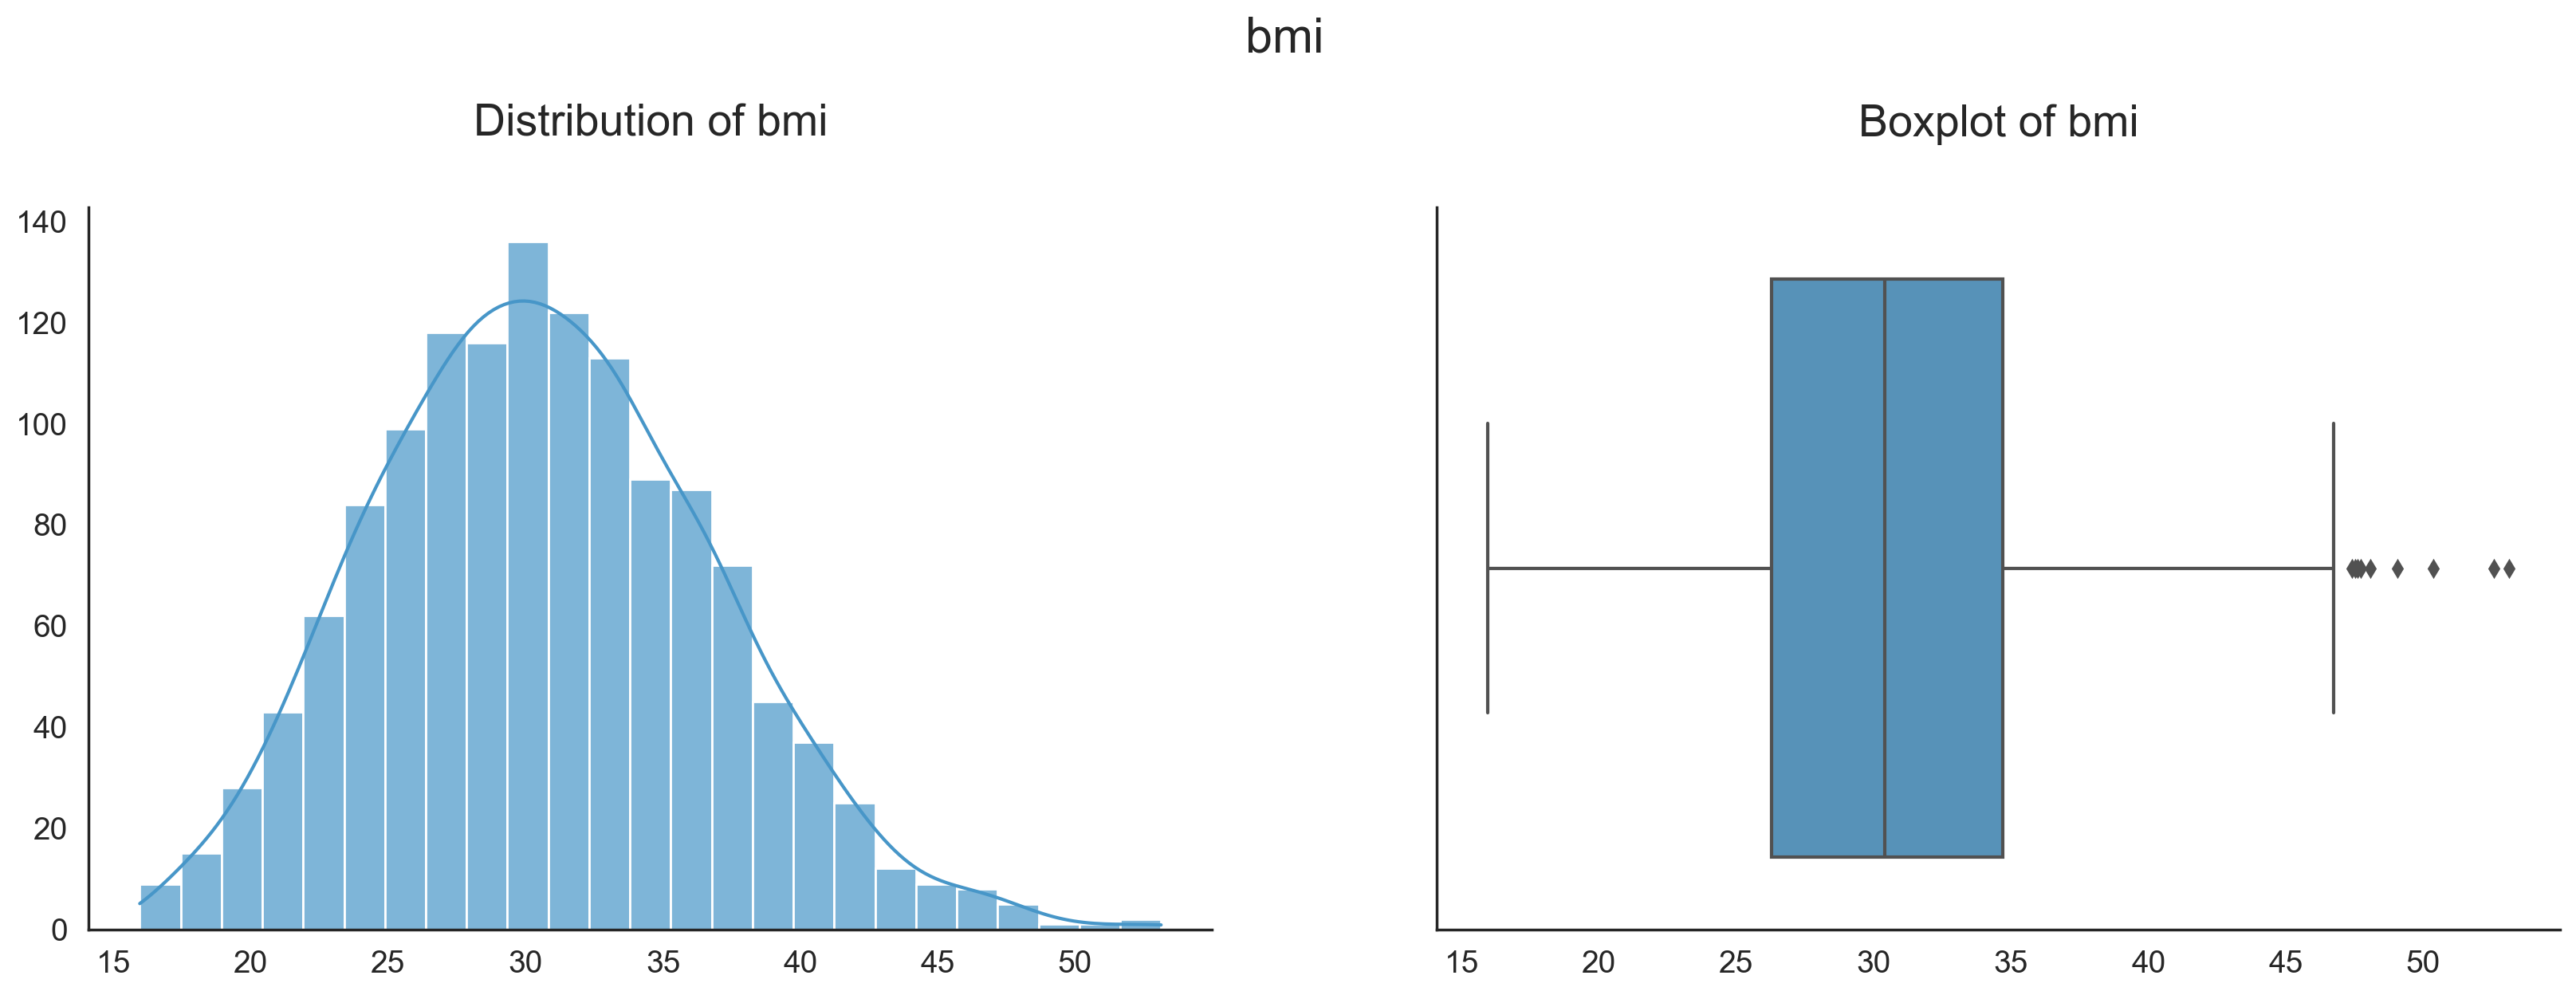

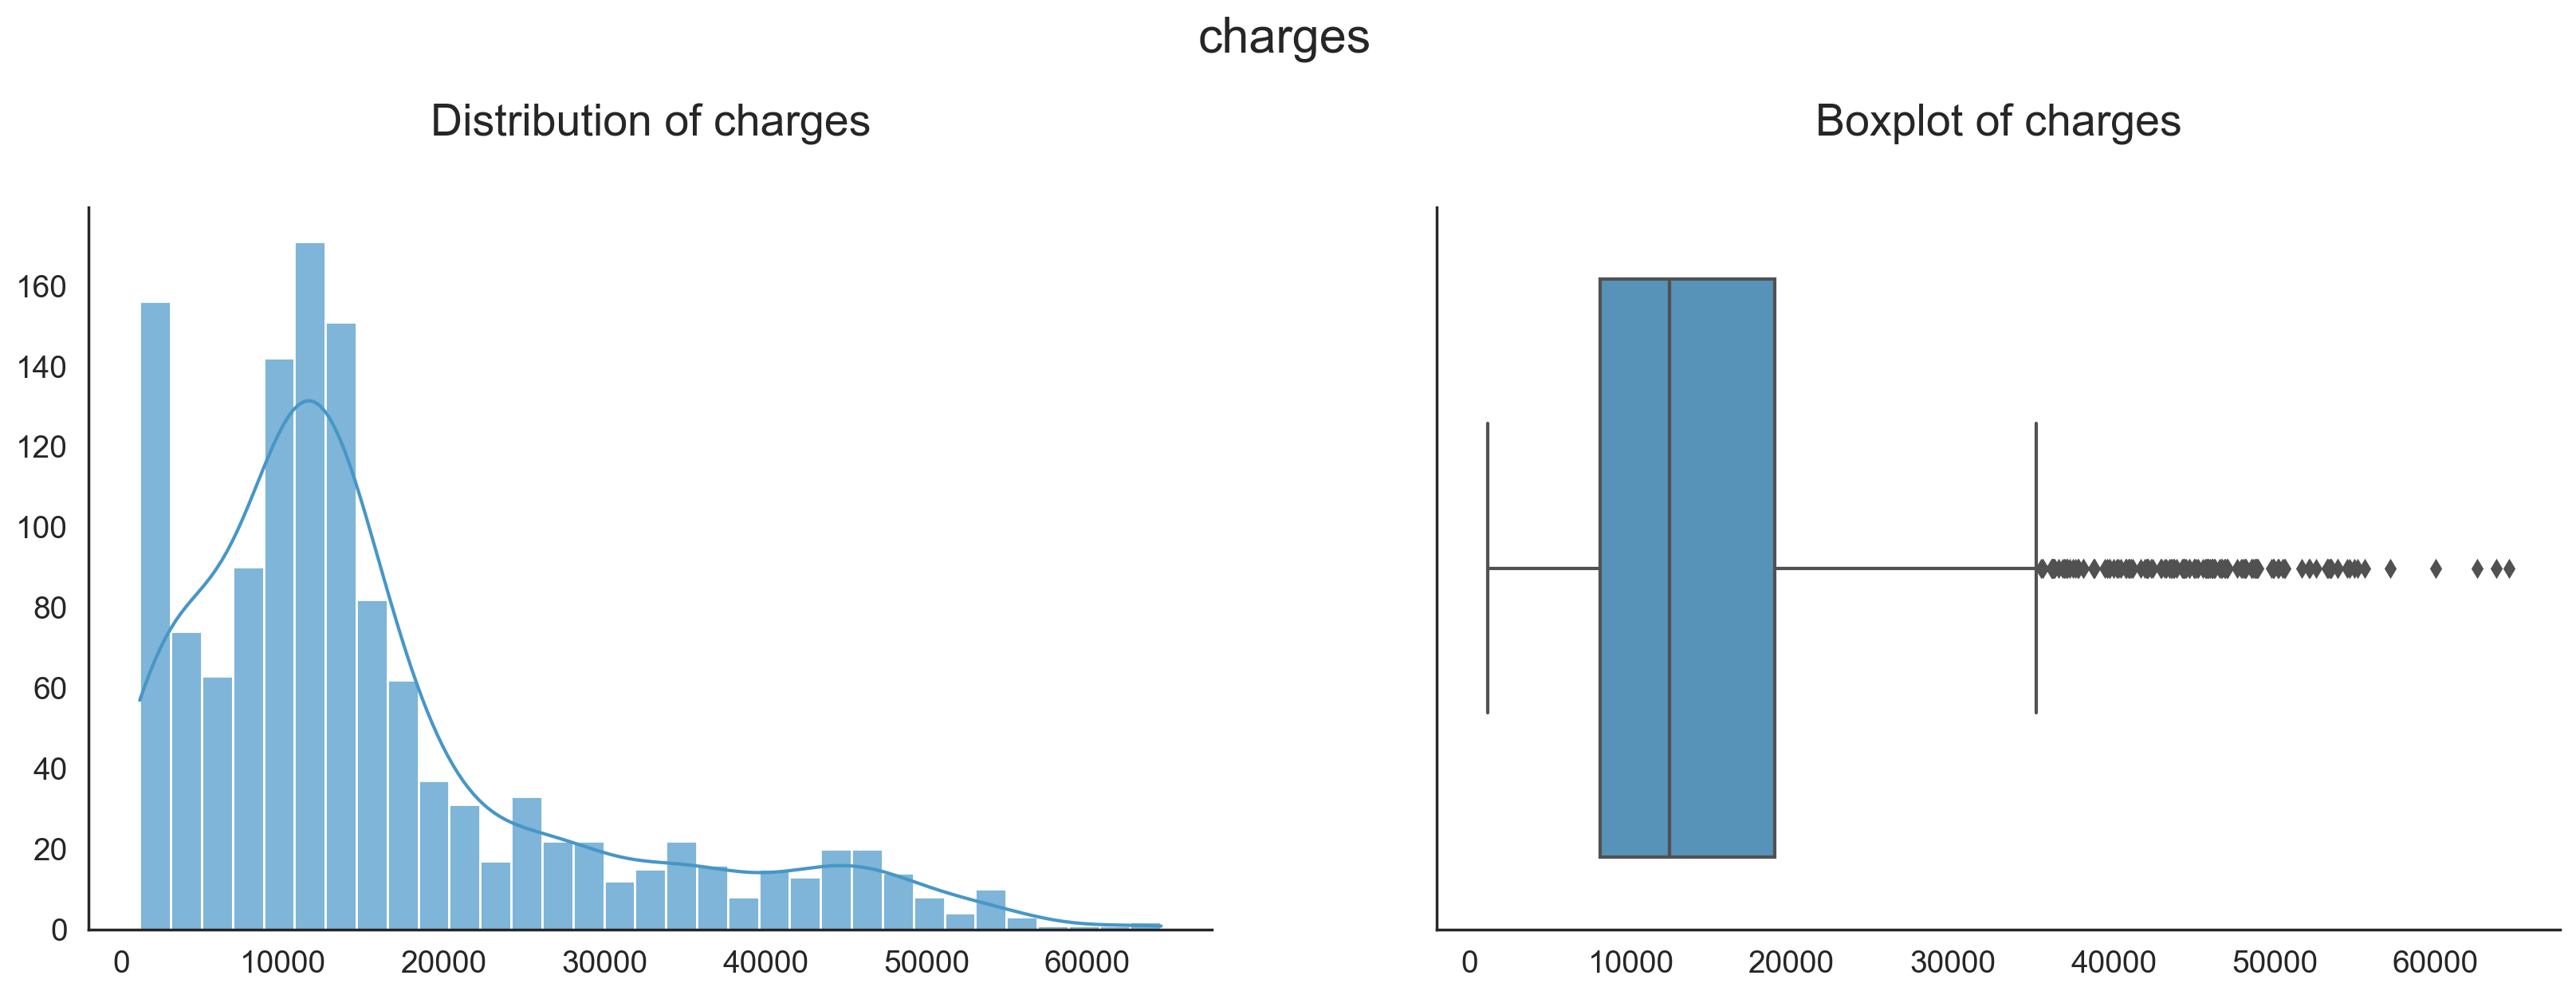

In [113]:
# Set the DPI (dots per inch) for better image quality
plt.rcParams['figure.dpi'] = 200

# Set the color palette
sns.set_palette(sns.color_palette(["#4796C8"]))

# Visualize the distribution of continuous numerical data
numerical_columns = df.select_dtypes(include=np.number).columns

for column in numerical_columns:
    if len(df[column].unique()) > 25:  # Condition for continuous features
        fig, ax = plt.subplots(1, 2, figsize=(20, 6))

        # Histogram with KDE
        sns.histplot(data=df[column], ax=ax[0], kde=True, alpha=0.7)
        ax[0].set_title(f'Distribution of {column}', fontsize=20, y=1.08)
        ax[0].set(xlabel=None, ylabel=None) # Remove x and y labels

        # Box plot
        sns.boxplot(x=df[column], ax=ax[1])  # 'x' instead of 'data' for horizontal
        ax[1].set_title(f'Boxplot of {column}', fontsize=20, y=1.08)
        ax[1].set(xlabel=None, ylabel=None) # Remove x and y labels

        fig.suptitle(column, fontsize=22, y=1.08)
        sns.despine()

        # Adjust tick text size
        ax[0].xaxis.set_tick_params(labelsize=14)
        ax[0].yaxis.set_tick_params(labelsize=14)
        ax[1].xaxis.set_tick_params(labelsize=14)
        ax[1].yaxis.set_tick_params(labelsize=14)

        plt.show()


---
### Distributions of Categorical & Discrete Numerical Features

Smokers represent roughly 20.5% (274 out of 1338) of the dataset, with non-smokers making up the remaining 79.5% (1064 out of 1338). Gender distribution is approximately even between males and females.

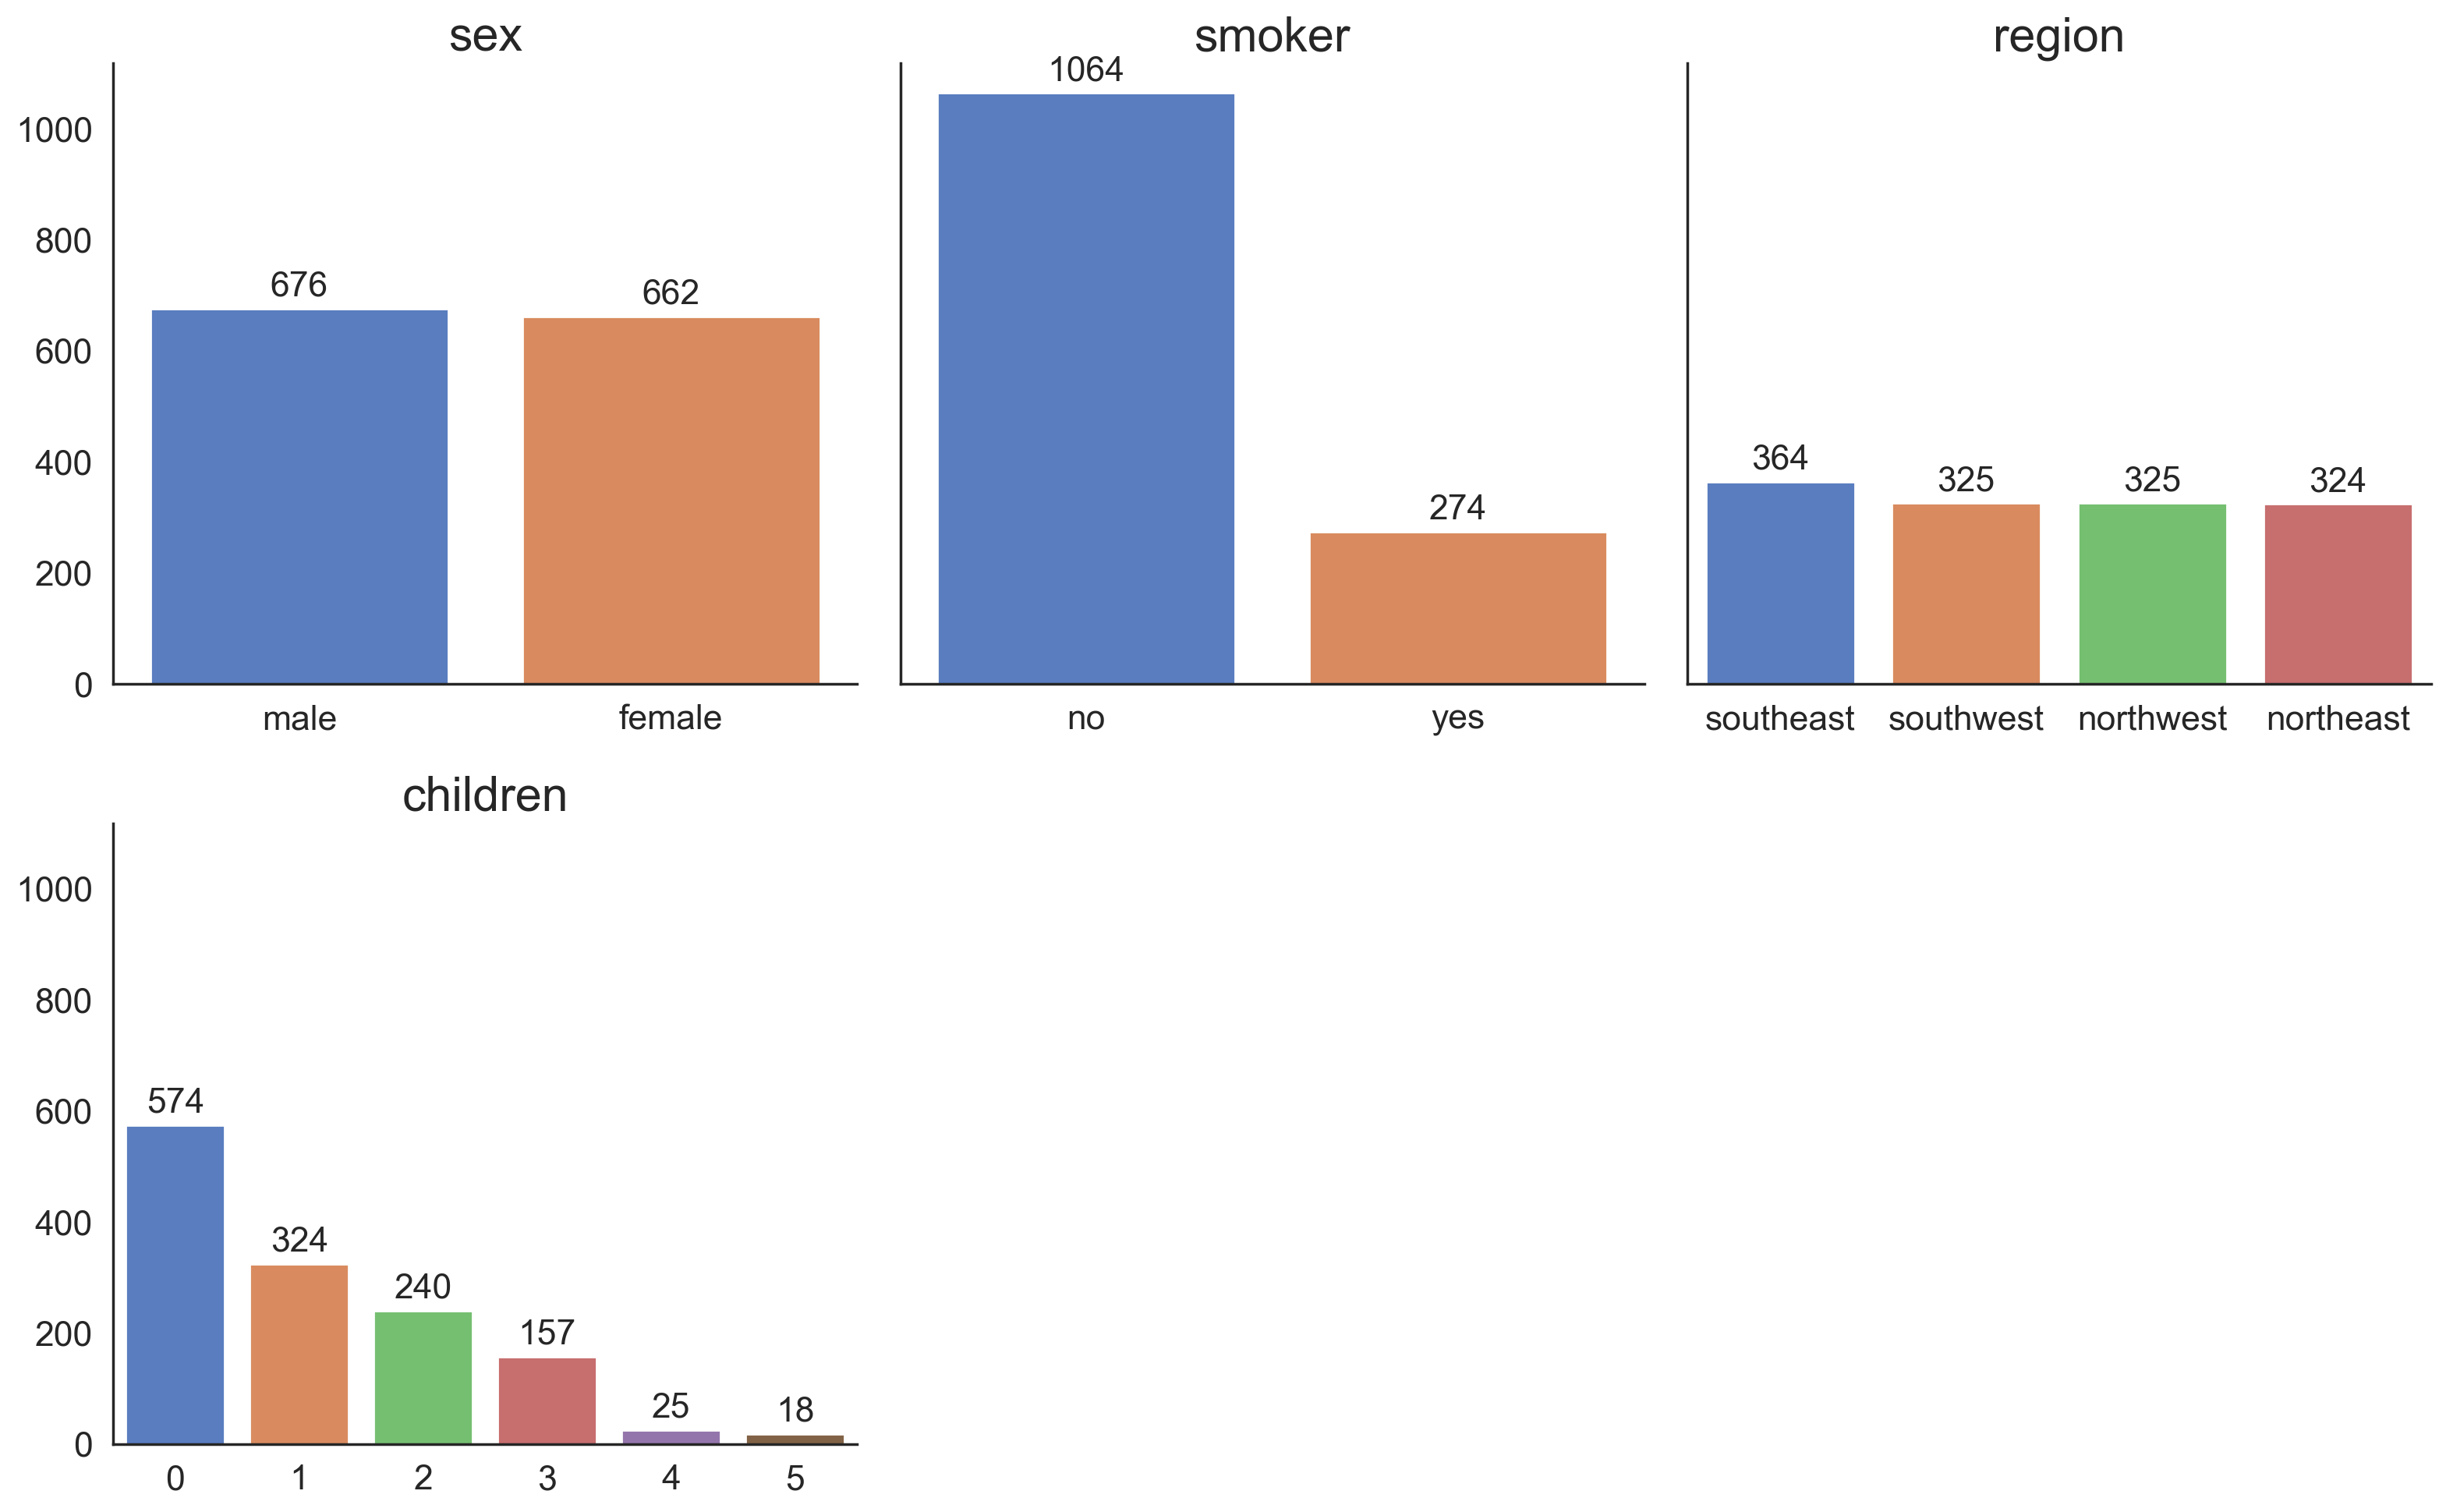

In [114]:
# Distribution of Categorical and Discrete Numerical Features

import math
custom_palette = sns.color_palette("muted")

# Set the DPI (dots per inch) for better image quality
plt.rcParams['figure.dpi'] = 200

# Select object columns and numerical columns with fewer than 25 unique values
var_list = df.select_dtypes(include=['object', "category", "bool"]).columns.tolist() + \
    [col for col in df.select_dtypes(include=np.number).columns if df[col].nunique() < 25]

rows = math.ceil(len(var_list) / 3)  # Calculate the number of rows required

# Create a grid of subplots
fig, axs = plt.subplots(rows, 3, figsize=(16, 5 * rows), sharey=True)

# Loop over the variables and their corresponding axes
for i, ax in zip(var_list, axs.flat):
    
    # Order bars by count
    order = df[i].value_counts().index
    
    sns_plot = sns.countplot(data=df, x=i, ax=ax, palette=custom_palette, order=order)
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_xticklabels(ax.get_xticklabels(), ha='center', fontsize=16)
    
    # Change size of y-tick labels (i.e., the numbers on y-axis)
    ax.tick_params(axis='y', labelsize=16)  # This line sets the font size of the y-axis labels.
    
    # Loop over the patches (bars in the graph)
    for p in sns_plot.patches:
        sns_plot.annotate(format(p.get_height(), '.0f'), 
                          (p.get_x() + p.get_width() / 2., p.get_height()), 
                          ha = 'center', 
                          va = 'center', 
                          xytext = (0, 10), 
                          textcoords = 'offset points',
                          fontsize=16) # size of the text

    ax.set_title(i, fontsize=22)
    sns.despine()

# Hide any unused subplots
for i in axs.flat[::-1][:rows*3-len(var_list)]:
    i.set_axis_off()

plt.tight_layout()
plt.show()

---
## Correlation Analysis with Charges

- Smoker status shows the highest correlation with charges, underscoring the impact of smoking on health expenses.
- Age and BMI also display moderate positive correlations, indicating their roles in higher healthcare costs.
- The number of children shows a slight positive correlation, hinting at higher costs with more dependents.
- The correlation of sex with charges is near zero, suggesting negligible influence.
- The region's correlation is weak, implying that location doesn't significantly affect charges.

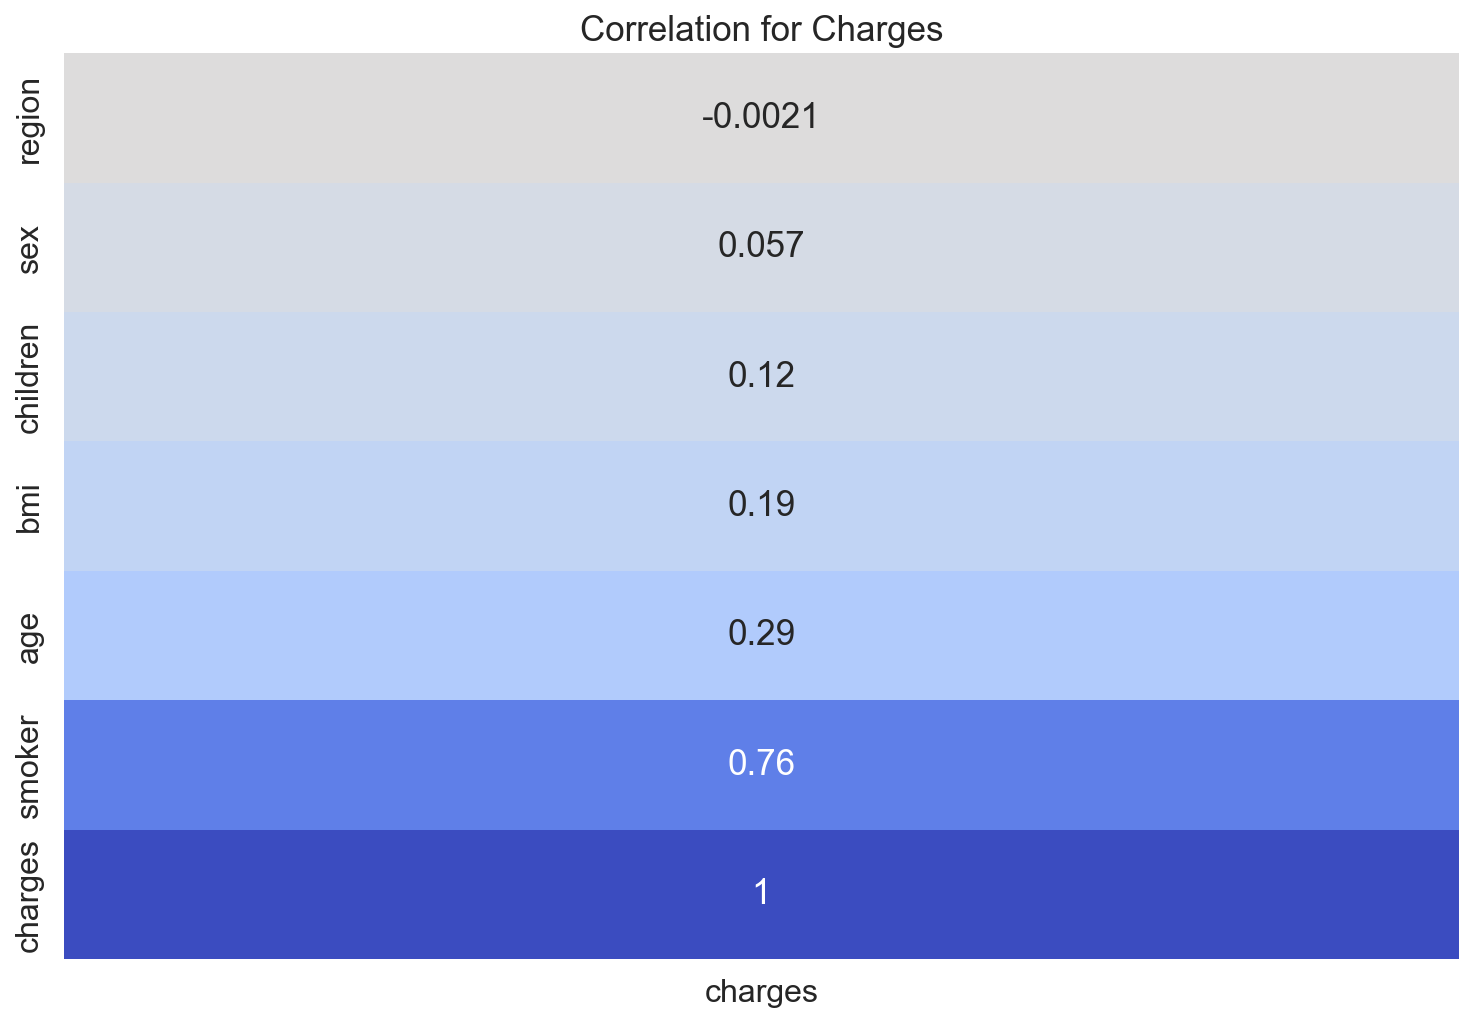

In [115]:
# Load copy of the dataset
df_copy = df.copy()

# Convert 'sex' and 'smoker' columns to categorical
df_copy['sex'] = df_copy['sex'].astype('category')
df_copy['smoker'] = df_copy['smoker'].astype('category')

# Convert 'region' to categorical and order it by the mean 'charges' in each region
df_copy['region'] = df_copy['region'].astype('category')
df_copy['region'] = df_copy['region'].cat.reorder_categories(df_copy.groupby('region')['charges'].mean().sort_values().index)

# Encode 'sex' and 'smoker' columns
df_copy['sex'] = df_copy['sex'].cat.codes
df_copy['smoker'] = df_copy['smoker'].cat.codes
df_copy['region'] = df_copy['region'].cat.codes

# Set the DPI (dots per inch) for better image quality
plt.rcParams['figure.dpi'] = 150

# Compute the correlation vector for "charges"
corr = df_copy.corr()["charges"].sort_values().to_frame()

# Plot the heatmap
plt.figure(figsize = (12,8))
sns.heatmap(corr, annot=True, cmap="coolwarm_r", cbar=None, vmin=-1, vmax=+1, center=0)
plt.title("Correlation for Charges")
plt.show()

---
## Charges Distribution Insights

- Most smokers incur higher charges compared to non-smokers.
- Significant non-smokers also exhibit high charges, suggesting other contributing factors.
- Further analysis will uncover characteristics of these high-charge non-smokers.

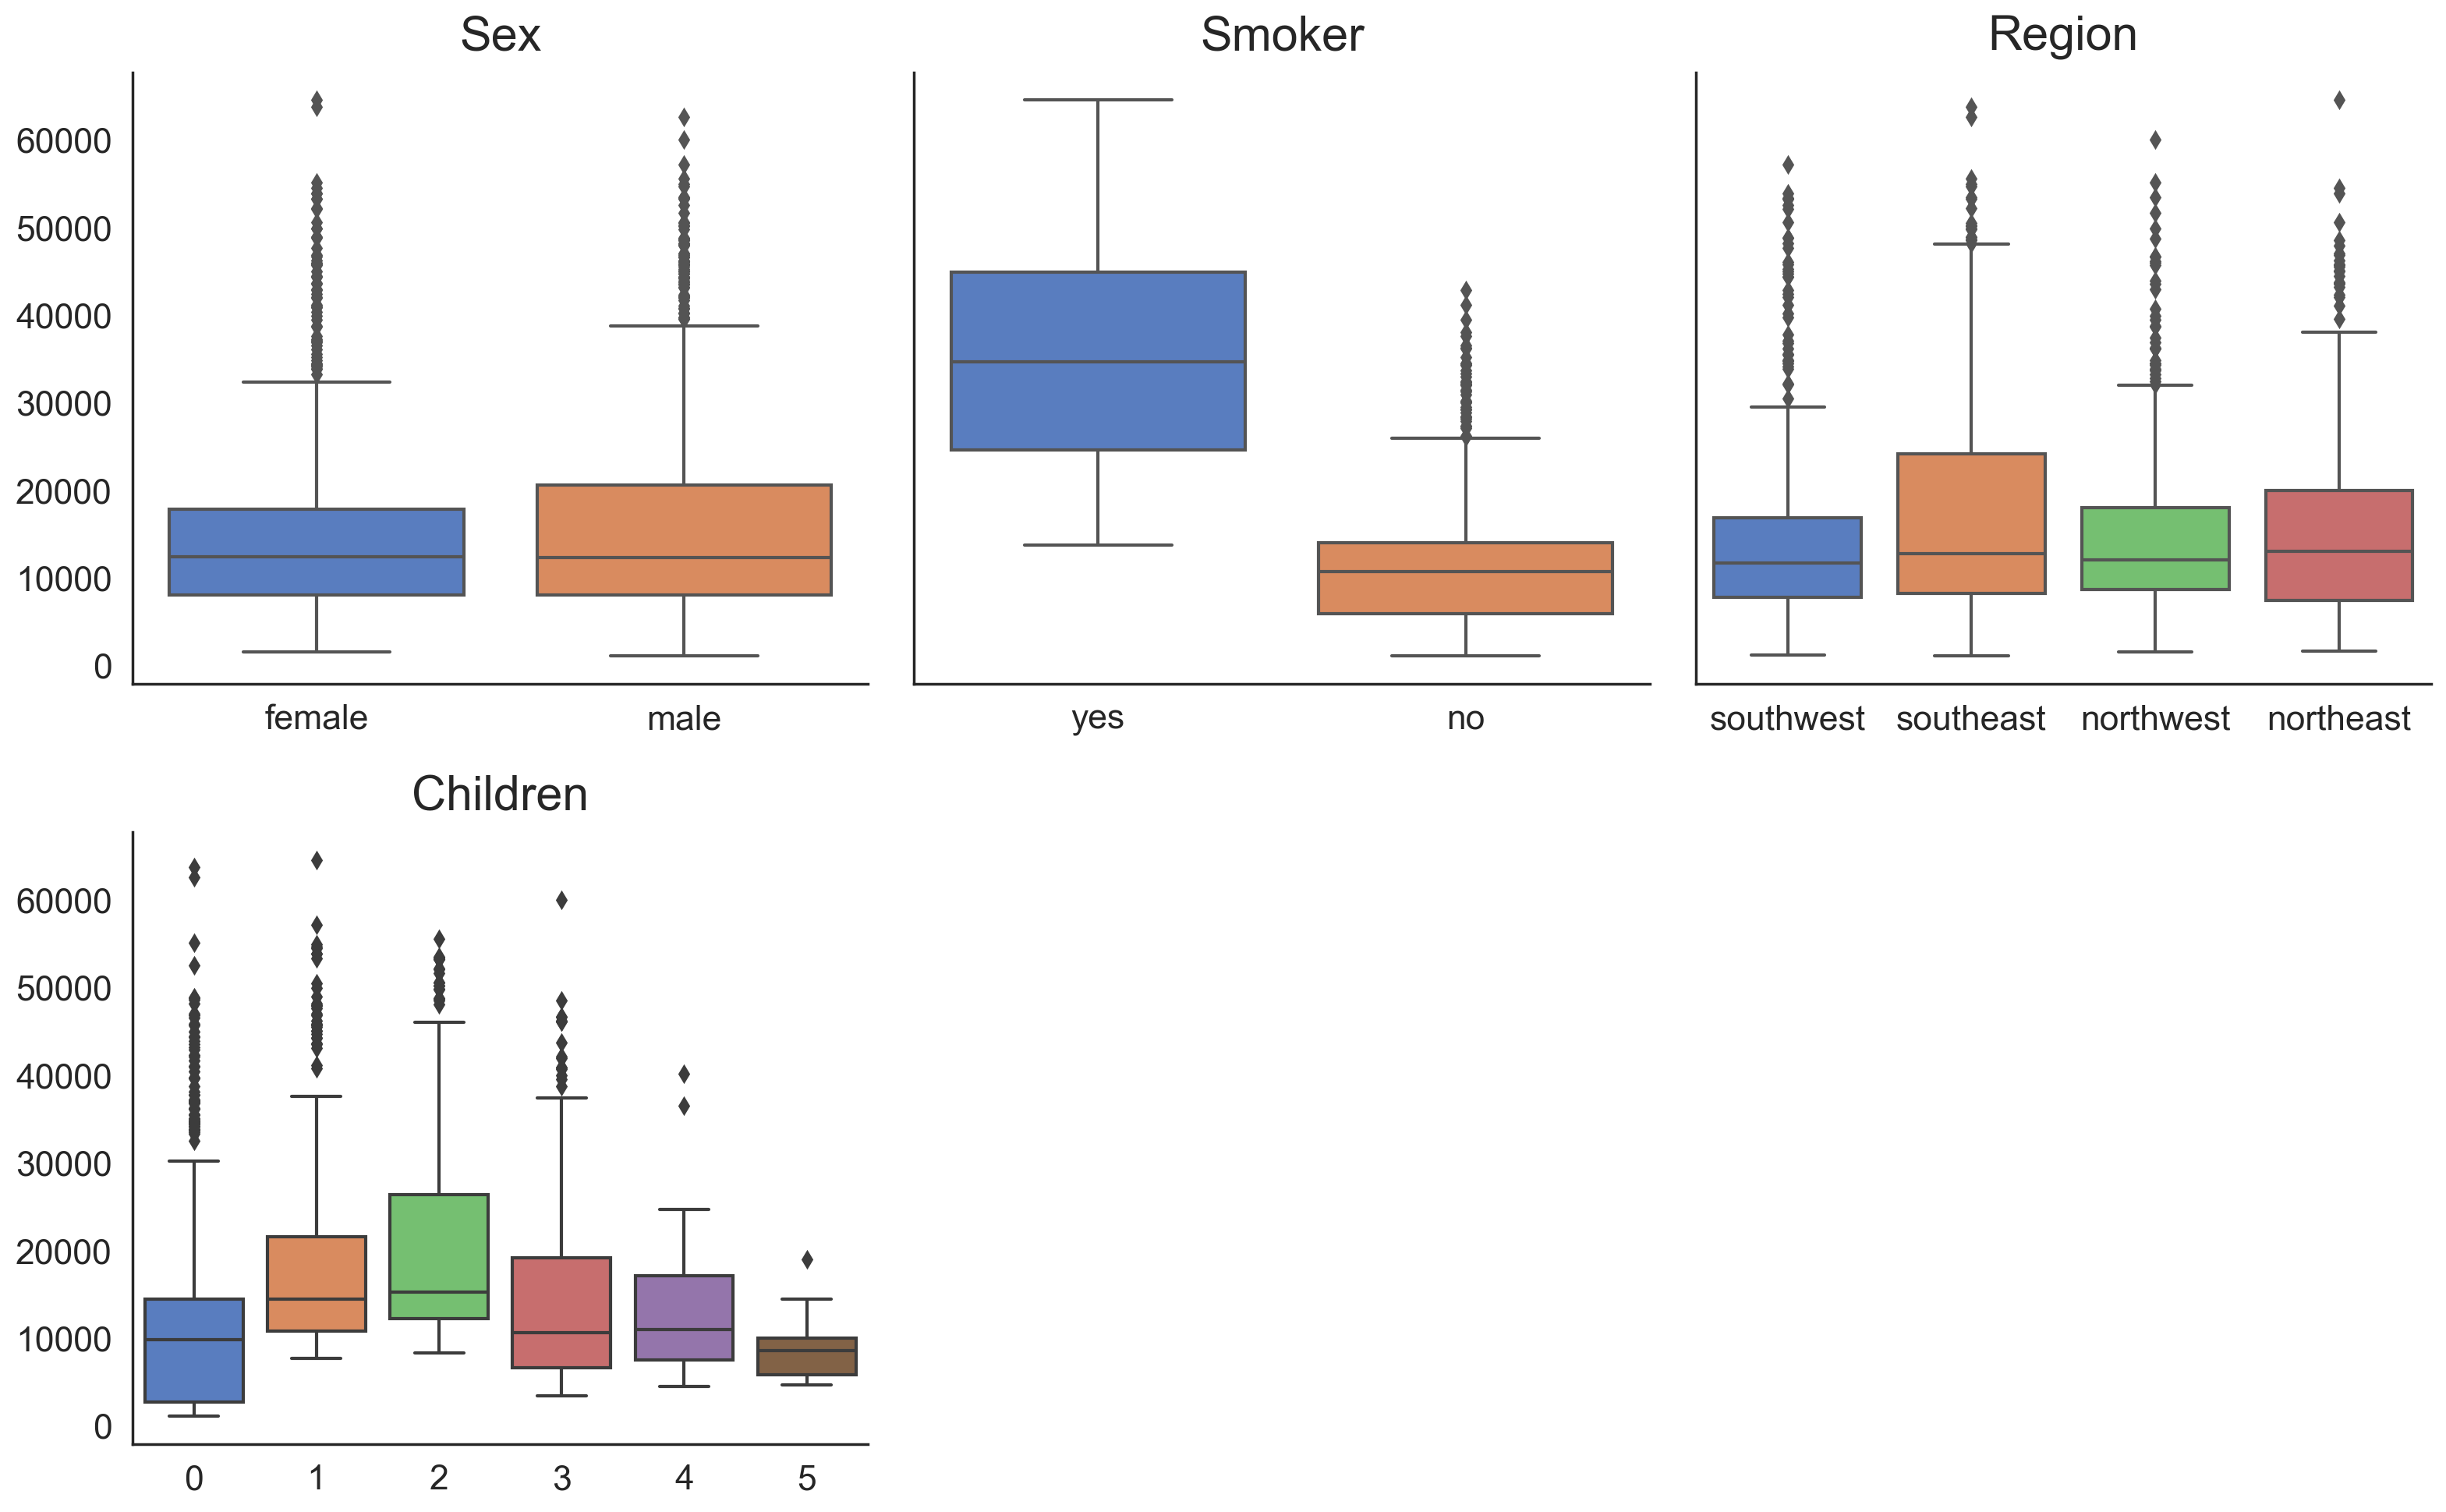

In [116]:
# Set the DPI (dots per inch) for better image quality
plt.rcParams['figure.dpi'] = 200

# Select object columns and numerical columns with fewer than 25 unique values
var_list = df.select_dtypes(include=['object', "category", "bool"]).columns.tolist() + \
           [col for col in df.select_dtypes(include=np.number).columns if df[col].nunique() < 25]

rows = math.ceil(len(var_list) / 3)  # Calculate the number of rows required

# Create a grid of subplots
fig, axs = plt.subplots(rows, 3, figsize=(16, 5 * rows), sharey=True)

# Loop over the variables and their corresponding axes
for i, ax in zip(var_list, axs.flat):
    sns.boxplot(data=df, x=i, y='charges', ax=ax, palette=custom_palette)
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_xticklabels(ax.get_xticklabels(), ha='center', fontsize=16)

    # Change size of y-tick labels (i.e., the numbers on y-axis)
    ax.tick_params(axis='y', labelsize=16)

    # Add a fitting title inside the plot
    ax.set_title(f'{i.capitalize()}', fontsize=22, pad=10)
    sns.despine()

# Hide any unused subplots
for i in axs.flat[::-1][:rows * 3 - len(var_list)]:
    i.set_axis_off()

plt.tight_layout()
plt.show()


---

## The Interplay of Smoking, BMI, and Charges

- Smoking status and BMI significantly influence medical charges.
- Among smokers, there's a pronounced correlation between BMI and charges.

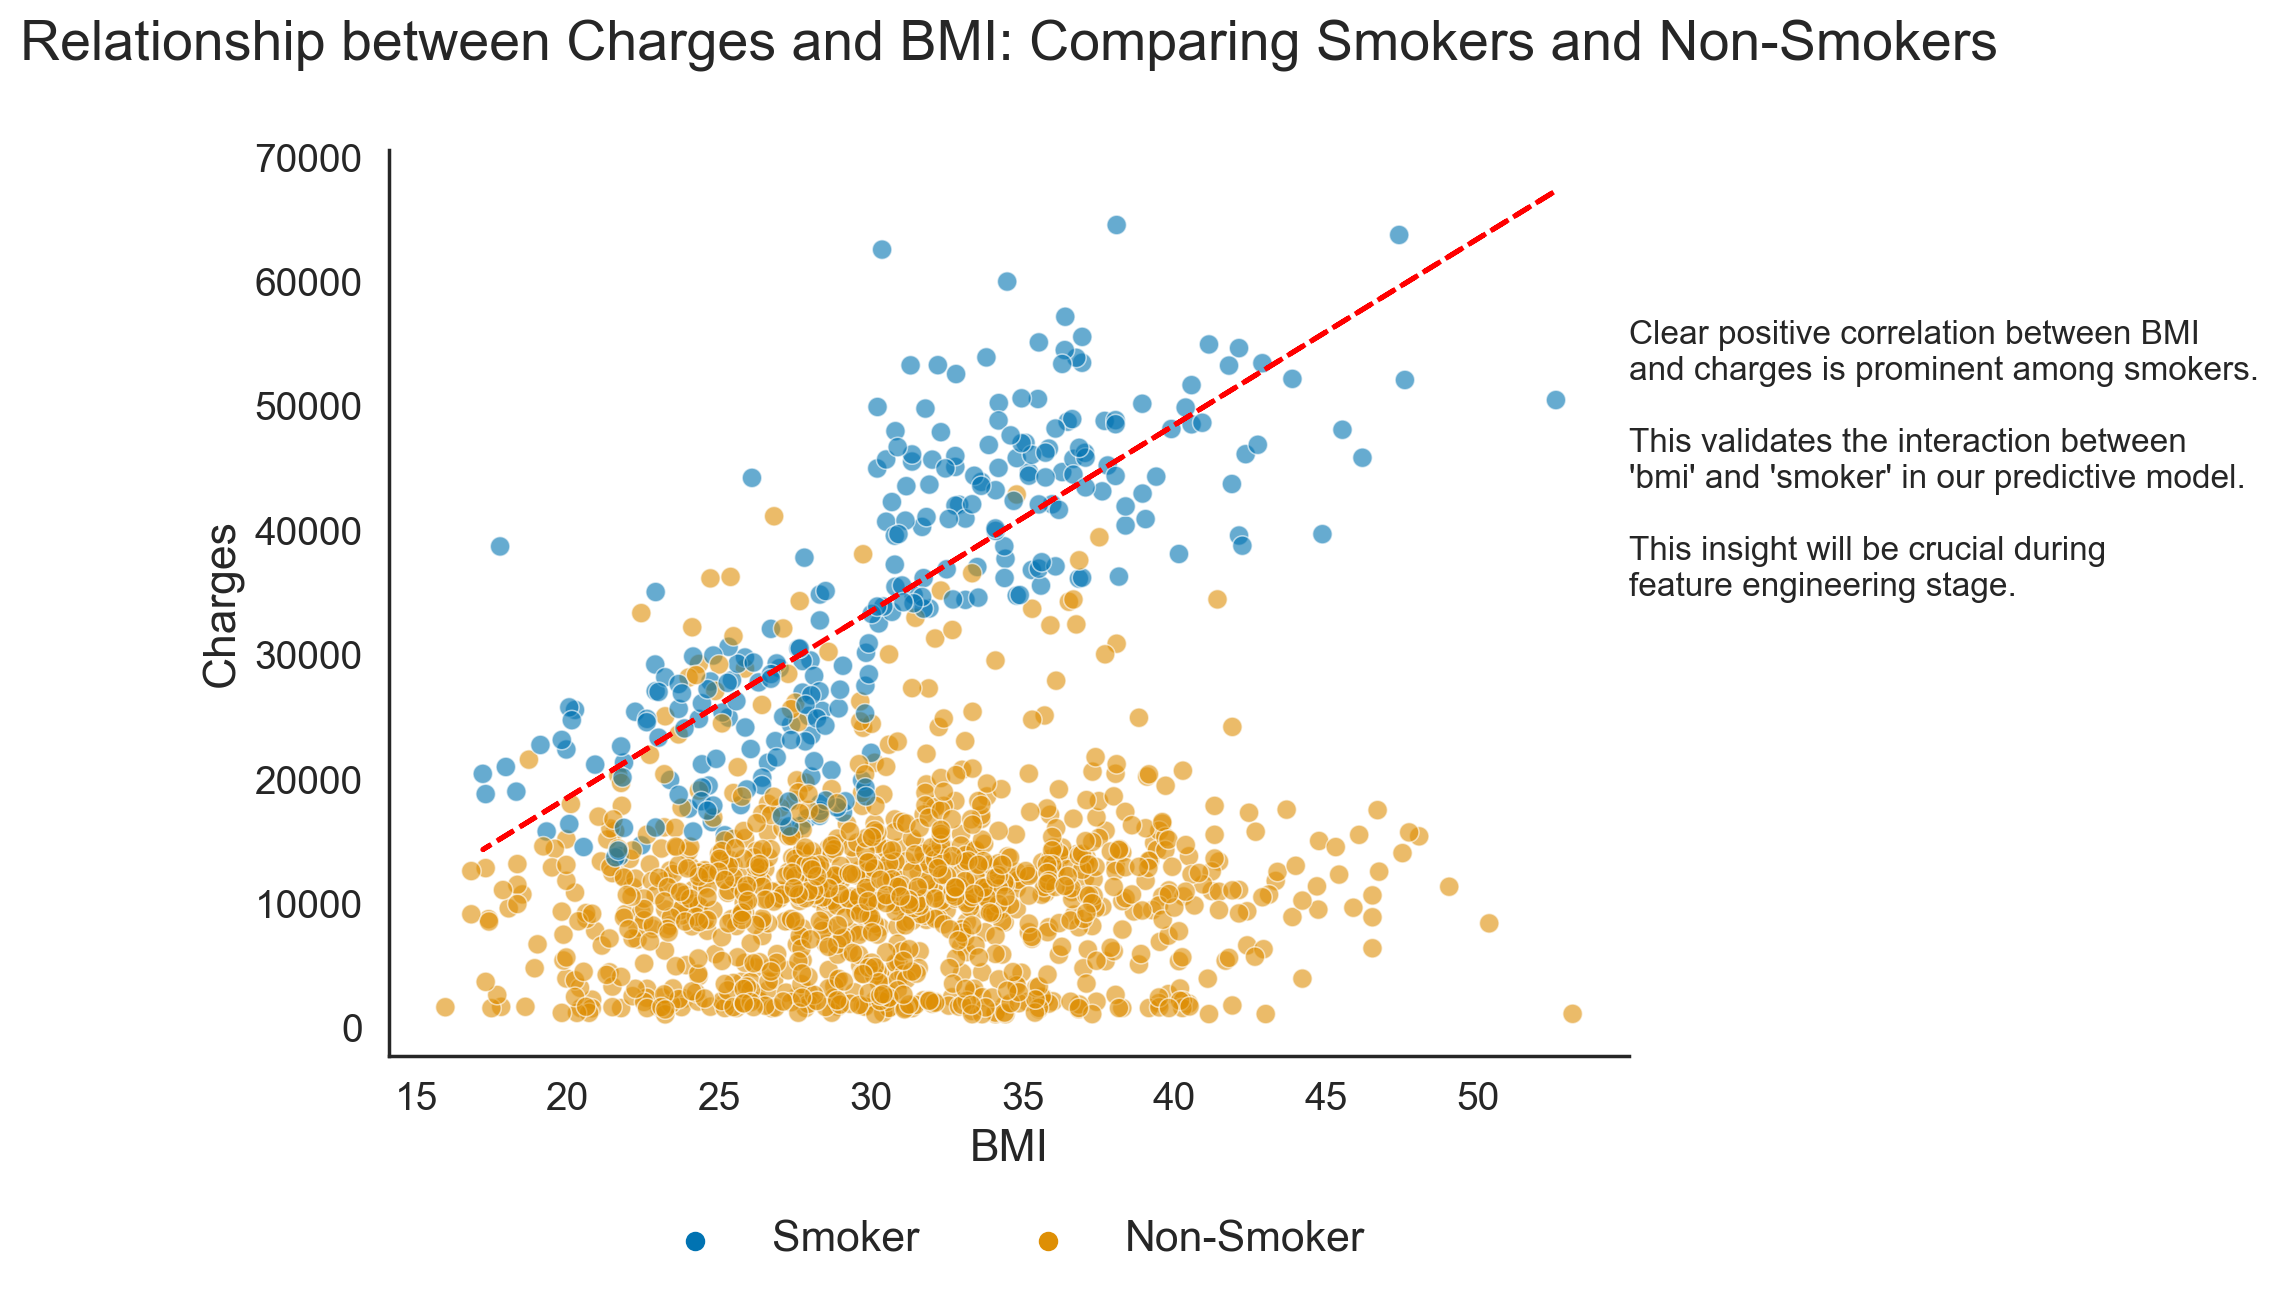

In [119]:
# Set the DPI (dots per inch) for better image quality
plt.rcParams['figure.dpi'] = 200

# Make a copy of the original dataframe
df_copy = df.copy()

# Change 'yes' and 'no' to 'Smoker' and 'Non-Smoker' in the copy
df_copy['smoker'] = df_copy['smoker'].map({'yes': 'Smoker', 'no': 'Non-Smoker'})

# Create a scatter plot of charges against BMI
plt.figure(figsize=(8, 6))

# Plot the overall data
sns.scatterplot(data=df_copy, x='bmi', y='charges', hue='smoker', alpha=0.6, s=50, legend=True, palette="colorblind")

# Fit regression line for smokers
smoker_data = df_copy[df_copy['smoker'] == 'Smoker']
regression_coeffs = np.polyfit(smoker_data['bmi'], smoker_data['charges'], 1)
regression_line = np.polyval(regression_coeffs, smoker_data['bmi'])
plt.plot(smoker_data['bmi'], regression_line, color='red', linestyle='dashed', linewidth=1.8)

plt.xlabel('BMI', fontsize=16)
plt.ylabel('Charges', fontsize=16)
plt.title('Relationship between Charges and BMI: Comparing Smokers and Non-Smokers', fontsize=20, y=1.08)
sns.despine()

# Add annotation
plt.annotate("Clear positive correlation between BMI\nand charges is prominent among smokers.\n\nThis validates the interaction between\n'bmi' and 'smoker' in our predictive model.\n\nThis insight will be crucial during\nfeature engineering stage.",
             xy=(1, 0.5), xycoords='axes fraction', fontsize=12, va='bottom', ha='left')


# Move the legend
plt.legend(bbox_to_anchor=(0.5, -0.14), loc='upper center', ncol=2, frameon=False)

# Adjust tick text size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Hide gridlines
plt.grid(False)  

plt.show()


---

## High-Charge Non-Smokers
- Interestingly, around 7% of non-smokers exhibit unusually high medical charges, diverging from common patterns.
- We'll engineer a feature encapsulating this anomalous behavior, hoping to improve our model's performance.

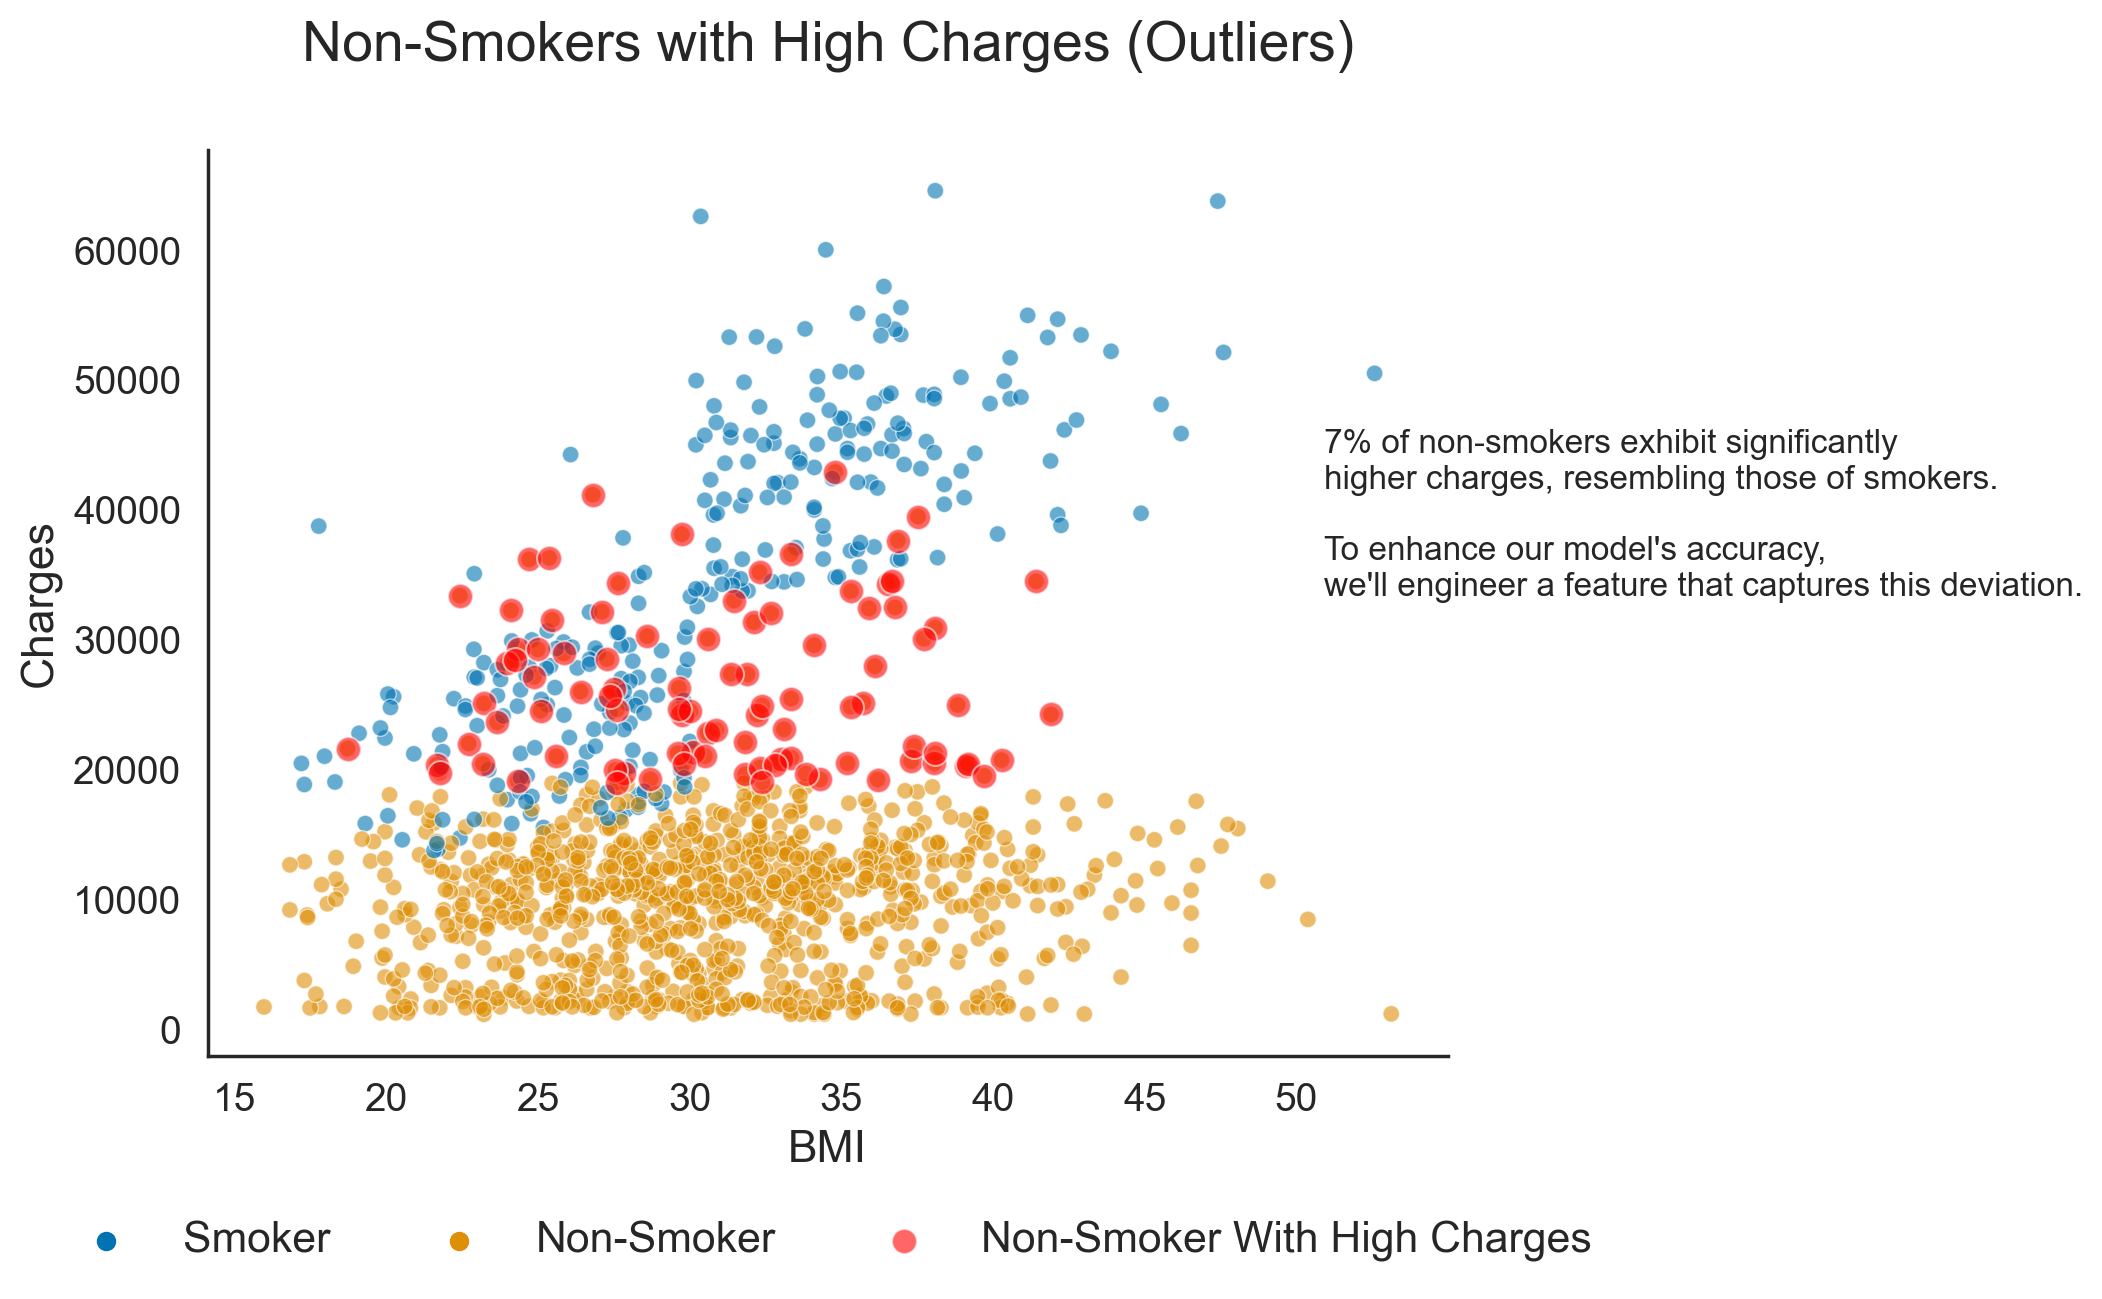

In [124]:
# Set the DPI (dots per inch) for better image quality
plt.rcParams['figure.dpi'] = 200

# Make a copy of the original dataframe
df_copy = df.copy()

# Change 'yes' and 'no' to 'Smoker' and 'Non-Smoker' in the copy
df_copy['smoker'] = df_copy['smoker'].map({'yes': 'Smoker', 'no': 'Non-Smoker'})

# Isolate non-smokers with charges above 75th percentile
non_smoker_outliers = df[(df['smoker'] == 'no') & (df['charges'] > df['charges'].quantile(0.75))]

# Calculate mean and standard deviation of BMI
mean_bmi = df['bmi'].mean()
std_bmi = df['bmi'].std()

# Isolate non-smokers with charges above 75th percentile and BMI > 1 standard deviation above the mean
non_smoker_bmi_outliers = non_smoker_outliers[(non_smoker_outliers['bmi'] > mean_bmi + std_bmi)]

# Calculate percentage of non-smoker outliers
non_smoker_outliers_count = non_smoker_outliers.shape[0]
non_smoker_outliers_percent = non_smoker_outliers_count / len(df) * 100

# Create a scatter plot of charges against BMI
plt.figure(figsize=(8, 6))

# Plot overall data with BMI on x-axis and charges on y-axis, distinguishing smokers and non-smokers with colors
scatter = sns.scatterplot(data=df_copy, x='bmi', y='charges', hue='smoker', alpha=0.6, palette="colorblind")

# Highlight non-smoker outliers with high charges in red
scatter = sns.scatterplot(data=non_smoker_outliers, x='bmi', y='charges', color='red', label='Non-Smoker With High Charges', alpha=0.6, s=80, legend=False)

# Label x-axis as BMI and y-axis as Charges
plt.xlabel('BMI', fontsize=16)
plt.ylabel('Charges', fontsize=16)

# Give the plot a title
plt.title('Non-Smokers with High Charges (Outliers)', fontsize=20, y=1.08)

# Remove top and right borders for cleaner look
sns.despine()

# Rename and move the legend
legend_texts = ['Non-Smoker', 'Smoker', 'Non-Smoker With High Charges']  # the labels you want
for t, l in zip(scatter.legend_.texts, legend_texts): t.set_text(l)
plt.legend(bbox_to_anchor=(0.5, -0.14), loc='upper center', ncol=3, frameon=False)

# Adjust tick text size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Hide gridlines
plt.grid(False)  

# Add annotation about the percentage of non-smoker outliers
plt.annotate(f"{non_smoker_outliers_percent:.0f}% of non-smokers exhibit significantly\nhigher charges, resembling those of smokers.\n\nTo enhance our model's accuracy,\nwe'll engineer a feature that captures this deviation.",
             xy=(0.9, 0.5), xycoords='axes fraction', fontsize=12, va='bottom', ha='left')

# Display the plot
plt.show()


---

## Age Influence on High-Charge Non-Smokers
- Among non-smokers with high charges, 65% are over 40 years old.

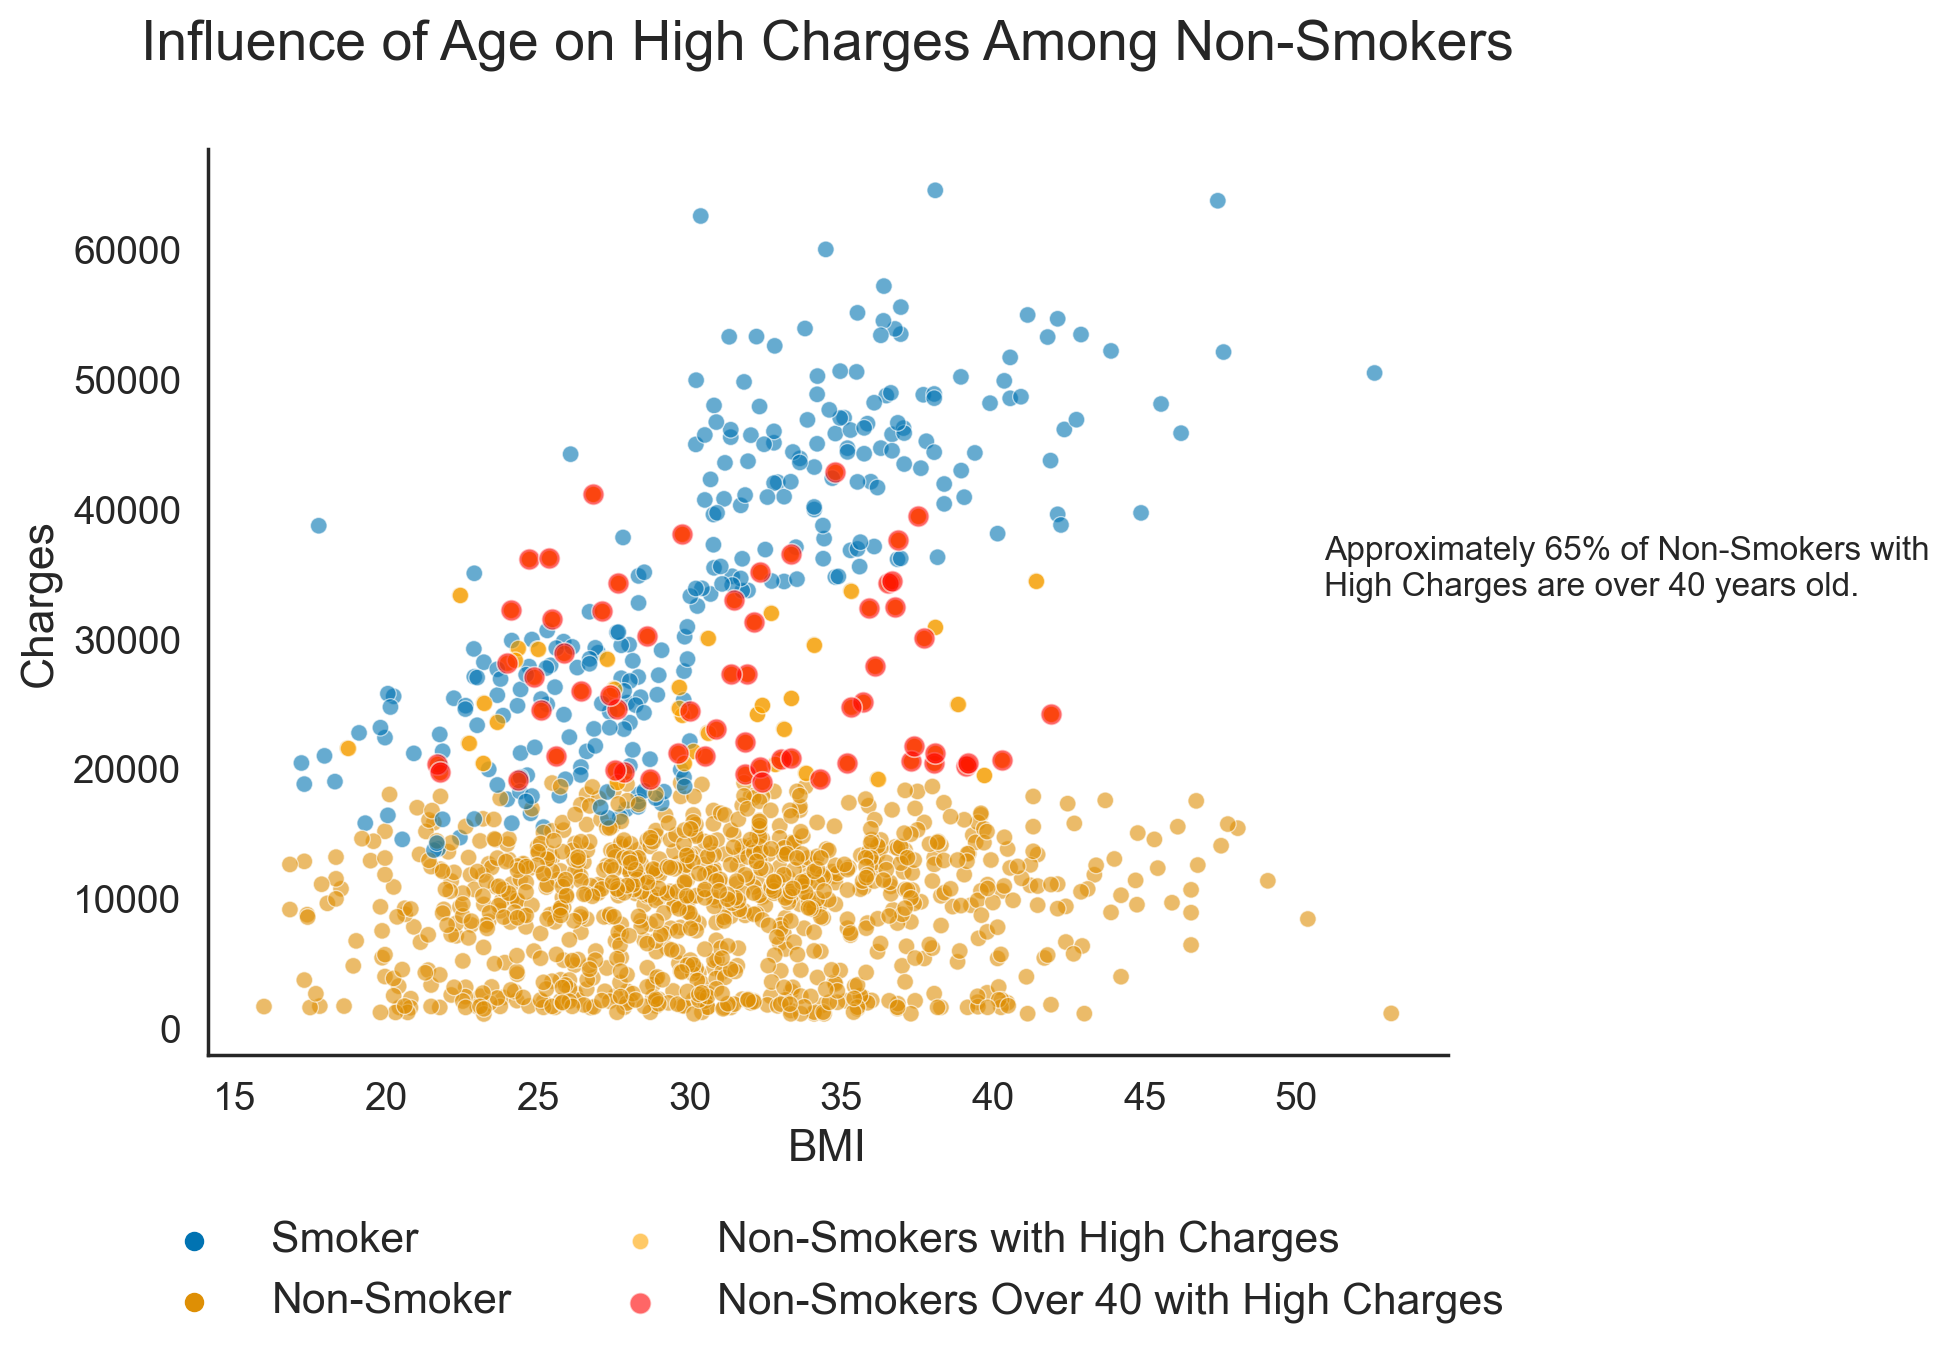

In [125]:
# Set the DPI (dots per inch) for better image quality
plt.rcParams['figure.dpi'] = 200

# Make a copy of the original dataframe
df_copy = df.copy()

# Change 'yes' and 'no' to 'Smoker' and 'Non-Smoker' in the copy
df_copy['smoker'] = df_copy['smoker'].map({'yes': 'Smoker', 'no': 'Non-Smoker'})

# Identify the non-smokers over 40 with charges above the 75th percentile
non_smoker_outliers_over_40 = non_smoker_outliers[non_smoker_outliers['age'] > 40]

# Calculate the percentage of non-smoker outliers over 40
non_smoker_outliers_over_40_count = non_smoker_outliers_over_40.shape[0]
non_smoker_outliers_over_40_percent = (non_smoker_outliers_over_40_count / non_smoker_outliers_count) * 100

# Create a scatter plot of charges against BMI
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_copy, x='bmi', y='charges', hue='smoker', alpha=0.6, palette="colorblind")

# Highlight non-smoker outliers with high charges
sns.scatterplot(data=non_smoker_outliers, x='bmi', y='charges', color='orange', alpha=0.6, label='Non-Smokers with High Charges')

# Highlight non-smoker outliers over 40 with high charges
sns.scatterplot(data=non_smoker_outliers_over_40, x='bmi', y='charges', color='red', label='Non-Smokers Over 40 with High Charges', s=60, alpha=0.6)

# Customize plot
plt.xlabel('BMI', fontsize=16)
plt.ylabel('Charges', fontsize=16)
plt.title('Influence of Age on High Charges Among Non-Smokers', fontsize=20, y=1.08)
plt.legend(bbox_to_anchor=(0.5, -0.14), loc='upper center', ncol=2, frameon=False)

# Add annotation about the percentage of non-smoker outliers
plt.annotate(f"Approximately {non_smoker_outliers_over_40_percent:.0f}% of Non-Smokers with\nHigh Charges are over 40 years old.",
             xy=(0.9, 0.5), xycoords='axes fraction', fontsize=12, va='bottom', ha='left')

# Adjust tick text size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Hide gridlines
plt.grid(False)  

# Remove top and right borders
sns.despine()
plt.show()


---

## Age and Charges: Principal Observations
- Non-smokers exhibit three charge "bands", mildly rising with age.
- For smokers, charges increase with age.
- Band variations underscore the presence of other contributory factors.

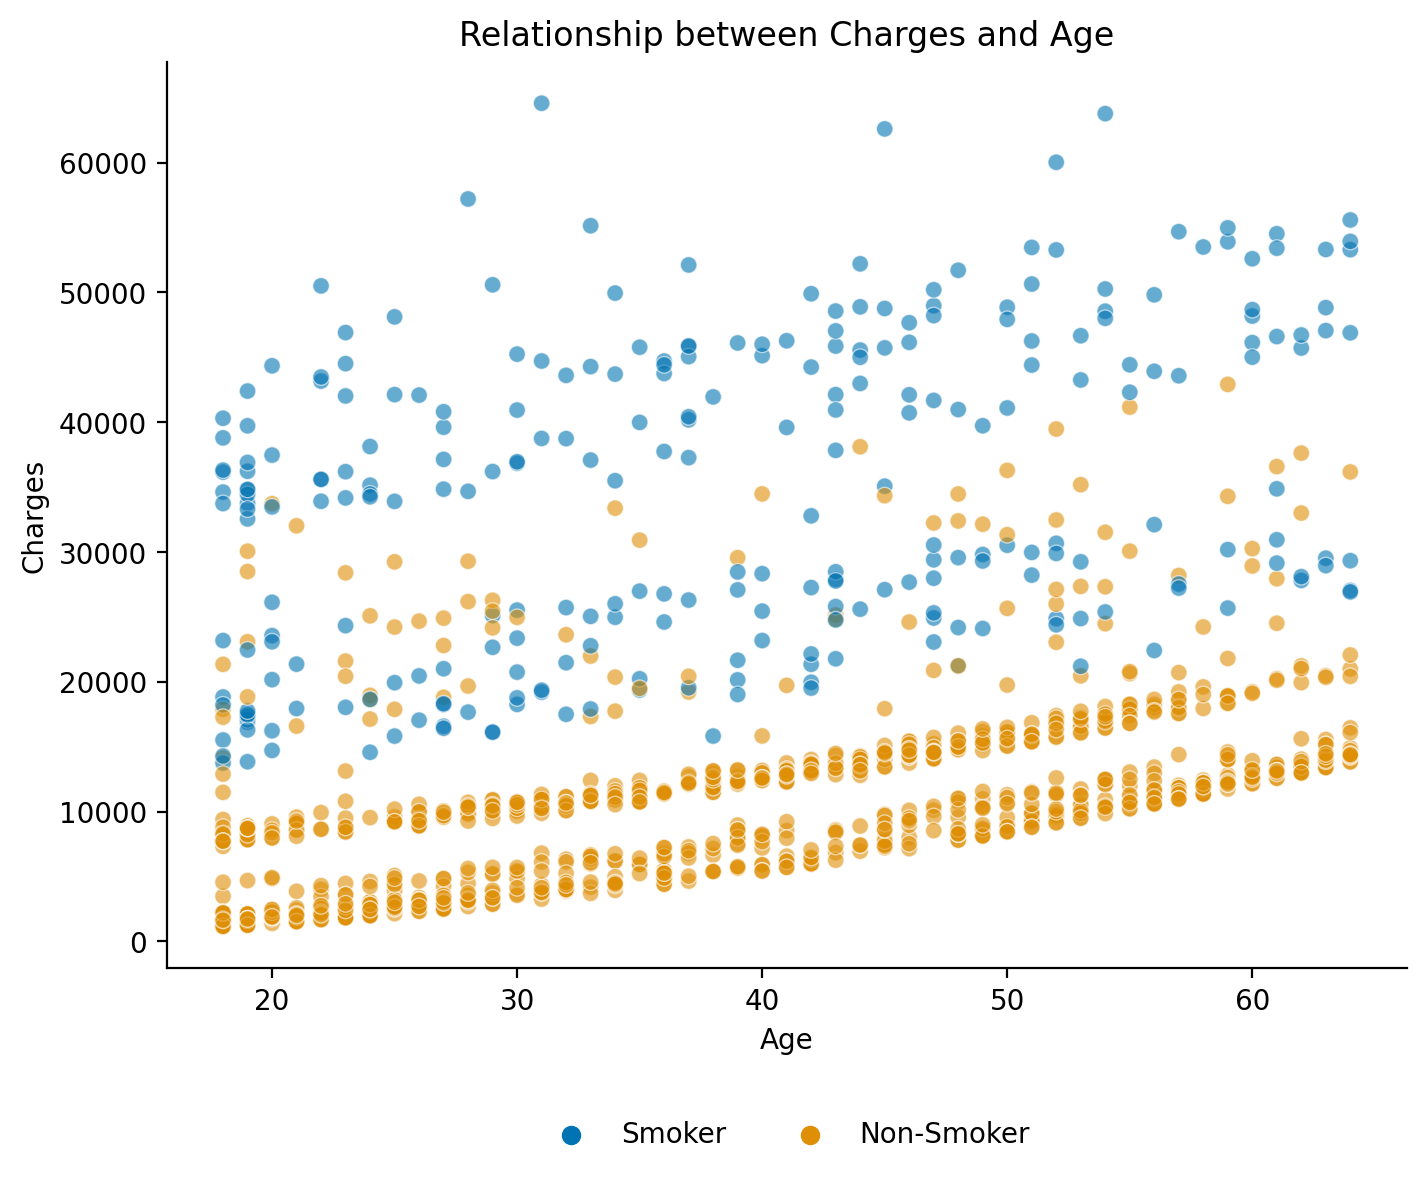

In [12]:
# Set the DPI (dots per inch) for better image quality
plt.rcParams['figure.dpi'] = 200

# Make a copy of the original dataframe
df_copy = df.copy()

# Change 'yes' and 'no' to 'Smoker' and 'Non-Smoker' in the copy
df_copy['smoker'] = df_copy['smoker'].map({'yes': 'Smoker', 'no': 'Non-Smoker'})

# Create a scatter plot of charges against age
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_copy, x='age', y='charges', hue='smoker', alpha=0.6, palette="colorblind")

plt.title('Relationship between Charges and Age')
plt.xlabel('Age')
plt.ylabel('Charges')

# Customize plot
plt.legend(bbox_to_anchor=(0.5, -0.14), loc='upper center', ncol=3, frameon=False)
sns.despine()

# Hide gridlines
plt.grid(False)  

plt.show()


---

## Further Analysis on Young High-Charge Non-Smokers
- Delving deeper into high-charge non-smokers under 40, we assessed their charges by sex and region.
- Such outliers slightly lean towards the female demographic.
- The Southwest region has a noticeably lower representation in this group.
- Unidentified factors or randomness could be driving these high charges.

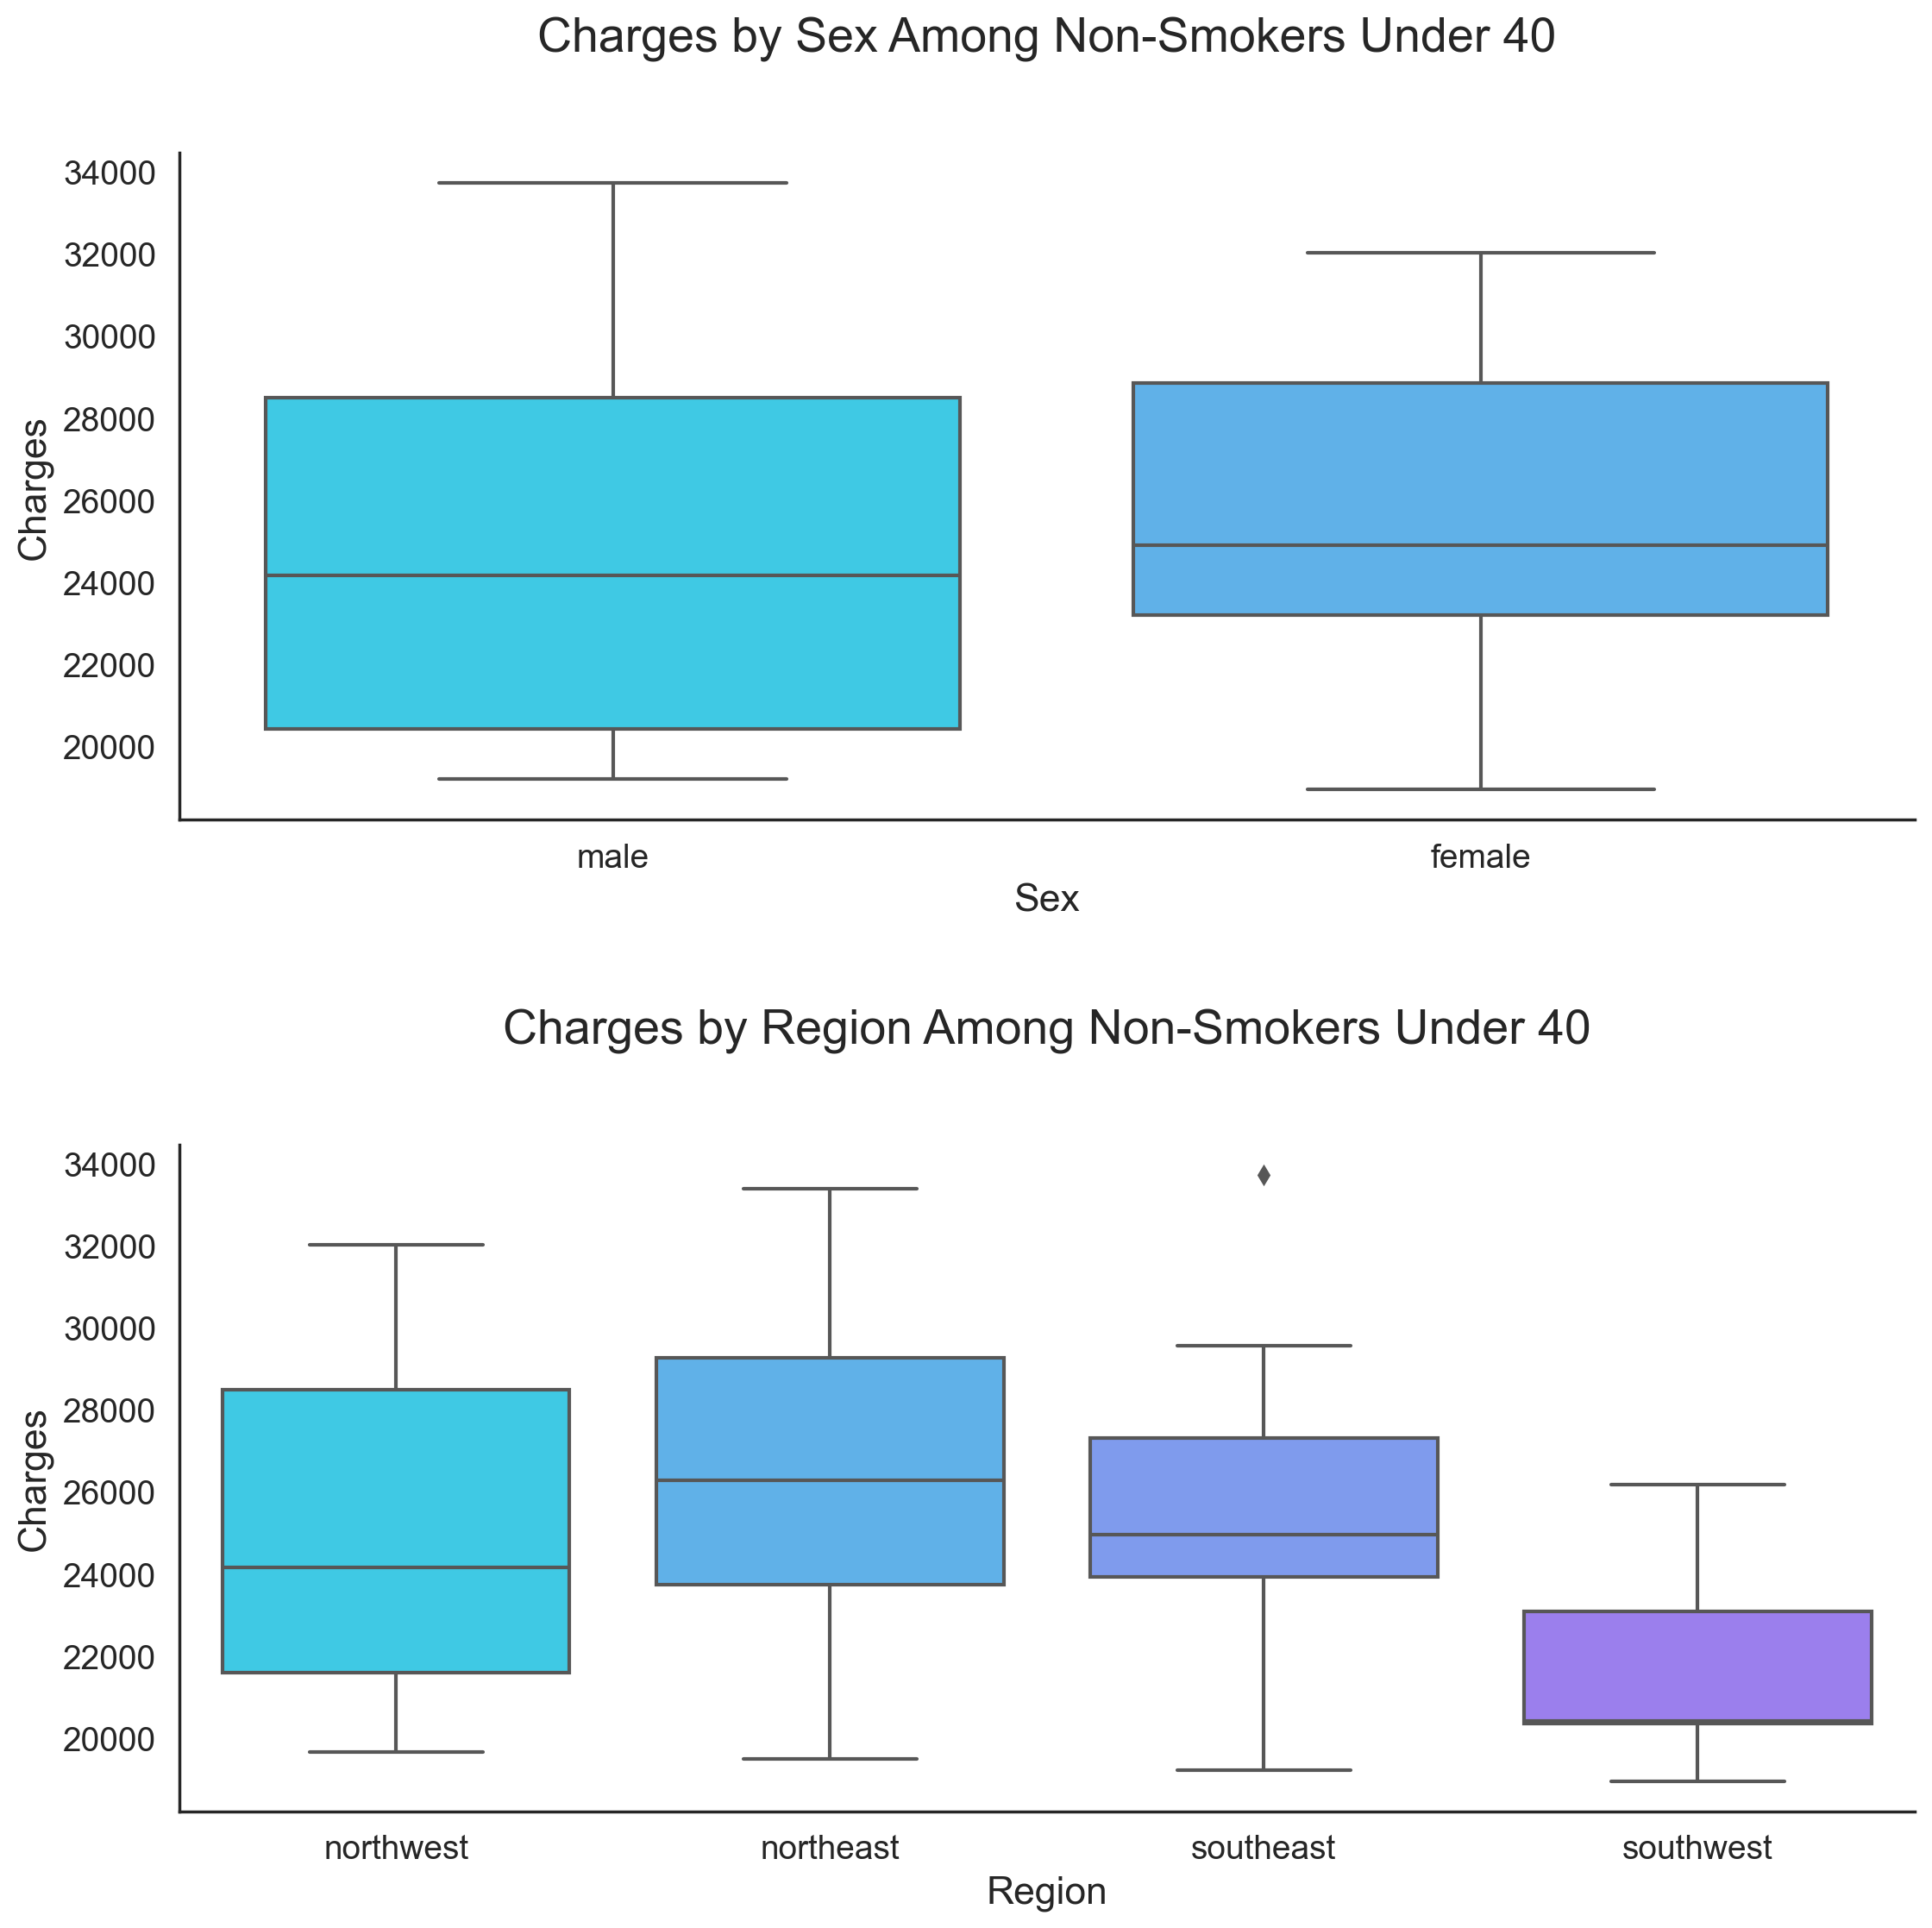

In [13]:
sns.set(style="white")

# Filter outliers for non-smokers under 40
non_smoker_outliers_under_40 = non_smoker_outliers[non_smoker_outliers['age'] < 40]

# Set the DPI (dots per inch) for better image quality
plt.rcParams['figure.dpi'] = 200

# Create a color palette
palette = sns.color_palette("cool")

# Increase the size of the plot
fig, axs = plt.subplots(2, 1, figsize=(12, 12))

# Create the first boxplot comparing charges by sex
sns.boxplot(ax=axs[0], x='sex', y='charges', data=non_smoker_outliers_under_40, palette=palette)
axs[0].set_title('Charges by Sex Among Non-Smokers Under 40', fontsize=20, pad=20, y=1.08)
axs[0].set_xlabel('Sex', fontsize=16)
axs[0].set_ylabel('Charges', fontsize=16)
axs[0].tick_params(labelsize=14)

# Create the second boxplot comparing charges by region
sns.boxplot(ax=axs[1], x='region', y='charges', data=non_smoker_outliers_under_40, palette=palette)
axs[1].set_title('Charges by Region Among Non-Smokers Under 40', fontsize=20, pad=20, y=1.08)
axs[1].set_xlabel('Region', fontsize=16)
axs[1].set_ylabel('Charges', fontsize=16)
axs[1].tick_params(labelsize=14)

# Improve layout
plt.tight_layout(pad=3.0)

# Remove top and right spines
sns.despine()

# Show the plots
plt.show()

<hr style="border:1px solid #4A90E2"> </hr>

<a name="DataSplit"></a>
# Data Split: Train, Validation, Test


For effective model building and evaluation, our data is organized into three key subsets:

- **Training Set**: Comprising 70% of the data, this set instructs our machine learning model. It's where our model learns and adjusts.

- **Validation Set**: Taking up 15%, it evaluates the model's initial training and guides hyperparameter tuning. While the model is evaluated against this data, it doesn't adapt based on it.

- **Test Set**: The remaining 15% provides a genuine assessment of the model's performance. Distinctly, this data is untouched during training and tuning, ensuring our model's true capability to predict unfamiliar data is gauged.

In [14]:
from sklearn.model_selection import train_test_split

def split_data(df, target_var, verbose=True):
    """
    Splits a DataFrame into training, validation, and test datasets.

    Parameters
    ----------
    df : DataFrame
        The DataFrame that contains all the data.
    target_var : str
        The column in the DataFrame that represents the target variable.
    verbose : bool, optional
        Whether or not to print a report of the split. Default is True.

    Returns
    -------
    X_train : DataFrame
        Feature data for training.
    y_train : Series
        Target data for training.
    X_val : DataFrame
        Feature data for validation.
    y_val : Series
        Target data for validation.
    X_test : DataFrame
        Feature data for testing.
    y_test : Series
        Target data for testing.
    """

    # define features and target
    X = df.drop(target_var, axis=1)
    y = df[target_var]

    # first, we split the original data into training data (70%) and a temporary set (30%)
    # this temporary set will later be split into validation and test sets
    X_train, X_temp, y_train, y_temp = train_test_split(X, 
                                                        y, 
                                                        test_size=0.3, # 70%-30% split
                                                        random_state=42)

    # then, we split the temporary set into validation and test sets
    # both will be 15% of the original data size
    X_val, X_test, y_val, y_test = train_test_split(X_temp, 
                                                    y_temp, 
                                                    test_size=0.5, # splits the 30% into 15%-15%
                                                    random_state=42)

    # reset index for all datasets
    for data in [X_train, y_train, X_val, y_val, X_test, y_test]:
        data.reset_index(drop=True, inplace=True)

    if verbose:
        # print out the sizes of the split datasets
        print("Data split complete\n")
        print("Training set:", X_train.shape, y_train.shape)
        print("Validation set:", X_val.shape, y_val.shape)
        print("Test set:", X_test.shape, y_test.shape)

    return X_train, y_train, X_val, y_val, X_test, y_test


X_train, y_train, X_val, y_val, X_test, y_test = split_data(df, "charges", verbose=True)


Data split complete

Training set: (936, 6) (936,)
Validation set: (201, 6) (201,)
Test set: (201, 6) (201,)


---

# Baseline Model

A baseline model is a simple model used for reference to compare how well our model performs.   
For this regression problem, we use a model that always predicts the mean of the target variable.

Baseline RMSE: 12812.620871126219
Baseline MAE: 9577.06926934293
Baseline R2 Score: -0.00042977204749883313


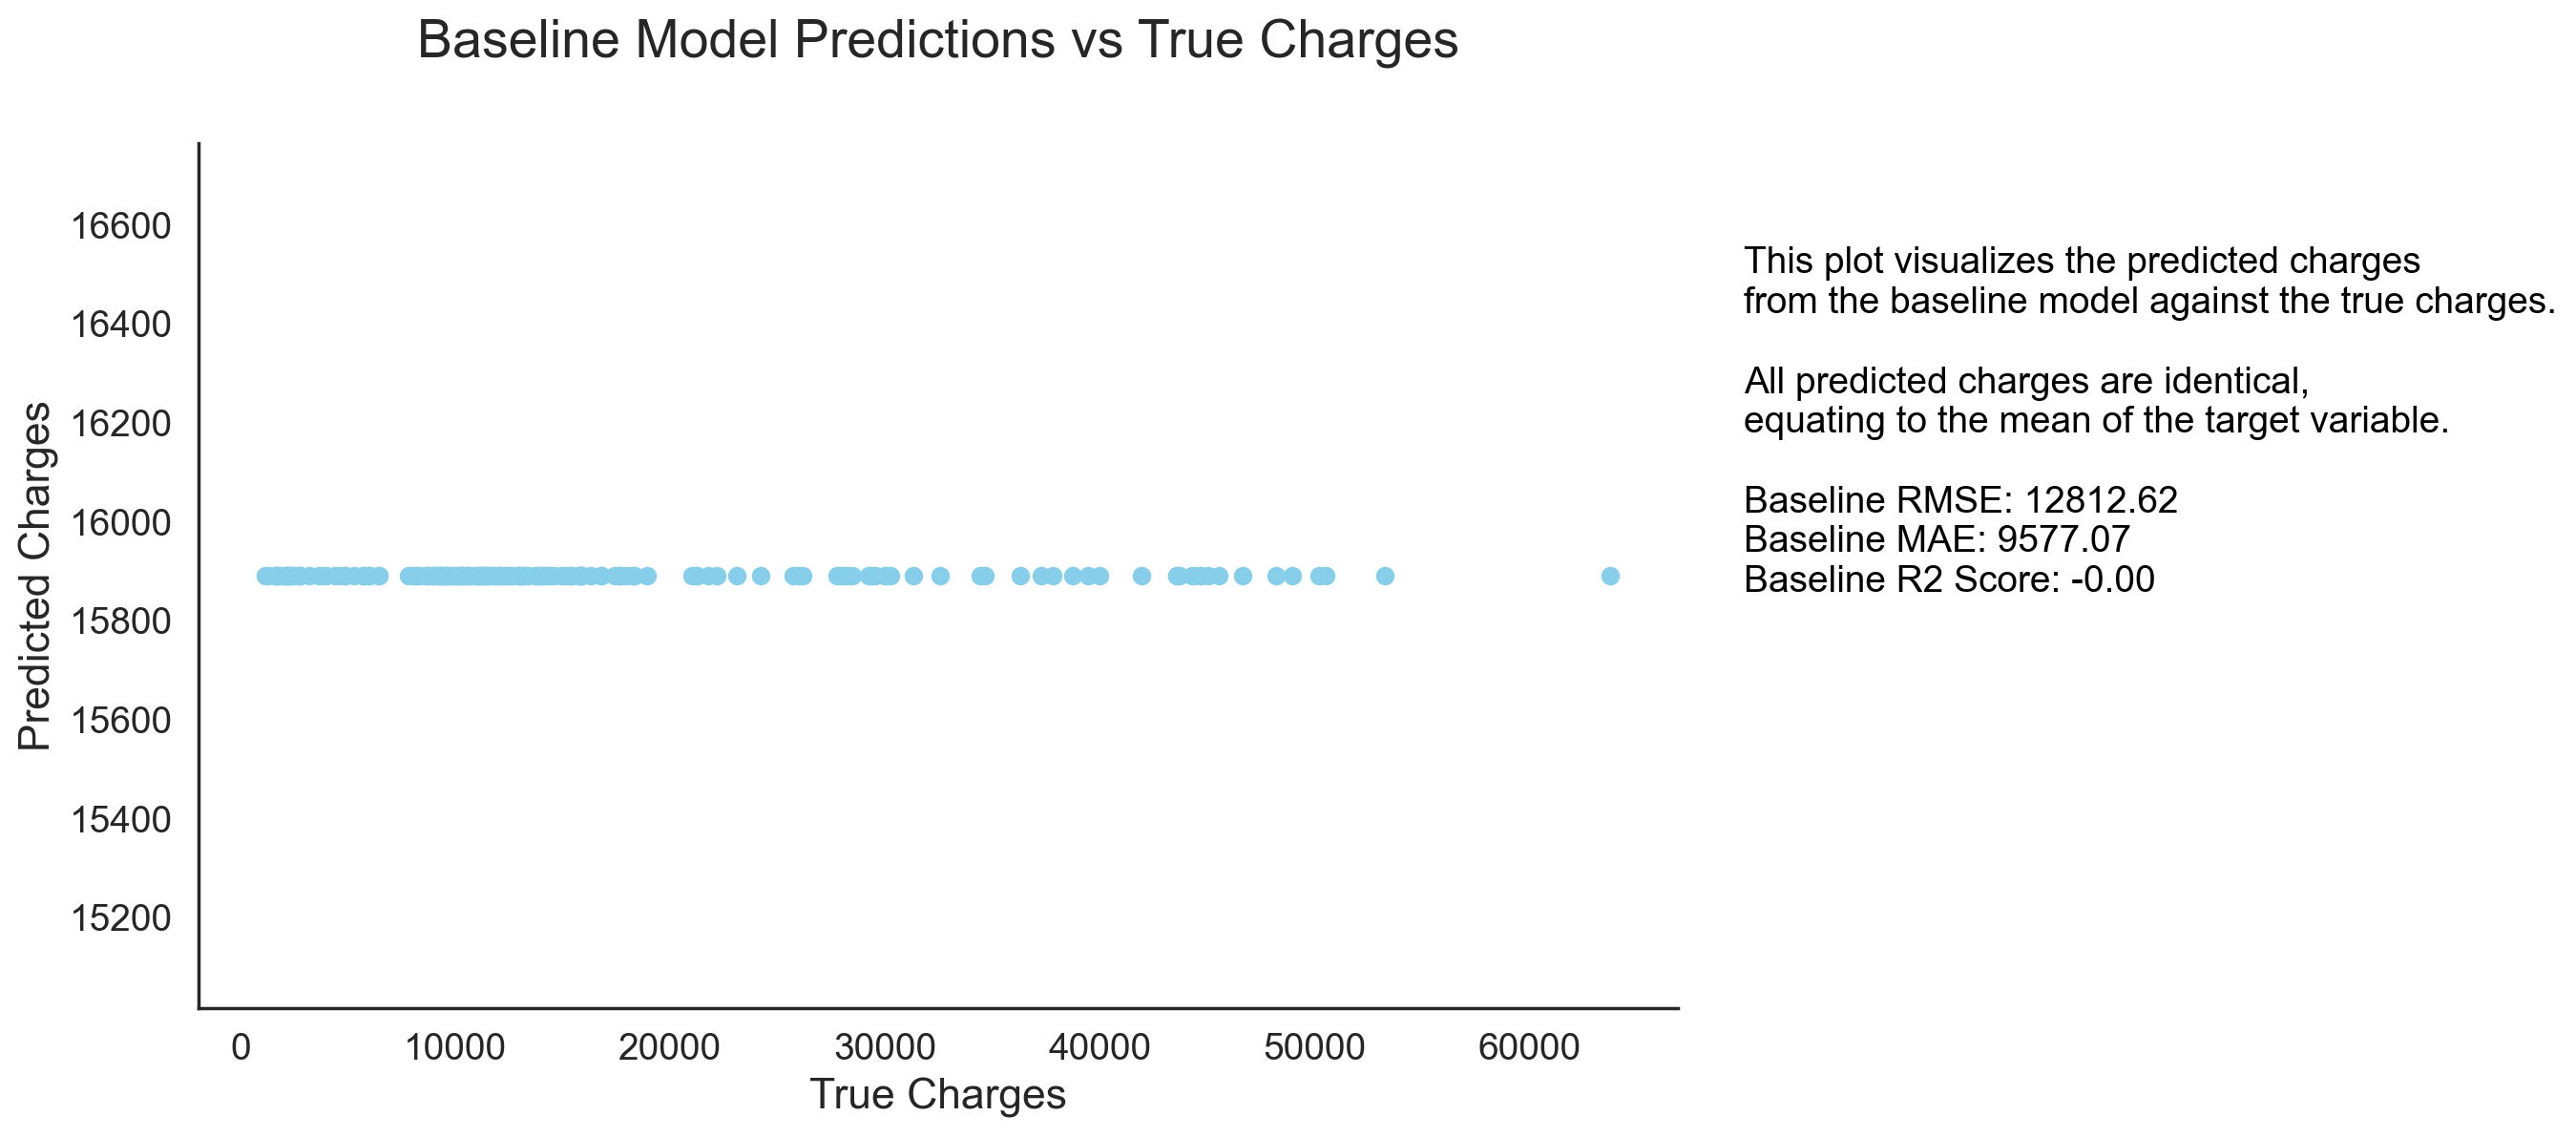

In [15]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# Set the DPI (dots per inch) for better image quality
plt.rcParams['figure.dpi'] = 200

# Define the baseline model
def baseline_model(X):
    return np.ones(len(X)) * np.mean(y_train)

# Generate predictions
baseline_preds = baseline_model(X_test)

# Compute the performance
baseline_rmse = np.sqrt(mean_squared_error(y_test, baseline_preds))
baseline_mae = mean_absolute_error(y_test, baseline_preds)
baseline_r2 = r2_score(y_test, baseline_preds)

print(f"Baseline RMSE: {baseline_rmse}")
print(f"Baseline MAE: {baseline_mae}")
print(f"Baseline R2 Score: {baseline_r2}")

# Visualize the baseline predictions vs true values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, baseline_preds, color='skyblue')

# Set the size of the x and y labels
plt.xlabel('True Charges', fontsize=16)
plt.ylabel('Predicted Charges', fontsize=16)

# Set the title size and its y position
plt.title('Baseline Model Predictions vs True Charges', fontsize=20, y=1.08)

# Set the size of the tick text for x and y axis
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Annotation
plt.text(70000, 16200,
         'This plot visualizes the predicted charges\n'
         'from the baseline model against the true charges.\n\n'
         'All predicted charges are identical,\n'
         'equating to the mean of the target variable.\n\n'
         f'Baseline RMSE: {baseline_rmse:.2f}\n'
         f'Baseline MAE: {baseline_mae:.2f}\n'
         f'Baseline R2 Score: {baseline_r2:.2f}',
         ha='left', va='center', color='black', fontsize=14)

sns.despine()
plt.show()


<hr style="border:1px solid #4A90E2"> </hr>

<a name="FeatureEngineering"></a>
# Feature Engineering

The aim of this section is to enhance our model's predictive power by creating new features or transforming existing ones. By considering interactions between features, non-linear relationships, and anomalies in the data, we can uncover more of the underlying patterns in the data. In this process, we have engineered five new features:

1. `bmi_smoker`: This interaction term is the product of BMI and smoking status. It is based on the hypothesis that the impact of BMI on charges might be amplified for smokers, given that both high BMI and smoking are risk factors for various health conditions.

2. `age_group`: This categorical feature groups age into "Teenager", "Young Adult", "Middle Aged" and "Senior". It was created to capture possible non-linear relationships between age and charges, which might not be reflected by the continuous age feature.

3. `high_charge_non_smoker`: This binary feature flags non-smokers whose charges exceed the 75th percentile. It is intended to help identify those non-smokers who have unusually high charges, potentially indicating the presence of other significant risk factors.

4. `age_squared` and `bmi_squared`: These polynomial features represent the square of age and BMI, respectively. They are included to help capture any non-linear (quadratic) relationships between these features and charges. The relationship might not be purely linear; for instance, the effect of BMI on charges might accelerate at higher levels. 

5. `high_charge_non_smoker_over_40`: This binary feature flags non-smokers over 40 whose charges exceed the 75th percentile. This feature is created based on the observation that a significant proportion of non-smokers with high charges are over 40, which can be another risk factor.

The addition of these new features will hopefully improve the predictive accuracy of our models by revealing more complex patterns in the data.

In [16]:
# Encode 'smoker' column: 1 for 'yes' and 0 for 'no'
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})

# Step 1: Create an interaction term for BMI and smoking status
df['bmi_smoker'] = df['bmi'] * df['smoker']

# Step 2: Bin 'age' variable into categories
bins = [0, 20, 40, 60, np.inf]
labels = ['Teenager', 'Young Adult', 'Middle Aged', 'Senior']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

# Step 3 & 4: Create a flag for high-charge non-smokers
q75 = df['charges'].quantile(0.75) # Calculate the 75th percentile of charges
df['high_charge_non_smoker'] = ((df['smoker'] == 0) & (df['charges'] > q75)).astype(int)

# Step 5: Create squared terms for age and bmi
df['age_squared'] = df['age'] ** 2
df['bmi_squared'] = df['bmi'] ** 2

# Step 6: Create a flag for non-smokers over 40 with high charges
df['high_charge_non_smoker_over_40'] = ((df['smoker'] == 0) & (df['age'] > 40) & (df['charges'] > q75)).astype(int)

# Display the first few rows of the dataframe
df.head()

age     sex     bmi  children  smoker     region      charges  bmi_smoker  \
0   19  female  27.900         0       1  southwest  16884.92400        27.9   
1   18    male  33.770         1       0  southeast   7725.55230         0.0   
2   28    male  33.000         3       0  southeast   4449.46200         0.0   
3   33    male  22.705         0       0  northwest  21984.47061         0.0   
4   32    male  28.880         0       0  northwest   3866.85520         0.0   

     age_group  high_charge_non_smoker  age_squared  bmi_squared  \
0     Teenager                       0          361   778.410000   
1     Teenager                       0          324  1140.412900   
2  Young Adult                       0          784  1089.000000   
3  Young Adult                       1         1089   515.517025   
4  Young Adult                       0         1024   834.054400   

   high_charge_non_smoker_over_40  
0                               0  
1                               0  
2                               0  
3                               0  
4                               0

---
## Post-Feature Engineering Distribution Analysis

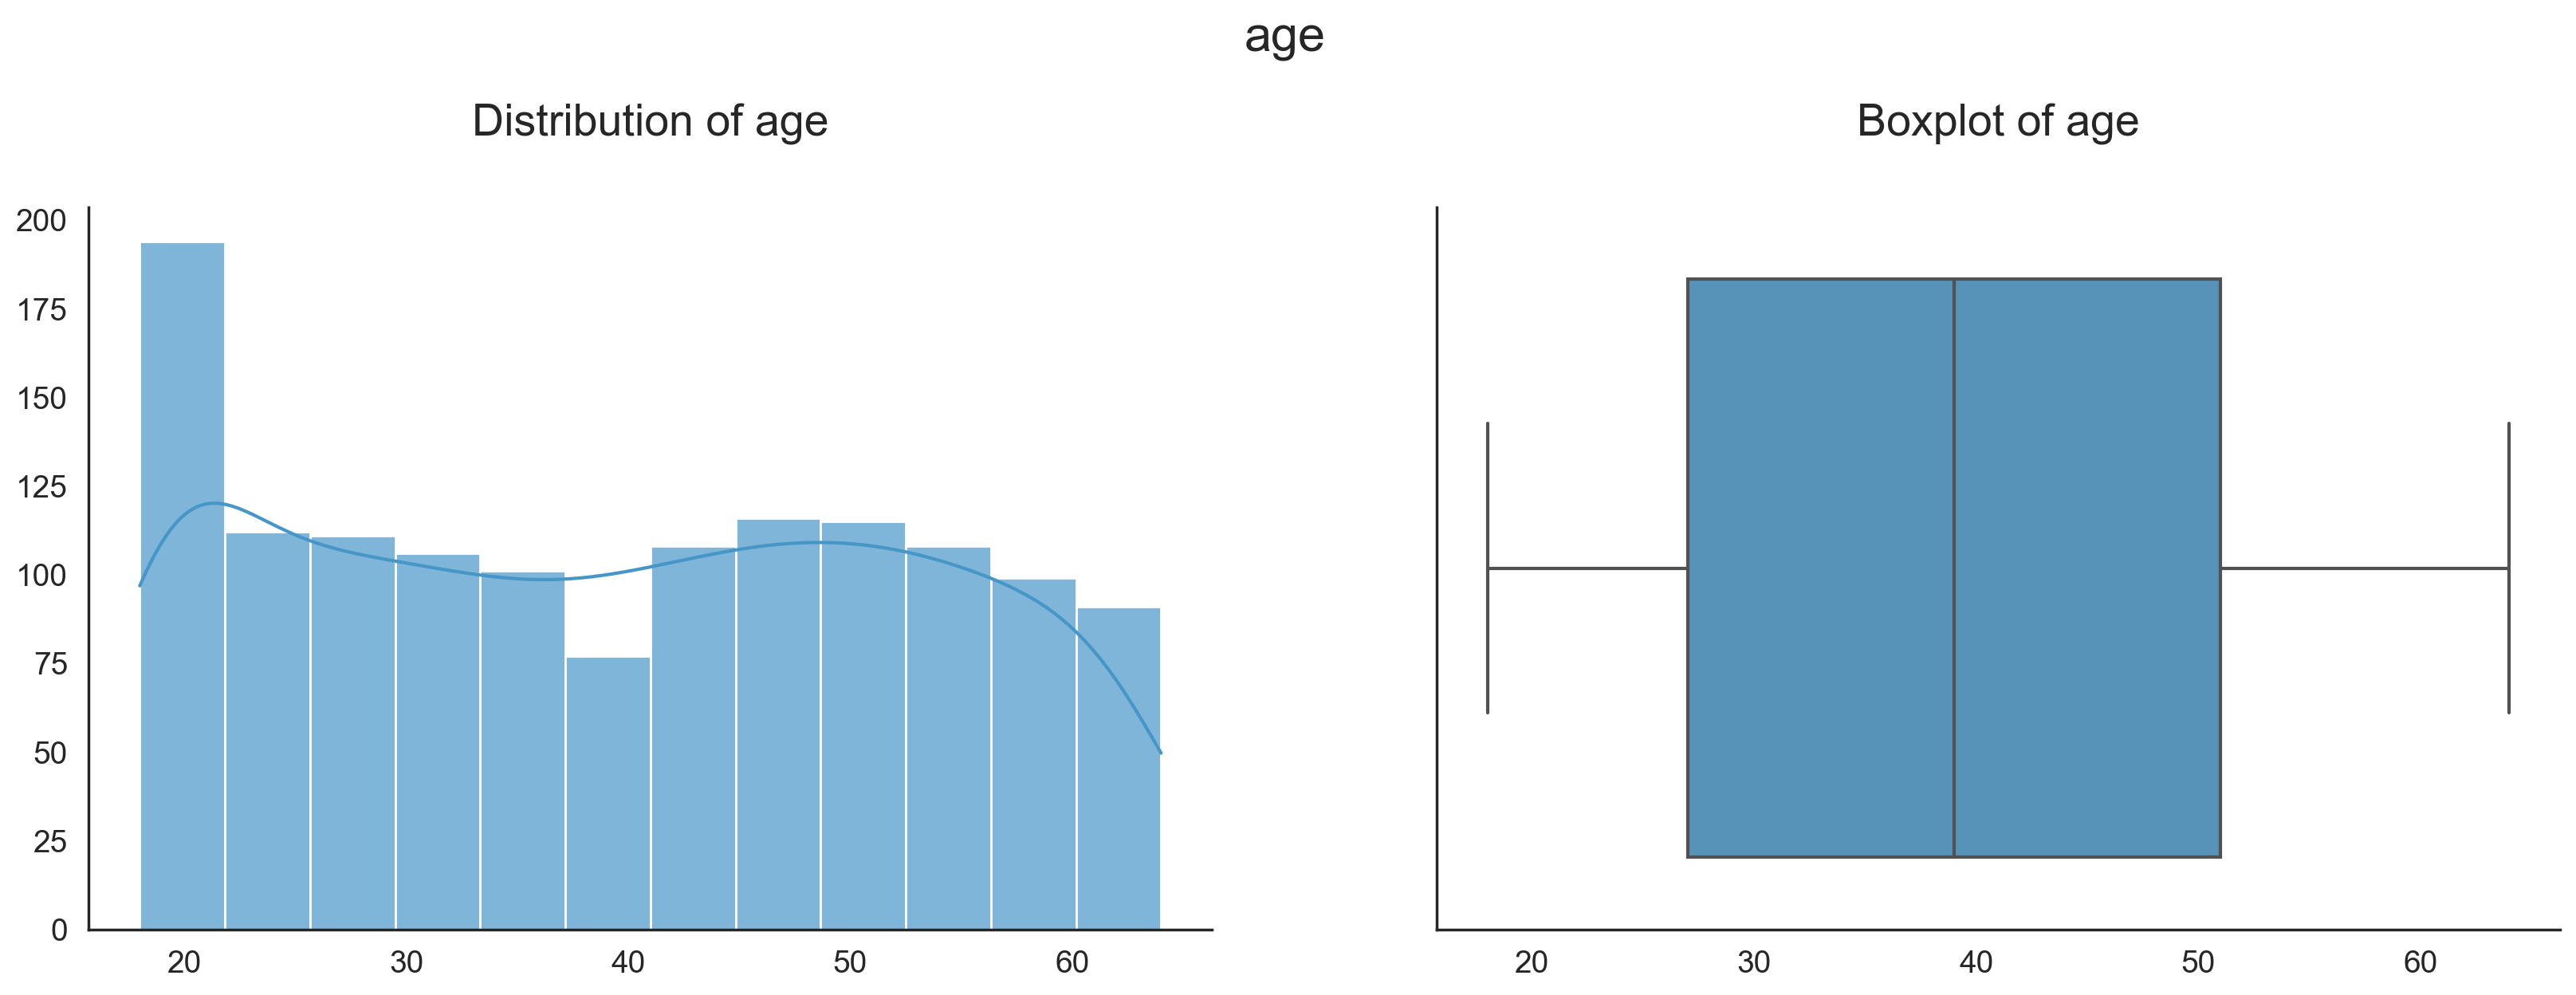

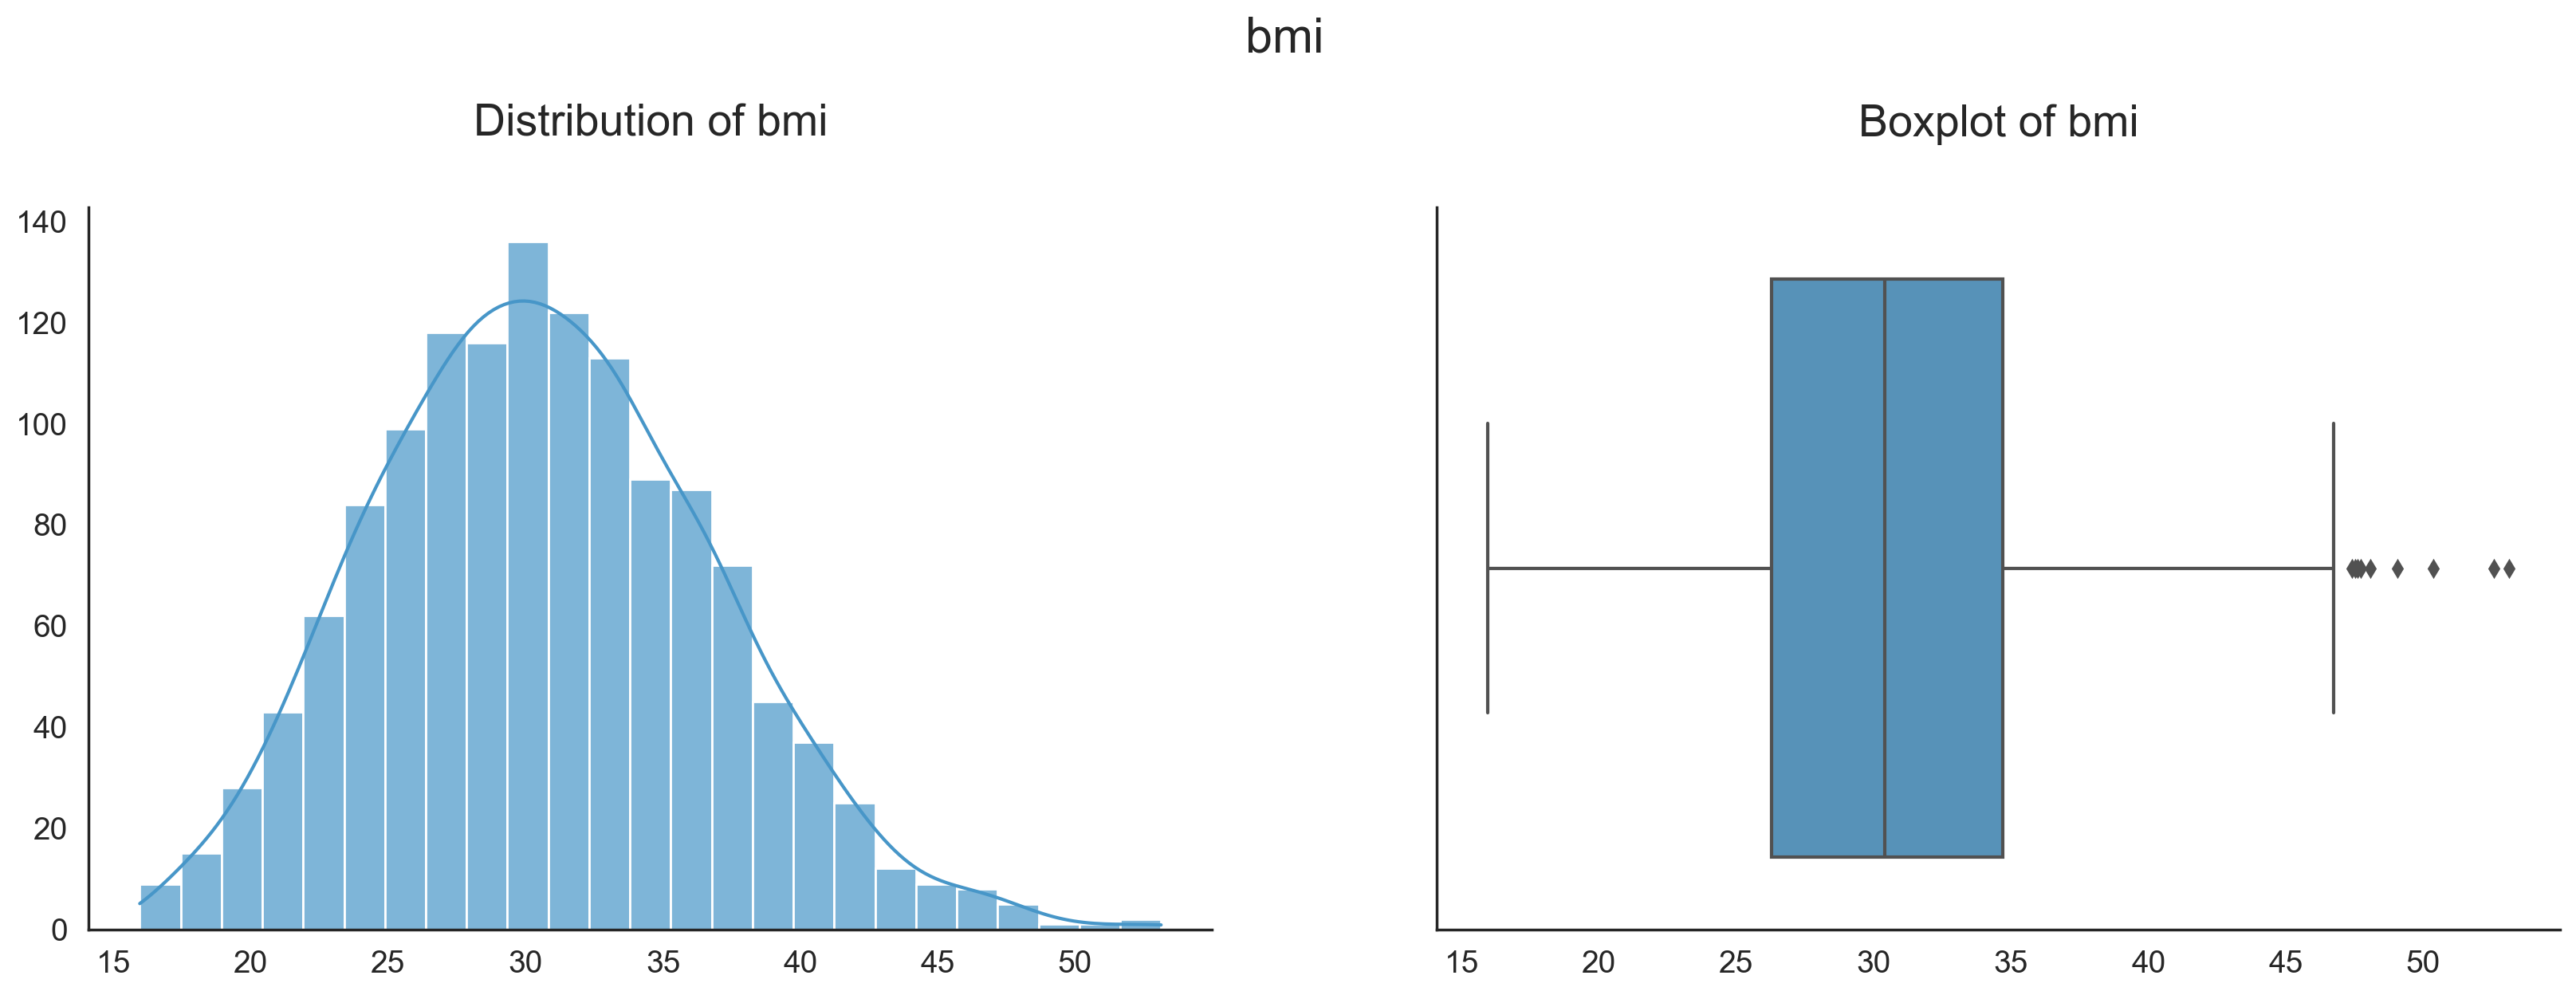

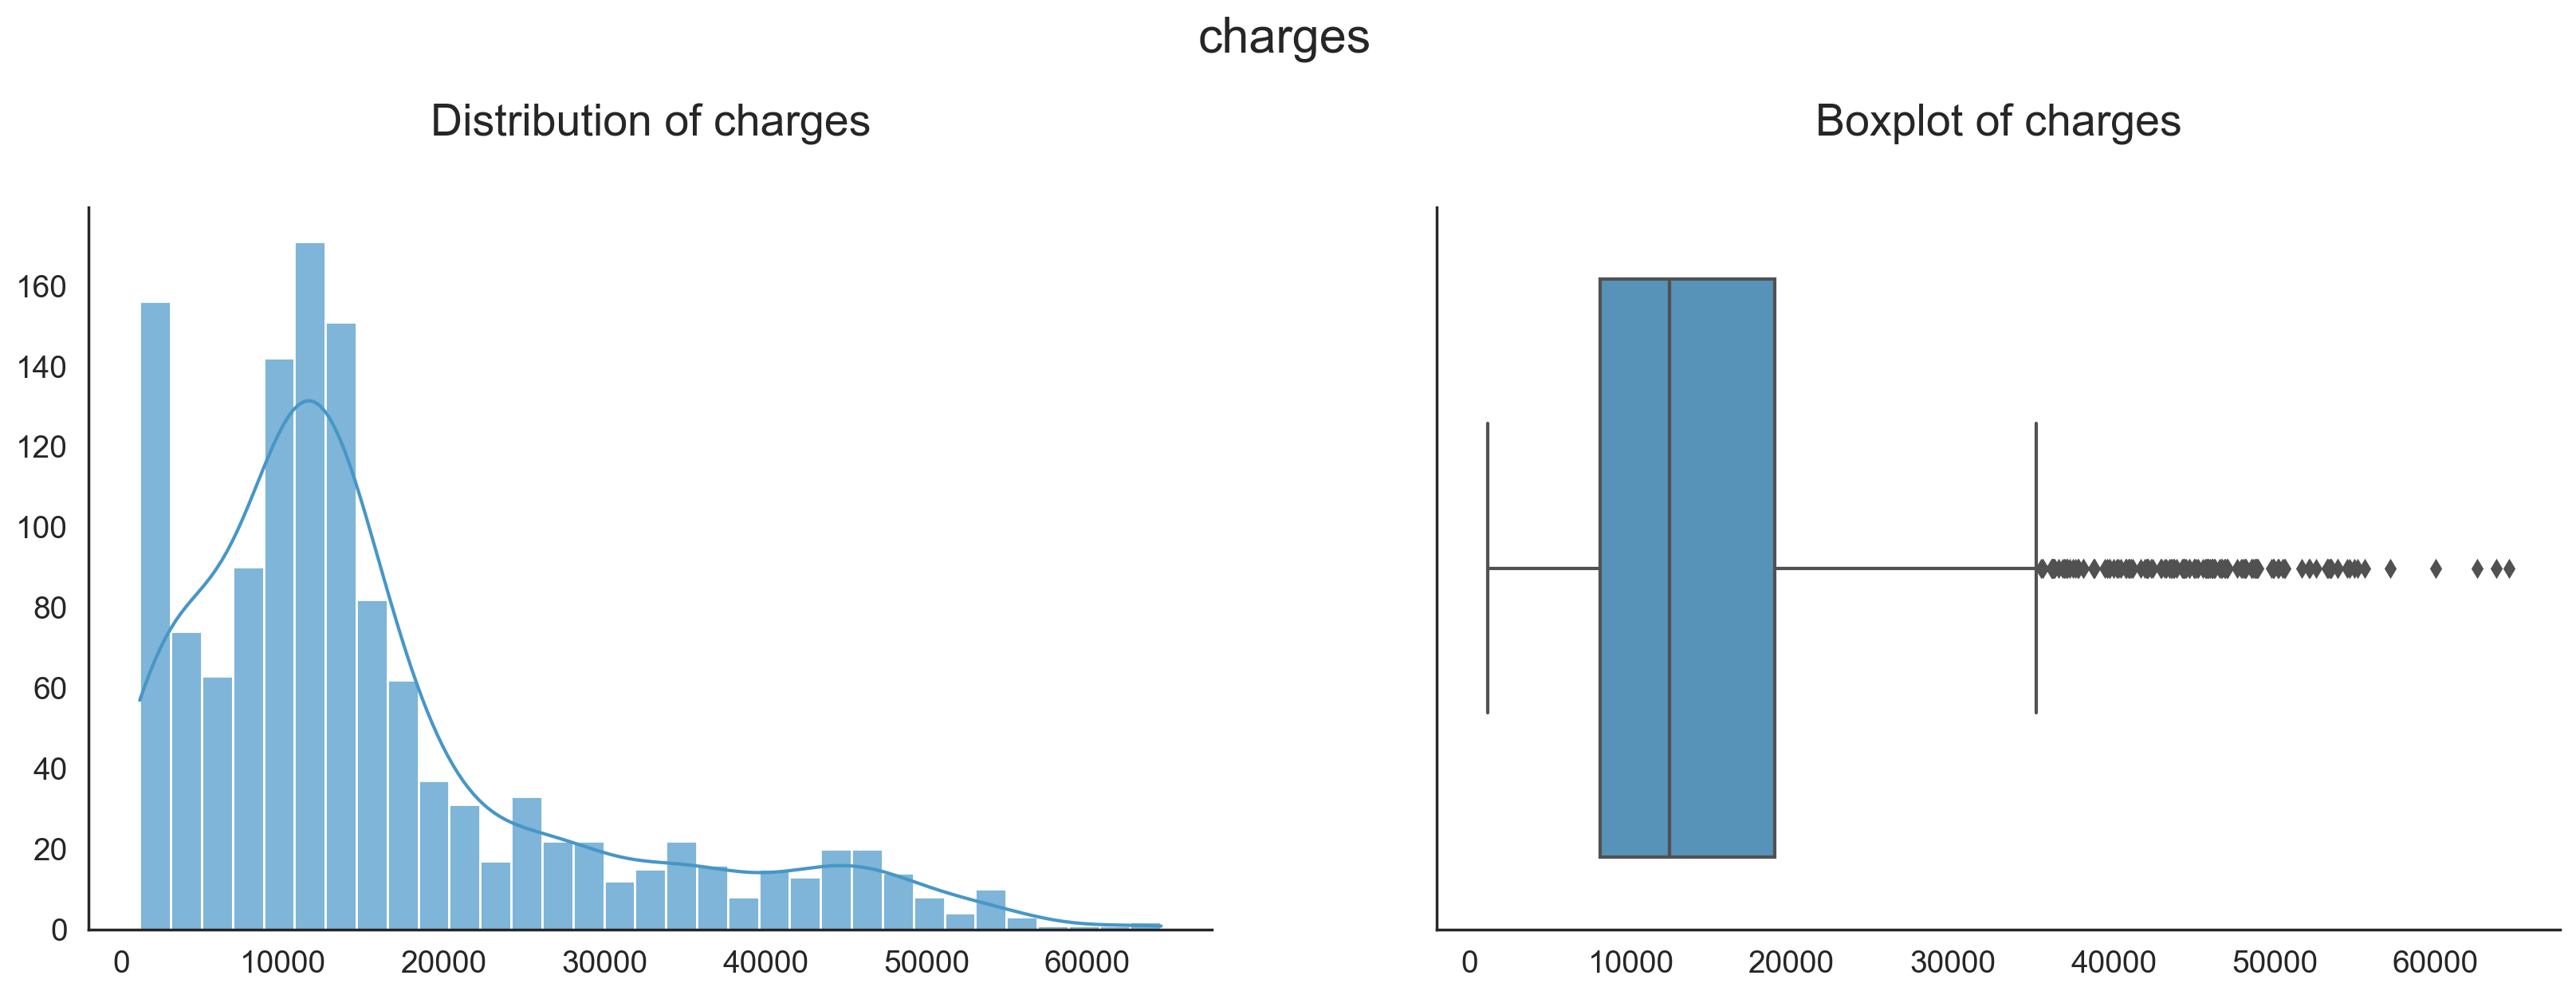

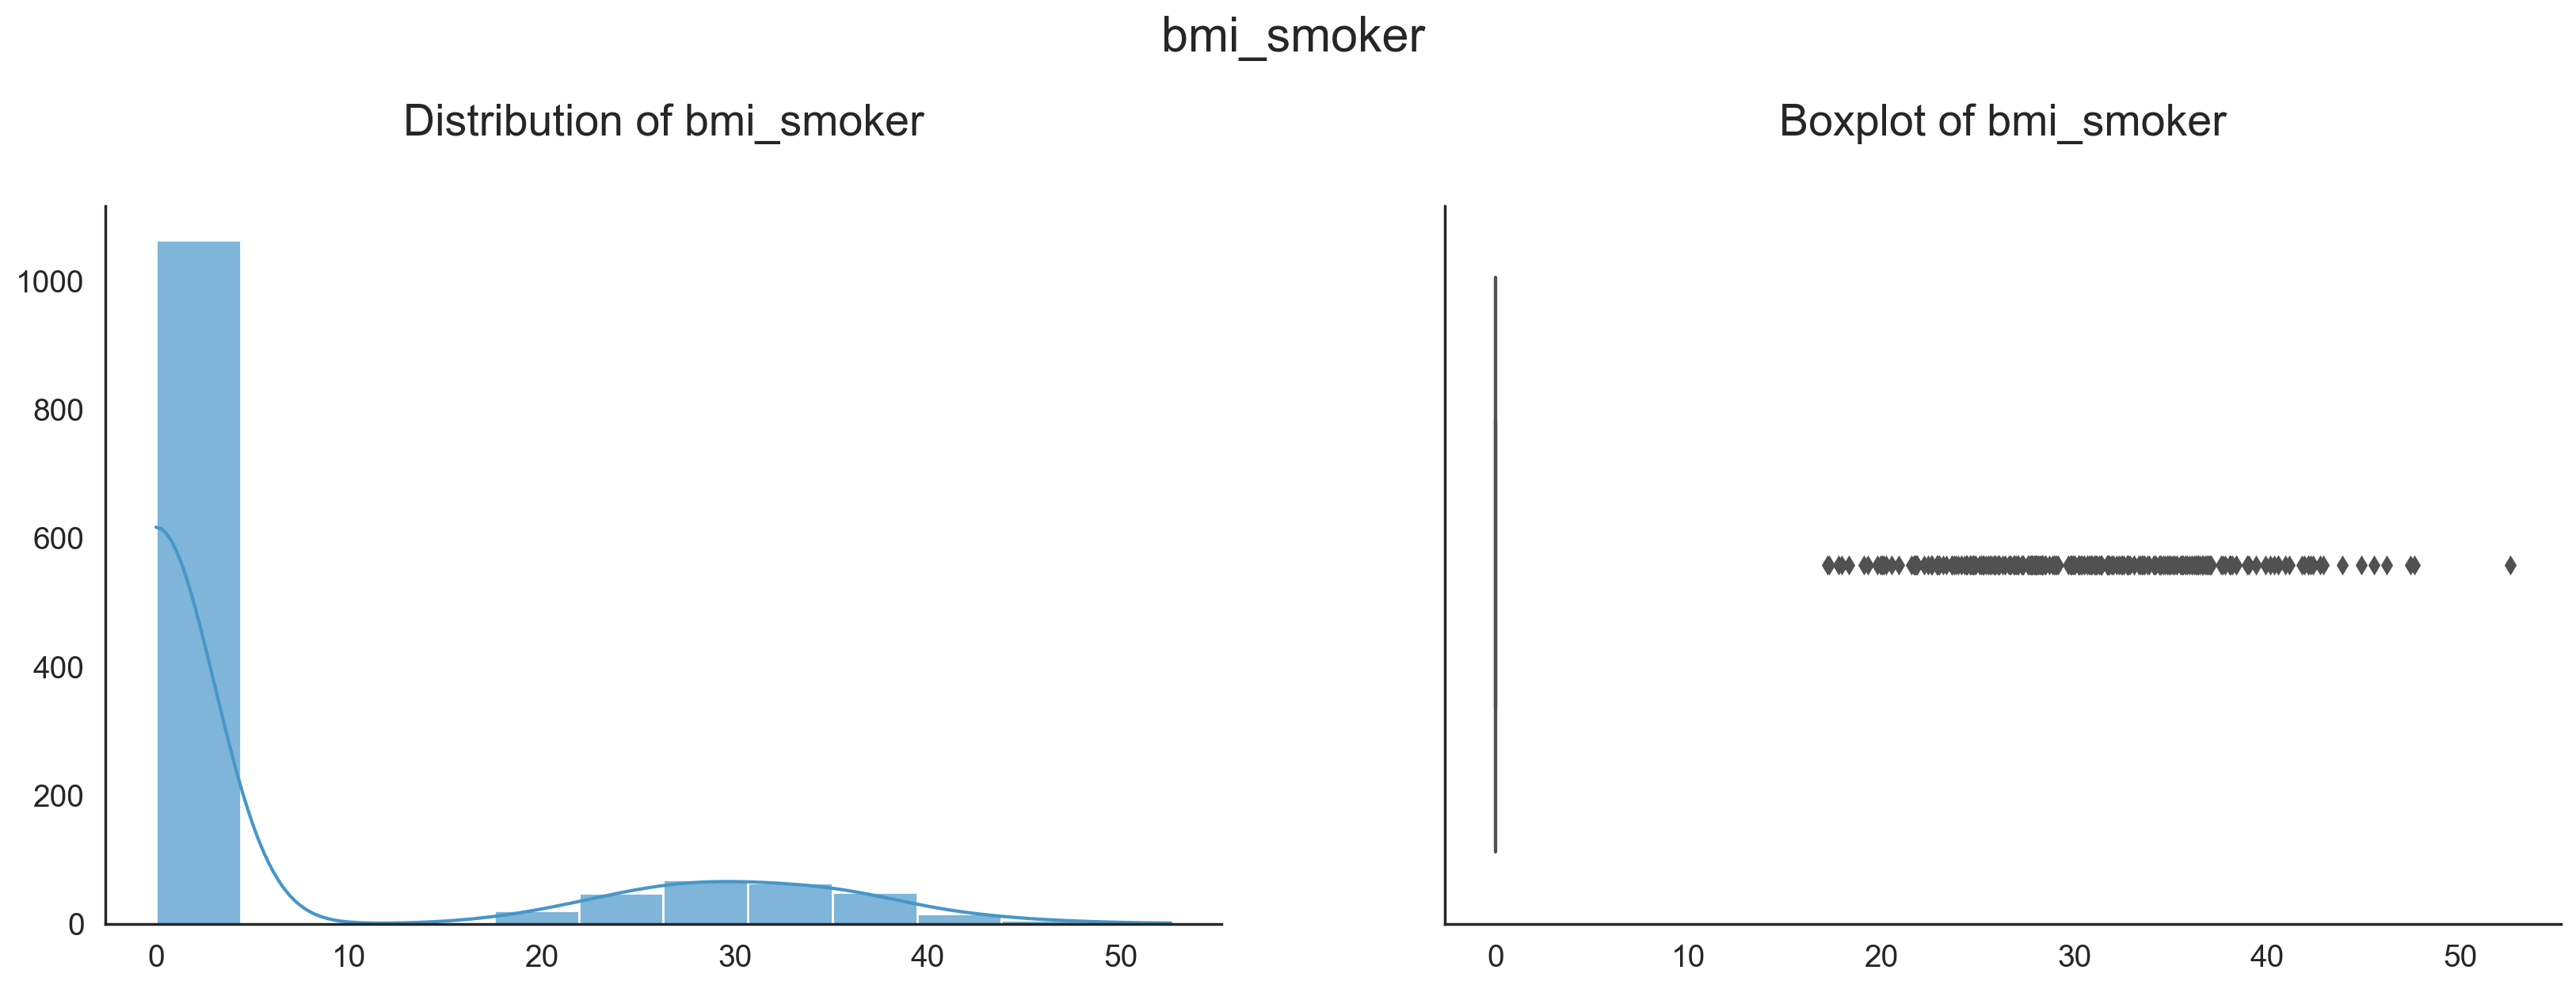

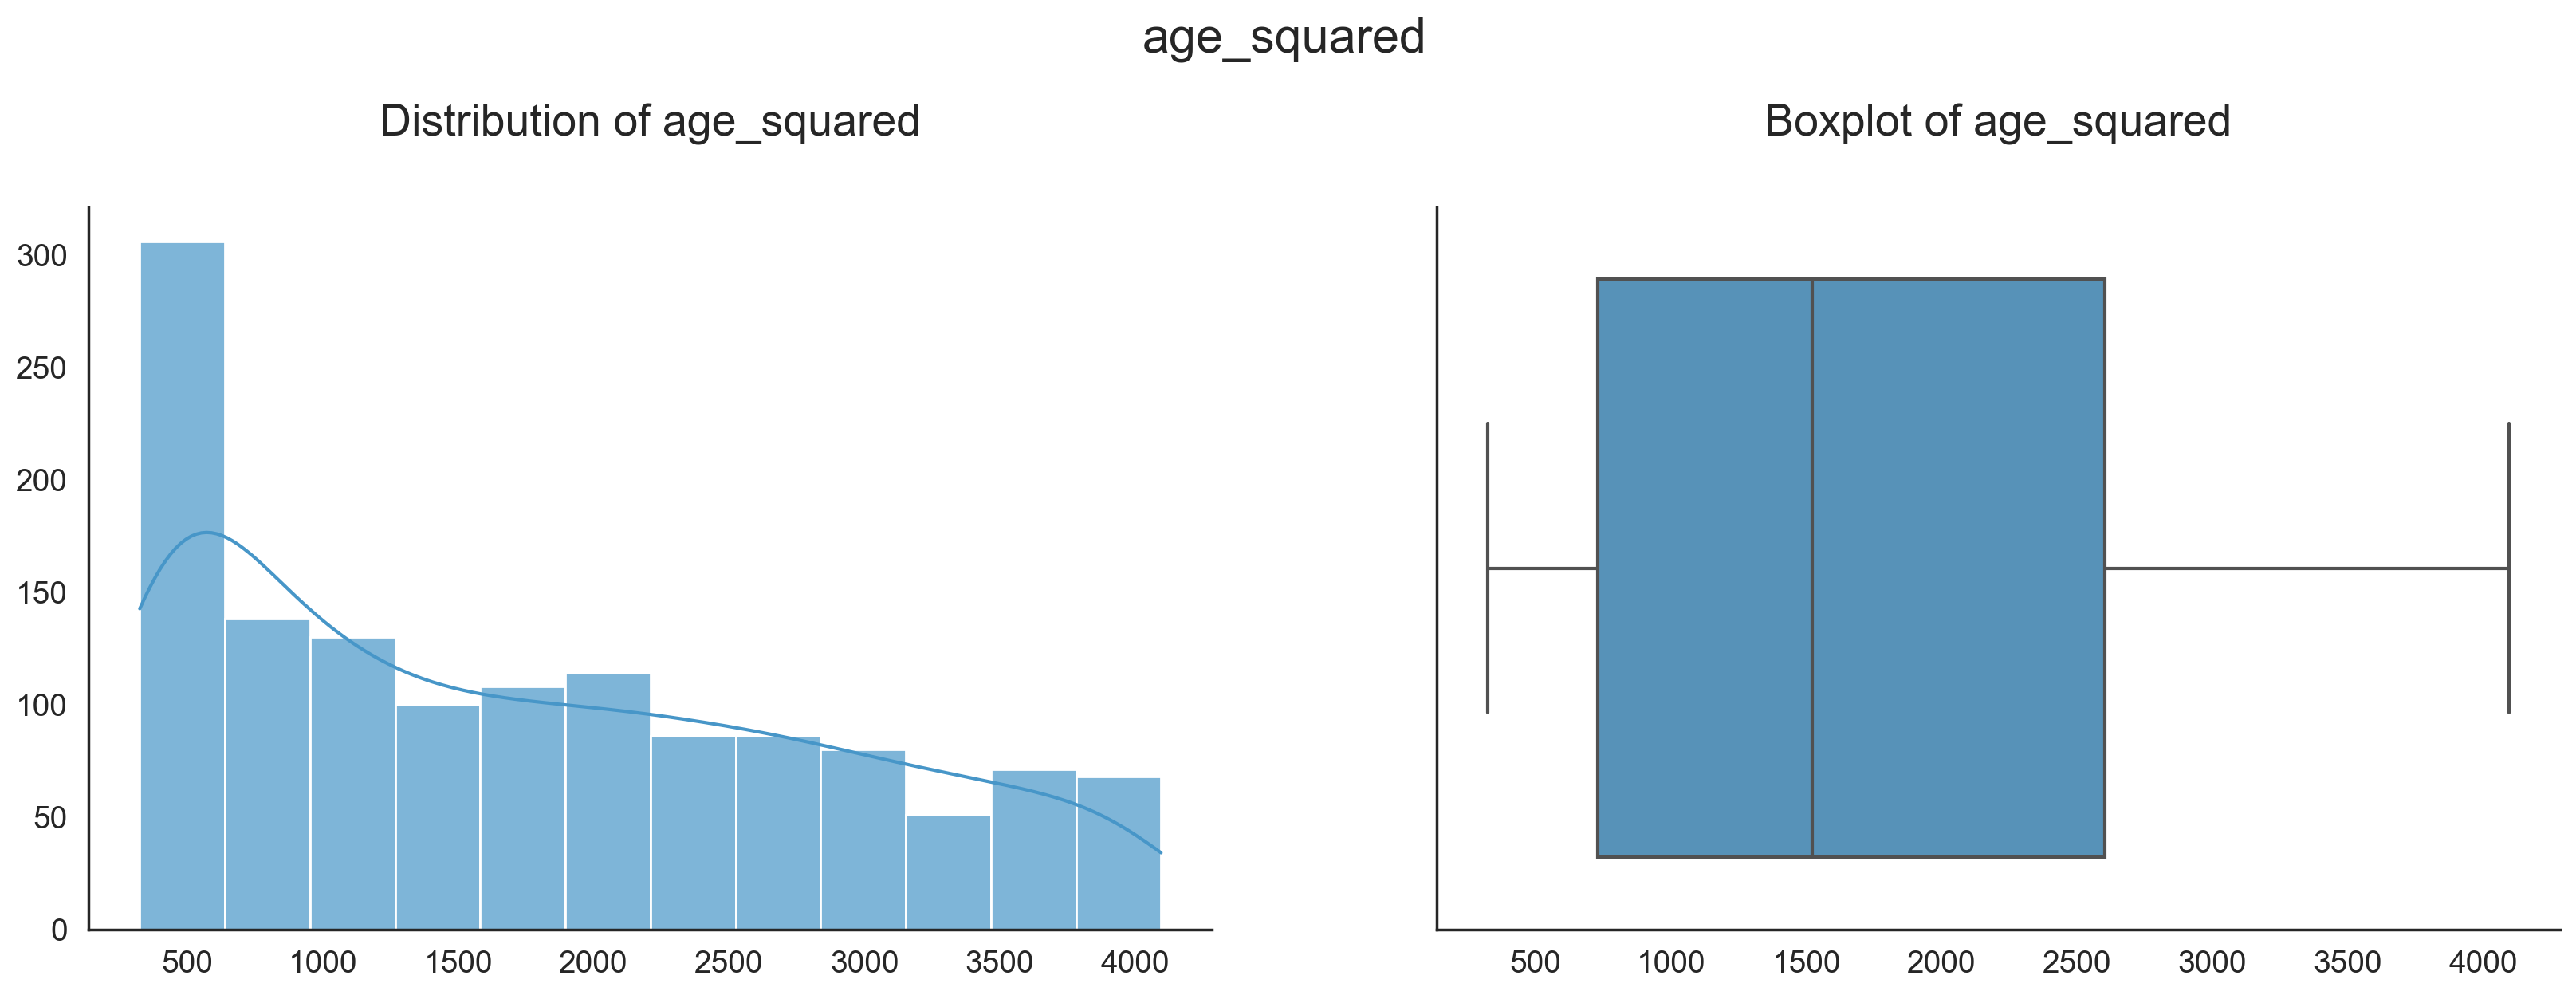

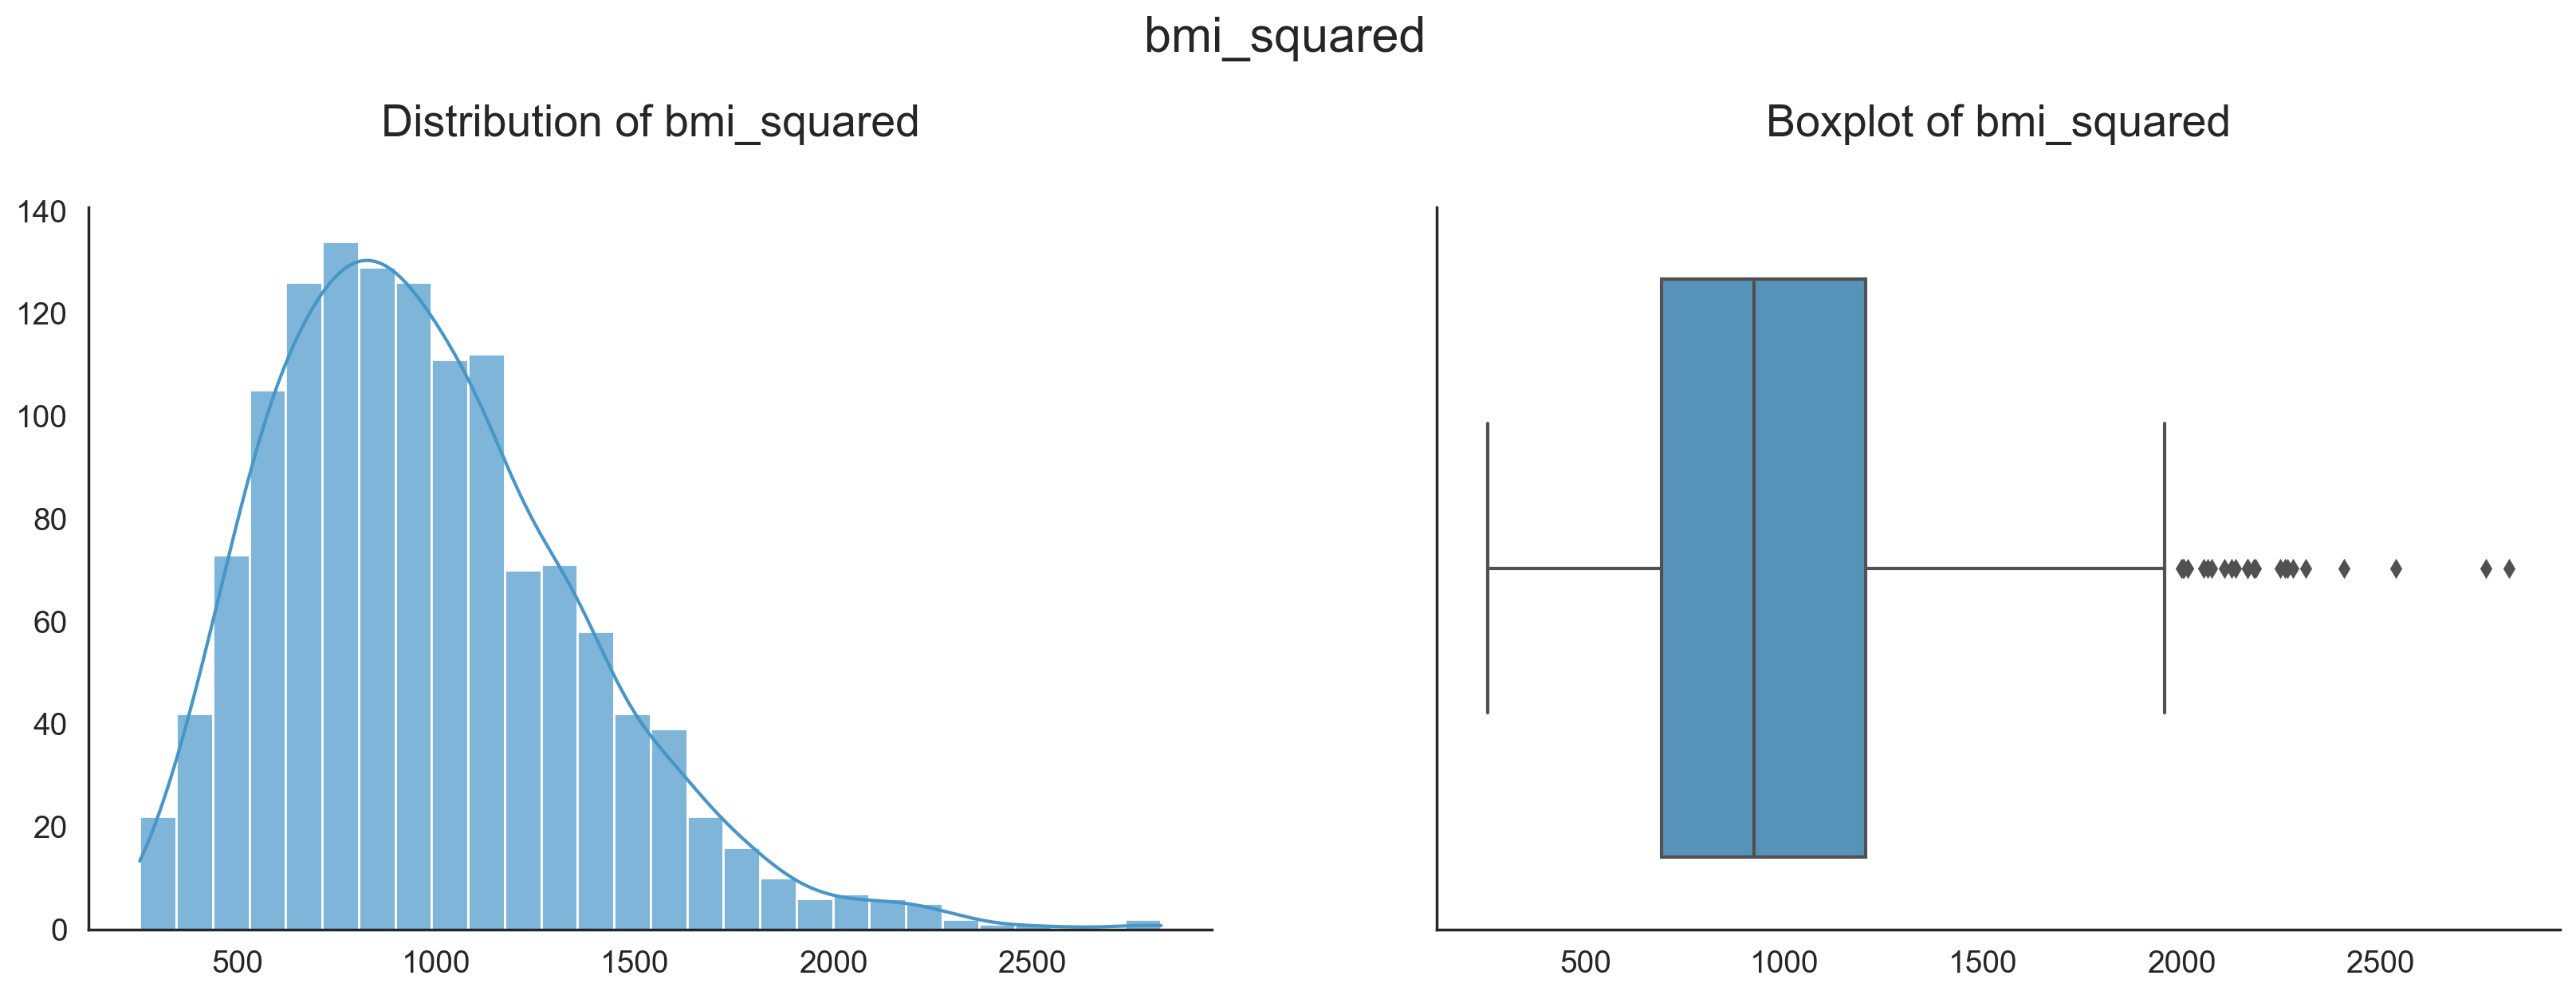

In [17]:
# Set the DPI (dots per inch) for better image quality
plt.rcParams['figure.dpi'] = 200

# Set the color palette
sns.set_palette(sns.color_palette(["#4796C8"]))

# Visualize the distribution of continuous numerical data
numerical_columns = df.select_dtypes(include=np.number).columns

for column in numerical_columns:
    if len(df[column].unique()) > 25:  # Condition for continuous features
        fig, ax = plt.subplots(1, 2, figsize=(20, 6))

        # Histogram with KDE
        sns.histplot(data=df[column], ax=ax[0], kde=True, alpha=0.7)
        ax[0].set_title(f'Distribution of {column}', fontsize=20, y=1.08)
        ax[0].set(xlabel=None, ylabel=None) # Remove x and y labels

        # Box plot
        sns.boxplot(x=df[column], ax=ax[1])  # 'x' instead of 'data' for horizontal
        ax[1].set_title(f'Boxplot of {column}', fontsize=20, y=1.08)
        ax[1].set(xlabel=None, ylabel=None) # Remove x and y labels

        fig.suptitle(column, fontsize=22, y=1.08)
        sns.despine()

        # Adjust tick text size
        ax[0].xaxis.set_tick_params(labelsize=14)
        ax[0].yaxis.set_tick_params(labelsize=14)
        ax[1].xaxis.set_tick_params(labelsize=14)
        ax[1].yaxis.set_tick_params(labelsize=14)

        plt.show()


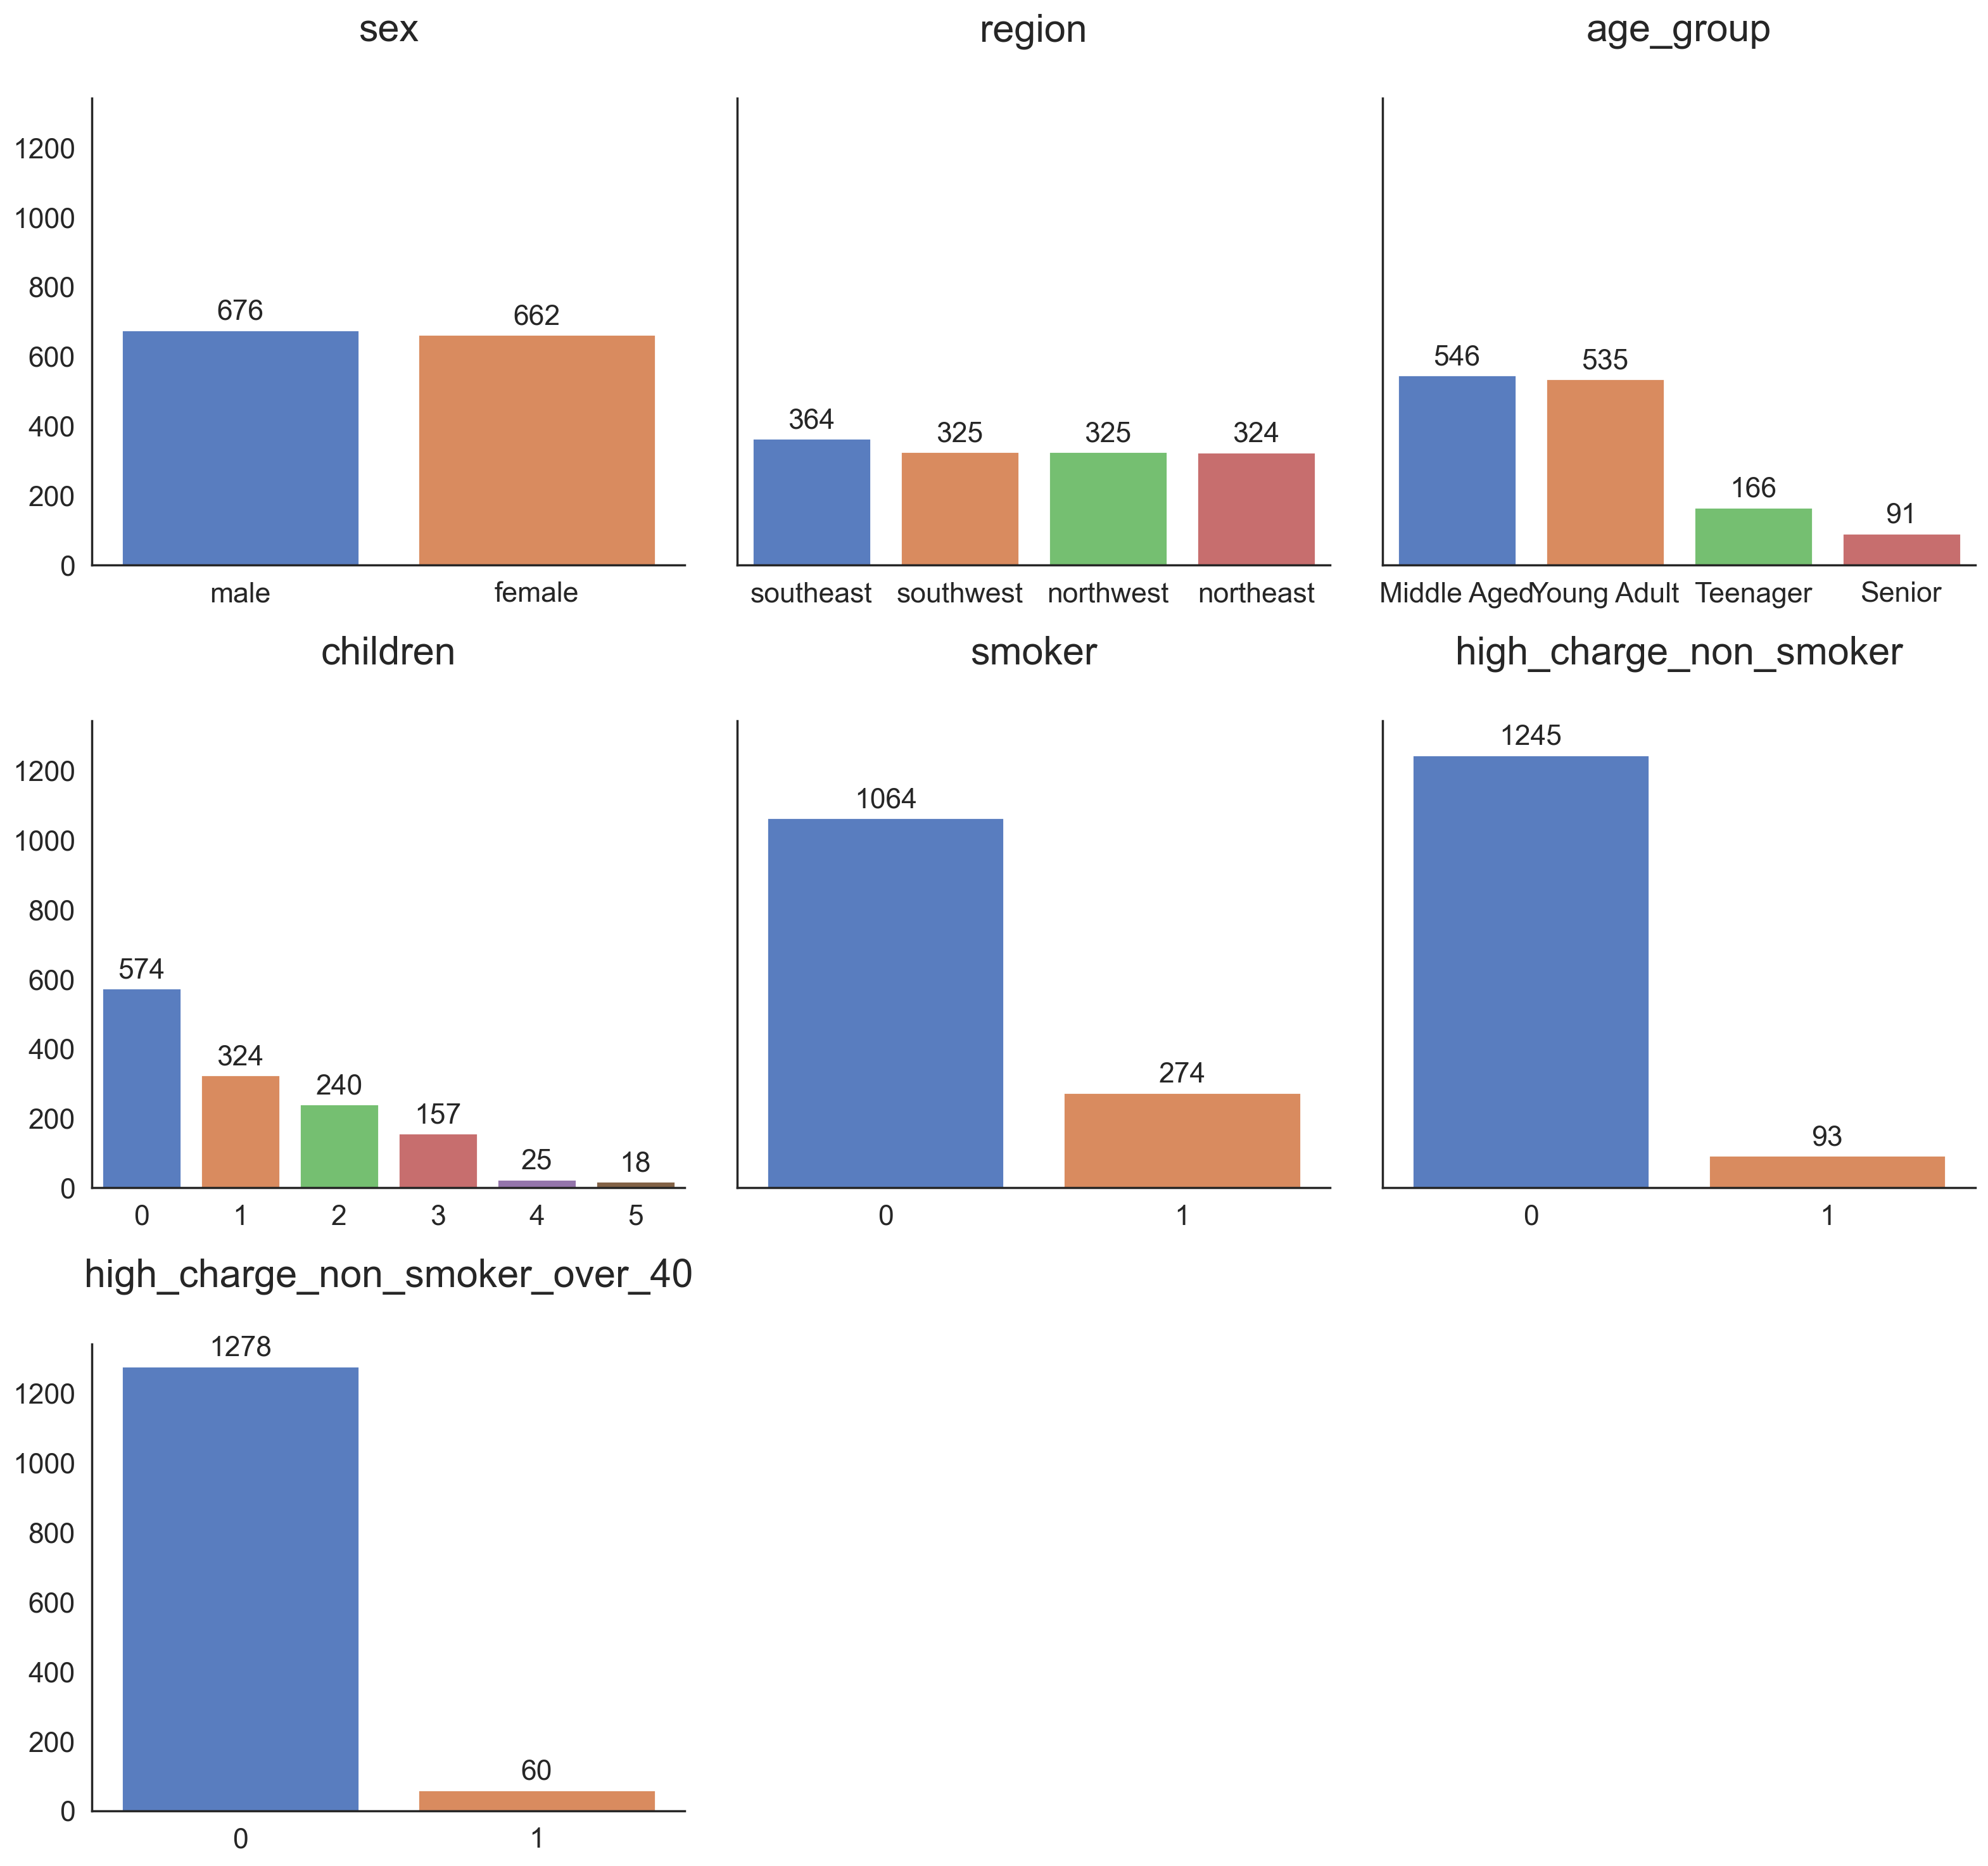

In [107]:
# Distribution of Categorical and Discrete Numerical Features

# Set colour palette
custom_palette = sns.color_palette("muted")

# Set the DPI (dots per inch) for better image quality
plt.rcParams['figure.dpi'] = 200

# Select object columns and numerical columns with fewer than 25 unique values
var_list = df.select_dtypes(include=['object', "category", "bool"]).columns.tolist() + \
    [col for col in df.select_dtypes(include=np.number).columns if df[col].nunique() < 25]

rows = math.ceil(len(var_list) / 3)  # Calculate the number of rows required

# Create a grid of subplots
fig, axs = plt.subplots(rows, 3, figsize=(16, 5 * rows), sharey=True)

# Loop over the variables and their corresponding axes
for i, ax in zip(var_list, axs.flat):
    
    # Order bars by count
    order = df[i].value_counts().index
    
    sns_plot = sns.countplot(data=df, x=i, ax=ax, palette=custom_palette, order=order)
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_xticklabels(ax.get_xticklabels(), ha='center', fontsize=16)
    
    # Change size of y-tick labels (i.e., the numbers on y-axis)
    ax.tick_params(axis='y', labelsize=16)  # This line sets the font size of the y-axis labels.
    
    # Loop over the patches (bars in the graph)
    for p in sns_plot.patches:
        sns_plot.annotate(format(p.get_height(), '.0f'), 
                          (p.get_x() + p.get_width() / 2., p.get_height()), 
                          ha = 'center', 
                          va = 'center', 
                          xytext = (0, 10), 
                          textcoords = 'offset points',
                          fontsize=16) # size of the text

    ax.set_title(i, fontsize=22, y=1.1)
    sns.despine()

# Hide any unused subplots
for i in axs.flat[::-1][:rows*3-len(var_list)]:
    i.set_axis_off()

sns.set(style="white", font_scale=1.4, rc={"grid.linestyle": "-", "axes.grid": False})    
plt.tight_layout()
plt.show()

---

## Feature Preprocessing Table

After a comprehensive review of our dataset's features, we have determined the appropriate preprocessing steps for each feature as outlined below. 
  
<br>

**Table: Feature Preprocessing**

| Feature                | Scaling / Encoding  | UniqueValues  | Imputation      | FeatureType  | SubType     | DataType   |
|------------------------|---------------------|---------------|-----------------|--------------|-------------|------------|
| smoker                 | None                | [0, 1]        | None            | Numeric      | Binary      | int64      |
| high_charge_non_smoker | None                | [0, 1]        | None            | Numeric      | Binary      | int32      |
| high_charge_non_smoker_over_40 | None                | [0, 1]        | None            | Numeric      | Binary      | int32      |
| age                    | StandardScaler      | 47            | None            | Numeric      | Discrete    | int64      |
| children               | StandardScaler      | [0, 1, 2, 3, 4, 5] | None       | Numeric      | Discrete    | int64      |
| age_squared            | StandardScaler      | 47            | None            | Numeric      | Continuous  | int64      |
| bmi                    | StandardScaler      | 548           | None            | Numeric      | Continuous  | float64    |
| bmi_squared            | RobustScaler        | 548           | None            | Numeric      | Continuous  | float64    |
| bmi_smoker             | RobustScaler        | 1228          | None            | Numeric      | Continuous  | float64    |
| sex                    | OneHotEncoder       | ['male', 'female'] | None         | Categorical | Binary      | object     |
| region                 | OneHotEncoder       | ['southwest', 'southeast', 'northwest', 'northeast'] | None | Categorical | Nominal  | object |
| age_group              | OneHotEncoder       | ['Young', 'Middle-aged', 'Old', 'Child'] | None         | Categorical | Ordinal | category |
  
<br><br>
This table serves as the base for our preprocessing pipeline, allowing us to systematically apply each scaler to its corresponding feature. 
As we don't have any missing values in the dataset, we don't need to implement any imputation strategies.


<hr style="border:1px solid #4A90E2"> </hr>

<a name="ModelSelection"></a>
# Model Selection

In the model selection phase, we focused on three primary aspects:

1. **Performance:** Overall accuracy and efficiency of the model on given datasets, ensuring high-quality predictions.
2. **Consistency:** Stability of the model's performance across different sets of data or various data folds.
3. **Generalization:** Adaptability of the model to perform well on unseen or new data.
4. **Interpretability:** Transparency in the model's decision-making process, allowing users and stakeholders to trust and understand its predictions.
5. **Robustness:** The model's resilience to small changes or noise in the input data, safeguarding prediction stability.

Considering these factors, we selected the following models based on their performances on the training and validation datasets:

1. **RandomForestRegressor:** Demonstrating solid performance on both the validation and training datasets, this model revealed outstanding generalization capabilities. It ranked third on the training dataset and was the top-performing model on the validation dataset, showcasing its strength in handling unseen data. <br><br>

2. **XGBRegressor:** The XGBoost model held its ground, ranking fifth on the training dataset and fourth on the validation dataset. Its consistent results across different data folds suggest a reliable performance, underpinning its ability to generalize efficiently.

Notably, our conclusions derive from the average performance across different data folds. The final selection for hyperparameter tuning will also consider factors like computational complexity, resource availability, prediction speed, and interpretability. These considerations will further refine model choices for diverse applications.

In [19]:
# Import necessary libraries
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import r2_score
from prettytable import PrettyTable
from tqdm import tqdm
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
from catboost import CatBoostRegressor


# Data split
X_train, y_train, X_val, y_val, X_test, y_test = split_data(df, "charges")

# Define transformations
standard_transformer = make_pipeline(StandardScaler())
robust_transformer = make_pipeline(RobustScaler())
onehot_transformer = make_pipeline(OneHotEncoder(drop="if_binary"))

# Define features and their corresponding transformers
transformers = [
    ('passthrough', ['smoker', 'high_charge_non_smoker', 'high_charge_non_smoker_over_40']),
    (standard_transformer, ['age', 'children', 'age_squared', 'bmi']),
    (robust_transformer, ['bmi_squared', 'bmi_smoker']),
    (onehot_transformer, ['sex', 'region', 'age_group']),
]

# Make column transformer
preprocessor = make_column_transformer(*transformers)

# Set the seed for reproducibility
random_state = 42

# Define the models
models = [
    LinearRegression(),
    DecisionTreeRegressor(random_state=random_state),
    RandomForestRegressor(random_state=random_state),
    #SVR(),
    KNeighborsRegressor(),
    GradientBoostingRegressor(random_state=random_state),
    XGBRegressor(random_state=random_state),
    LGBMRegressor(random_state=random_state),
    ElasticNet(),
    AdaBoostRegressor(random_state=random_state),
    BaggingRegressor(random_state=random_state),
    ExtraTreesRegressor(random_state=random_state),
    #MLPRegressor(random_state=random_state),
    CatBoostRegressor(logging_level='Silent', random_seed=random_state),  # CatBoost uses 'random_seed' instead of 'random_state'
]

# Define the number of folds
num_folds = 5

# Create lists to store model names and mean scores
model_names_train = []
mean_scores_train = []
model_names_val = []
mean_scores_val = []

# Dynamically create field names based on the number of folds
field_names = ["Model"] + [f"F{i+1}" for i in range(num_folds)] + ["Std", "Mean"]

# Iterate over the datasets
for dataset_name, X, y in [("Train", X_train, y_train), ("Validation", X_val, y_val)]:
    # Create a table for the results
    results_table = PrettyTable()
    results_table.title = f'{dataset_name} Data'
    results_table.field_names = field_names

    model_names = []
    mean_scores = []

    for model in tqdm(models, desc="Processing models", dynamic_ncols=True):
        pipe = make_pipeline(preprocessor, model)

        scores = cross_val_score(pipe, X, y, cv=num_folds, scoring="r2")
        mean_score = np.mean(scores)
        std_dev = np.std(scores)

        model_names.append(model.__class__.__name__)
        mean_scores.append(mean_score)

        # Format scores, std_dev and mean_score for better readability
        scores = ["{:.3f}".format(score) for score in scores]
        std_dev = "{:.6f}".format(std_dev)
        mean_score = "{:.6f}".format(mean_score)

        # Add the results to the table
        results_table.add_row([model.__class__.__name__] + scores + [std_dev, mean_score])

    # Sort results by mean score in descending order
    results_table.sortby = "Mean"
    results_table.reversesort = True

    # Print the results
    print(results_table)

    if dataset_name == "Train":
        model_names_train = model_names
        mean_scores_train = mean_scores
    else:
        model_names_val = model_names
        mean_scores_val = mean_scores


Data split complete

Training set: (936, 12) (936,)
Validation set: (201, 12) (201,)
Test set: (201, 12) (201,)


Processing models: 100%|██████████| 12/12 [00:08<00:00,  1.40it/s]


+-----------------------------------------------------------------------------------------+
|                                        Train Data                                       |
+---------------------------+-------+-------+-------+-------+-------+----------+----------+
|           Model           |   F1  |   F2  |   F3  |   F4  |   F5  |   Std    |   Mean   |
+---------------------------+-------+-------+-------+-------+-------+----------+----------+
| GradientBoostingRegressor | 0.970 | 0.961 | 0.927 | 0.923 | 0.923 | 0.020558 | 0.940760 |
|       LGBMRegressor       | 0.963 | 0.965 | 0.917 | 0.925 | 0.924 | 0.020831 | 0.938611 |
|   RandomForestRegressor   | 0.963 | 0.963 | 0.917 | 0.926 | 0.916 | 0.021408 | 0.937146 |
|     CatBoostRegressor     | 0.965 | 0.955 | 0.918 | 0.912 | 0.917 | 0.021927 | 0.933364 |
|        XGBRegressor       | 0.959 | 0.951 | 0.918 | 0.913 | 0.914 | 0.019747 | 0.931135 |
|      BaggingRegressor     | 0.959 | 0.955 | 0.905 | 0.922 | 0.903 | 0.024013 |

Processing models: 100%|██████████| 12/12 [00:05<00:00,  2.17it/s]

+-----------------------------------------------------------------------------------------+
|                                     Validation Data                                     |
+---------------------------+-------+-------+-------+-------+-------+----------+----------+
|           Model           |   F1  |   F2  |   F3  |   F4  |   F5  |   Std    |   Mean   |
+---------------------------+-------+-------+-------+-------+-------+----------+----------+
|   RandomForestRegressor   | 0.931 | 0.886 | 0.915 | 0.889 | 0.944 | 0.022836 | 0.913101 |
|     CatBoostRegressor     | 0.948 | 0.898 | 0.895 | 0.858 | 0.950 | 0.034834 | 0.909814 |
|    ExtraTreesRegressor    | 0.937 | 0.892 | 0.888 | 0.890 | 0.941 | 0.024165 | 0.909796 |
|        XGBRegressor       | 0.945 | 0.885 | 0.903 | 0.883 | 0.926 | 0.024029 | 0.908557 |
| GradientBoostingRegressor | 0.933 | 0.869 | 0.918 | 0.878 | 0.938 | 0.028481 | 0.907185 |
|      BaggingRegressor     | 0.922 | 0.858 | 0.913 | 0.881 | 0.928 | 0.026558 |

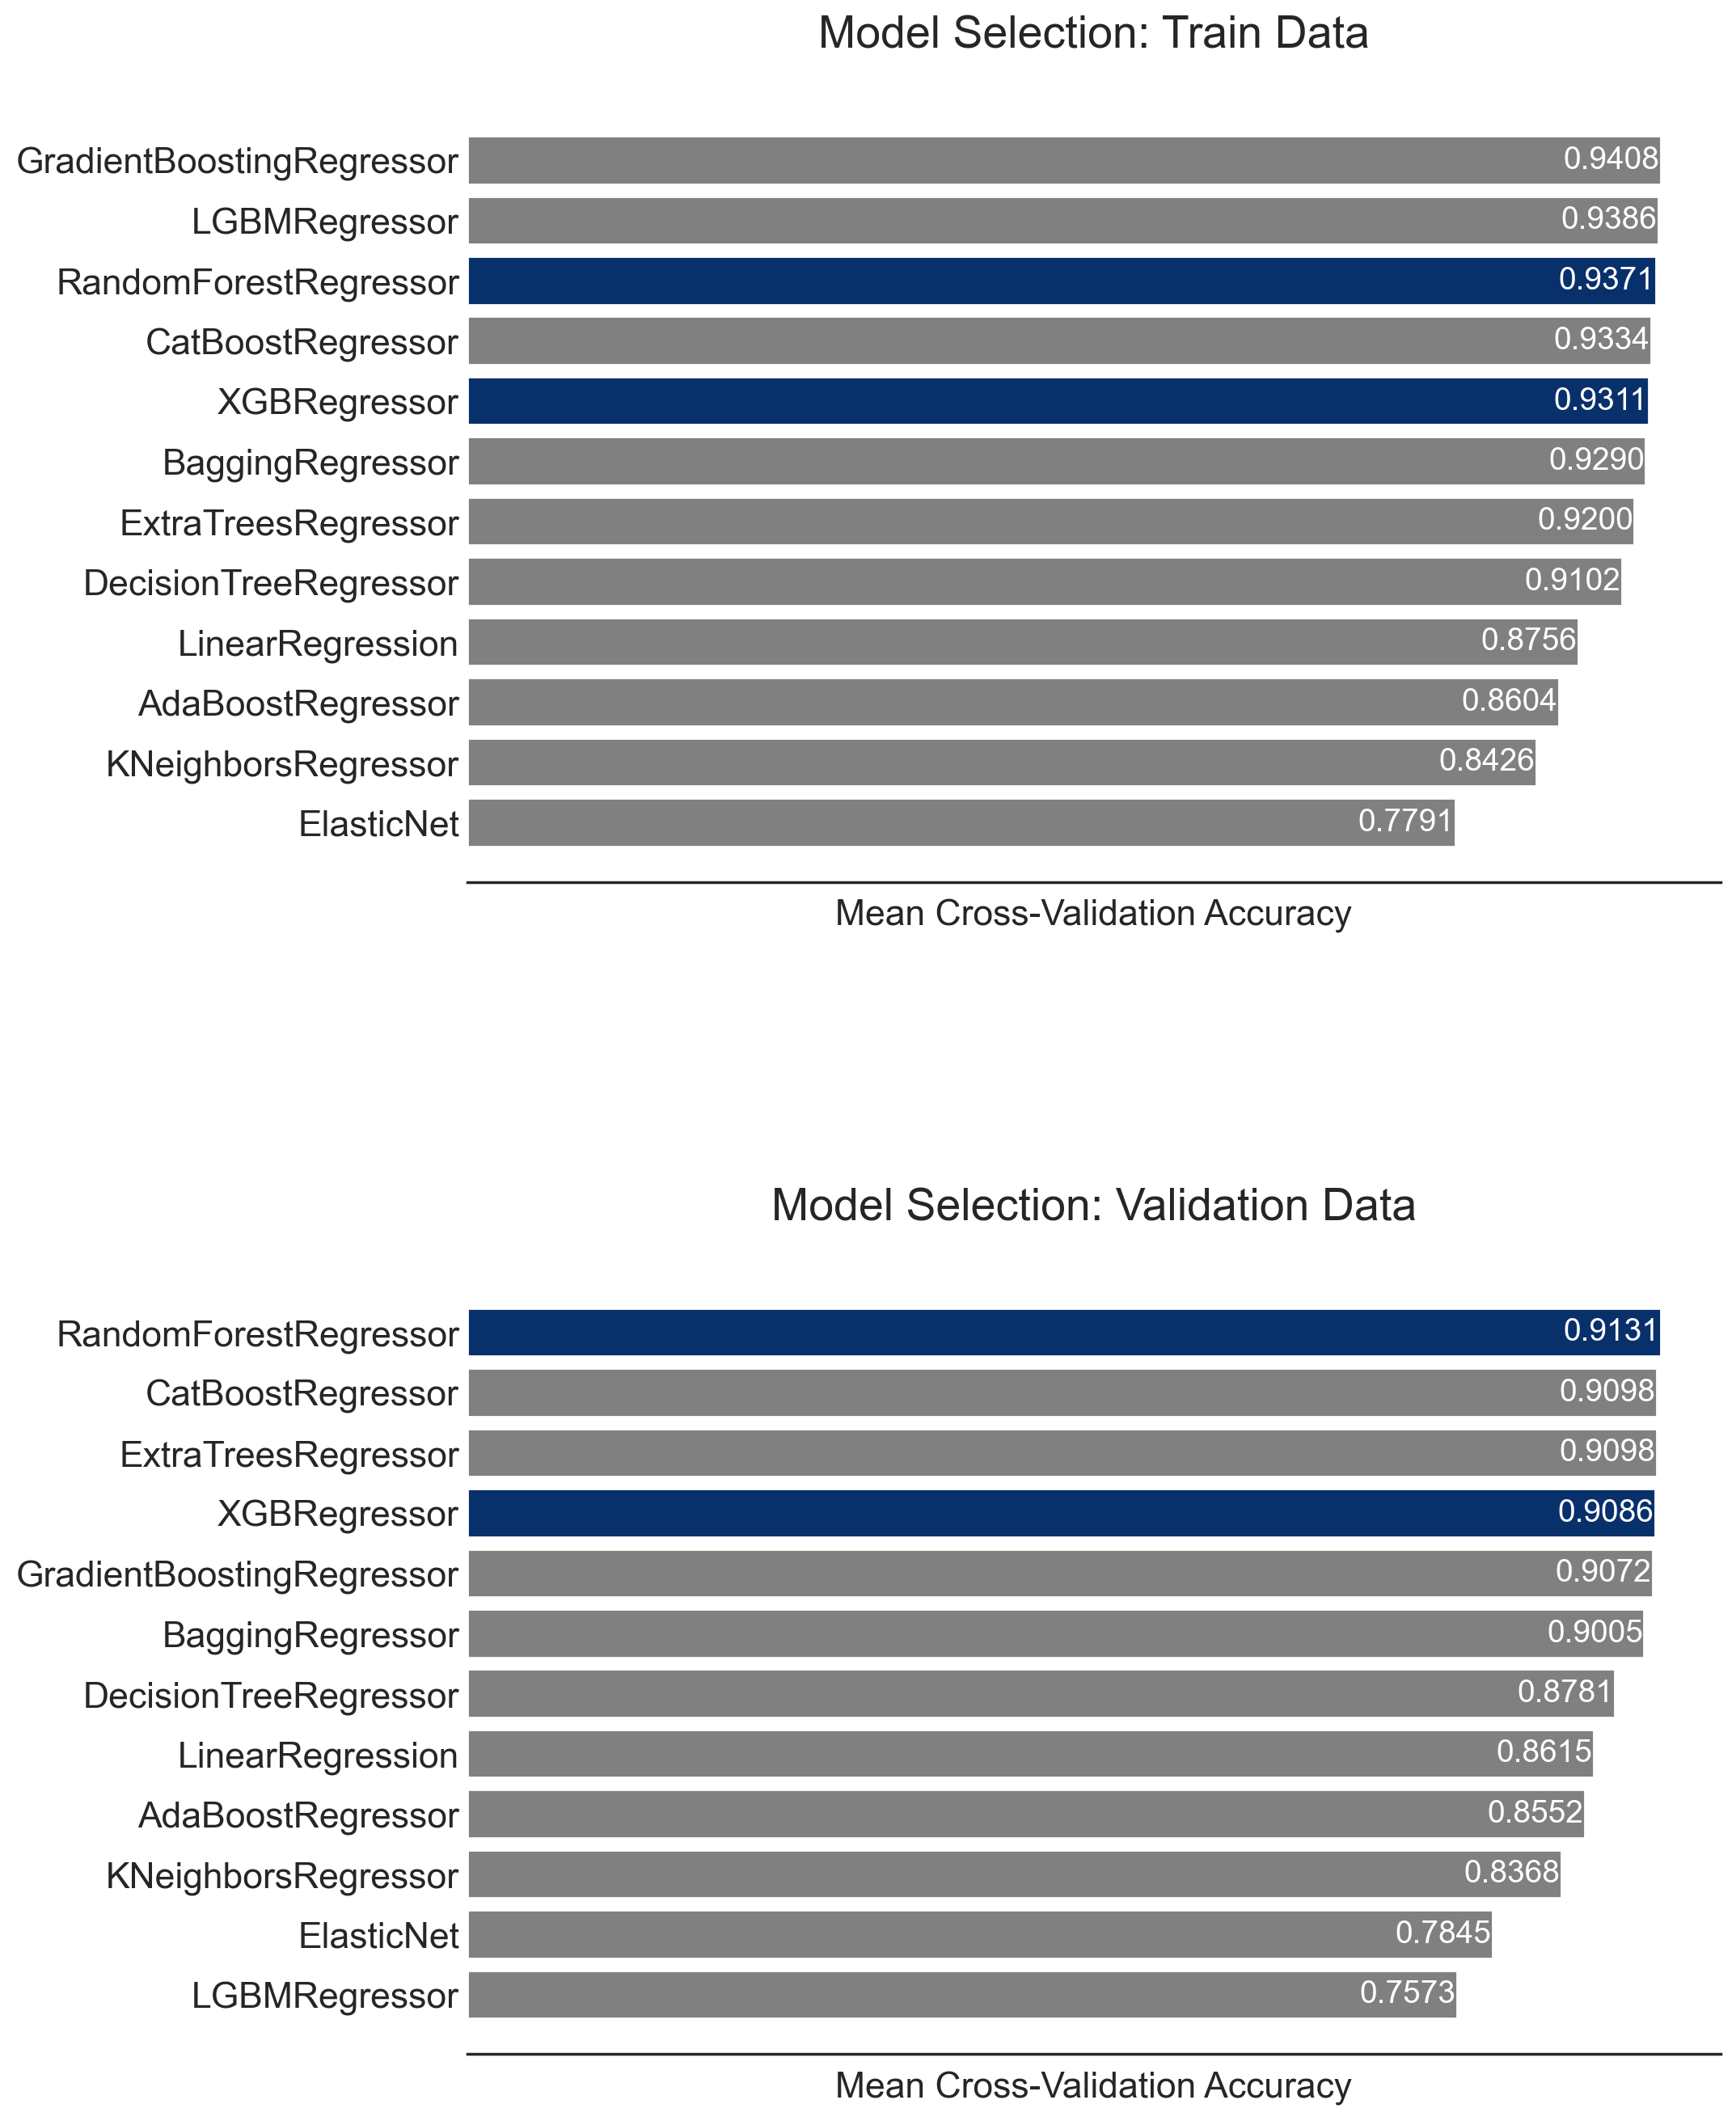

In [103]:
# Set the DPI (dots per inch) for better image quality
plt.rcParams['figure.dpi'] = 200

# Sort the classifier names and mean scores for train data in descending order
sorted_indices_train = np.argsort(mean_scores_train)[::-1]
sorted_model_names_train = [model_names_train[i] for i in sorted_indices_train]
sorted_mean_scores_train = [mean_scores_train[i] for i in sorted_indices_train]

# Define a list to specify the color for each bar based on the classifier names for train data
bar_colors_train = ['grey' if name not in ['RandomForestRegressor', 'XGBRegressor'] else plt.cm.Blues(1.0) for name in sorted_model_names_train]

# Sort the classifier names and mean scores for validation data in descending order
sorted_indices_val = np.argsort(mean_scores_val)[::-1]
sorted_model_names_val = [model_names_val[i] for i in sorted_indices_val]
sorted_mean_scores_val = [mean_scores_val[i] for i in sorted_indices_val]

# Define a list to specify the color for each bar based on the classifier names for validation data
bar_colors_val = ['grey' if name not in ['RandomForestRegressor', 'XGBRegressor'] else plt.cm.Blues(1.0) for name in sorted_model_names_val]

# Generate the combined plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 16))

# Plot for train data
bars_train = ax1.barh(range(len(sorted_model_names_train)), sorted_mean_scores_train, color=bar_colors_train)
ax1.set_xlabel('Mean Cross-Validation Accuracy', fontsize=16)
ax1.set_title('Model Selection: Train Data', fontsize=20, y=1.05)
ax1.invert_yaxis()
ax1.tick_params(axis='both', which='major', labelsize=14)
ax1.tick_params(axis='both', length=0)
ax1.set_xticklabels([])  # Remove x-axis labels
sns.despine(left=True)
for i, (bar, score) in enumerate(zip(bars_train, sorted_mean_scores_train)):
    ax1.text(bar.get_width() - 0.001, bar.get_y() + bar.get_height() / 2, f'{score:.4f}', ha='right', va='center', color='white', fontsize=14)
ax1.set_yticks(range(len(sorted_model_names_train)))
ax1.set_yticklabels(sorted_model_names_train, fontsize=16)  # Increased y-tick label size

# Plot for validation data
bars_val = ax2.barh(range(len(sorted_model_names_val)), sorted_mean_scores_val, color=bar_colors_val)
ax2.set_xlabel('Mean Cross-Validation Accuracy', fontsize=16)
ax2.set_title('Model Selection: Validation Data', fontsize=20, y=1.05)
ax2.invert_yaxis()
ax2.tick_params(axis='both', which='major', labelsize=14)
ax2.tick_params(axis='both', length=0)
ax2.set_xticklabels([])  # Remove x-axis labels
sns.despine(left=True)
for i, (bar, score) in enumerate(zip(bars_val, sorted_mean_scores_val)):
    ax2.text(bar.get_width() - 0.001, bar.get_y() + bar.get_height() / 2, f'{score:.4f}', ha='right', va='center', color='white', fontsize=14)
ax2.set_yticks(range(len(sorted_model_names_val)))
ax2.set_yticklabels(sorted_model_names_val, fontsize=16)  # Increased y-tick label size

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5)

plt.show()


---
# Feature Importance Analysis
## Permutation Importance

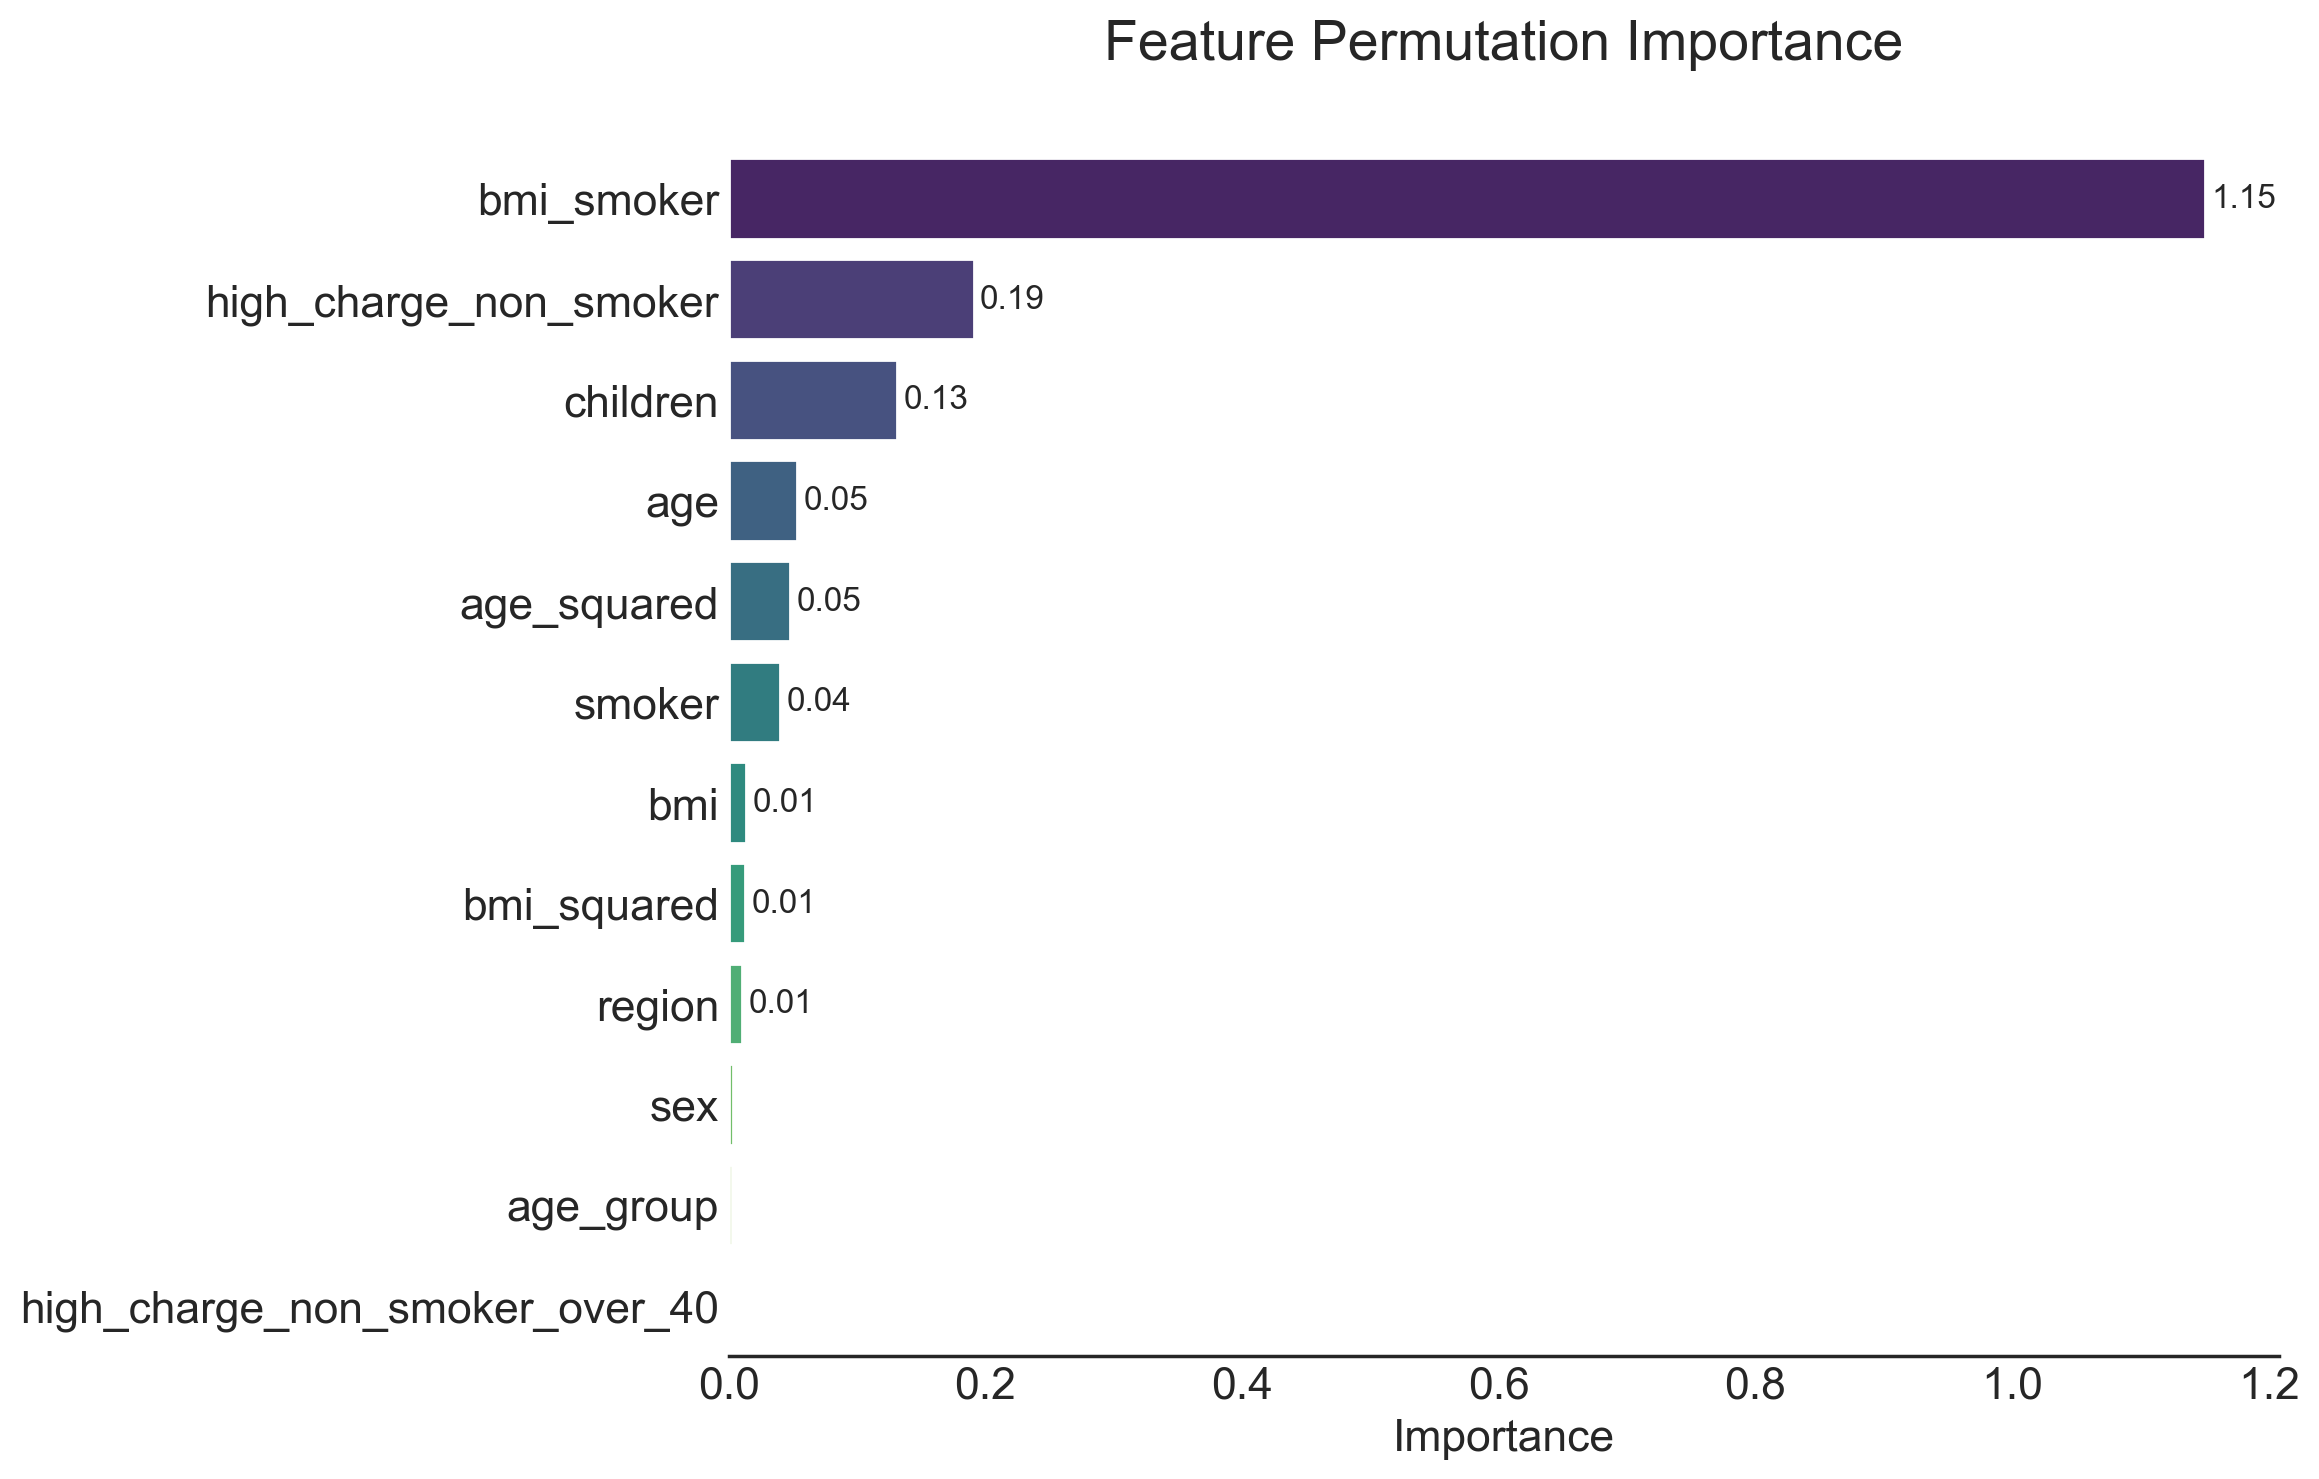

In [21]:
# Import necessary libraries
from sklearn.inspection import permutation_importance

# Define transformations
standard_transformer = make_pipeline(StandardScaler())
robust_transformer = make_pipeline(RobustScaler())
onehot_transformer = make_pipeline(OneHotEncoder(drop="if_binary"))

# Define features and their corresponding transformers
transformers = [
    ('passthrough', ['smoker', 'high_charge_non_smoker', 'high_charge_non_smoker_over_40']),
    (standard_transformer, ['age', 'children', 'age_squared', 'bmi']),
    (robust_transformer, ['bmi_squared', 'bmi_smoker']),
    (onehot_transformer, ['sex', 'region', 'age_group'])
]

# Make column transformer
preprocessor = make_column_transformer(*transformers)

# Define the model
model = RandomForestRegressor(random_state=42)

# Create a pipeline with preprocessing and the model
pipe = make_pipeline(preprocessor, model)

# Train the pipeline on the training data
pipe.fit(X_train, y_train)

# Compute permutation importance
results = permutation_importance(pipe, X_train, y_train, scoring='r2')

# Retrieve feature importance
permutation_importance = results.importances_mean

# Sort feature importances and feature names in descending order
sorted_indices = permutation_importance.argsort()[::-1]
sorted_importances = permutation_importance[sorted_indices]
sorted_feature_names = X_train.columns[sorted_indices]

# Specify the number of top features to annotate
n = 9

# Plot feature importance
plt.figure(figsize=(10, 8))
ax = sns.barplot(y=sorted_feature_names, x=sorted_importances, palette='viridis')

# Set title and axis labels with larger fonts
plt.title('Feature Permutation Importance', fontsize=20, y=1.06)
plt.xlabel('Importance', fontsize=16)
#plt.ylabel('Features', fontsize=16)

# Set ticks labels font size
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)

# Remove ticks from both x and y axes
plt.tick_params(axis='both', length=0)
sns.despine(left=True)

# Annotate the top n bars with importance scores
for i, v in enumerate(sorted_importances[:n]):
    ax.text(v + 0.005, i, f'{v:.2f}', fontsize=12, va='center')

plt.show()

## RF Feature Importance

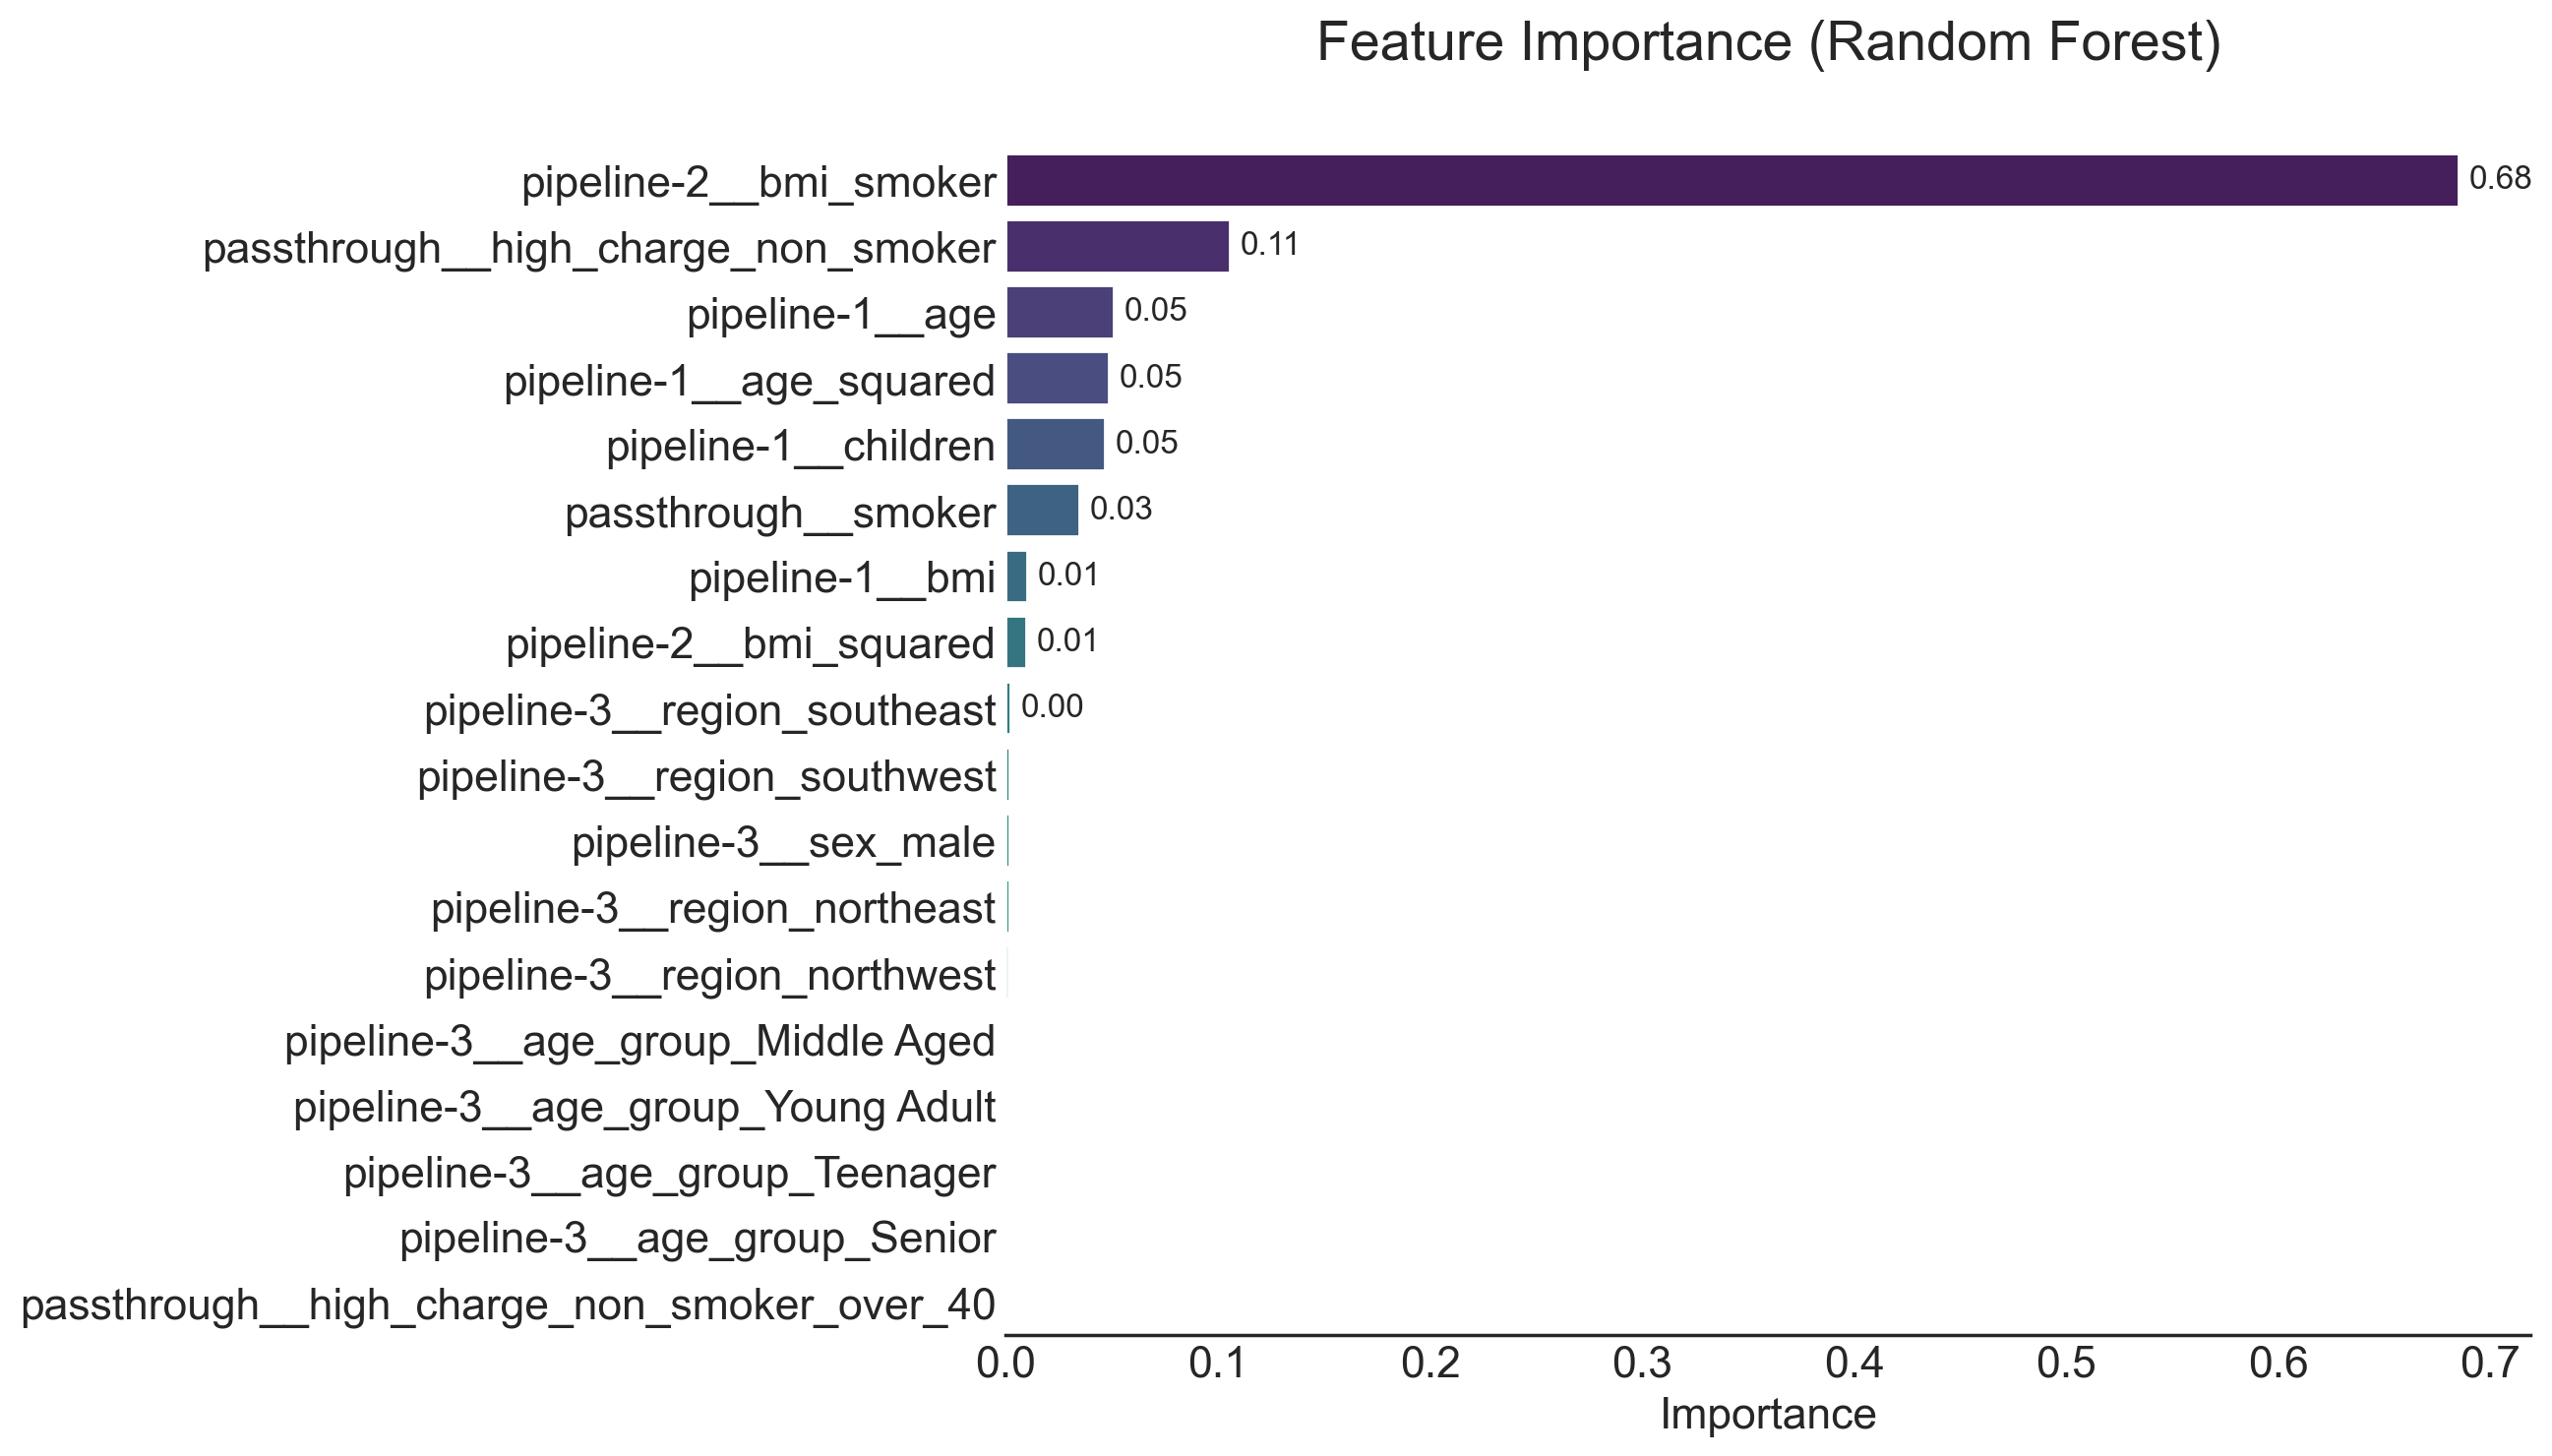

In [22]:
# Define transformations
standard_transformer = make_pipeline(StandardScaler())
robust_transformer = make_pipeline(RobustScaler())
onehot_transformer = make_pipeline(OneHotEncoder(drop="if_binary"))

# Define features and their corresponding transformers
transformers = [
    ('passthrough', ['smoker', 'high_charge_non_smoker', 'high_charge_non_smoker_over_40']),
    (standard_transformer, ['age', 'children', 'age_squared', 'bmi']),
    (robust_transformer, ['bmi_squared', 'bmi_smoker']),
    (onehot_transformer, ['sex', 'region', 'age_group'])
]

# Make column transformer
preprocessor = make_column_transformer(*transformers)

# Define the model
model = RandomForestRegressor(random_state=42)

# Create a pipeline with preprocessing and the model
pipe = make_pipeline(preprocessor, model)

# Train the pipeline on the training data
pipe.fit(X_train, y_train)

# Retrieve feature importance
importances = pipe.named_steps['randomforestregressor'].feature_importances_

# Get feature names from column transformer
feature_names = pipe.named_steps['columntransformer'].get_feature_names_out()

# Sort feature importances and feature names in descending order
sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Specify the number of top features to annotate
n = 9

# Plot feature importance
plt.figure(figsize=(10, 8))
ax = sns.barplot(y=sorted_feature_names, x=sorted_importances, palette='viridis')

# Set title and axis labels with larger fonts
plt.title('Feature Importance (Random Forest)', fontsize=20, y=1.06)
plt.xlabel('Importance', fontsize=16)

# Set ticks labels font size
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)

# Remove ticks from both x and y axes
plt.tick_params(axis='both', length=0)
sns.despine(left=True)

# Annotate the top n bars with importance scores
for i, v in enumerate(sorted_importances[:n]):
    ax.text(v + 0.005, i, f'{v:.2f}', fontsize=12, va='center')

plt.show()


---

## Multicollinearity Analysis

- **Definition**: Multicollinearity occurs when predictors in a model are highly correlated, suggesting overlapping information.

- **Impacts**: This can skew coefficient estimates but won't necessarily harm overall predictive accuracy. It can, however, muddle predictor interpretation and lead to model sensitivity to data shifts.

- **Detection**: We'll use the Variance Inflation Factor (VIF) and correlation matrices. A VIF beyond 5-10 or high predictor correlations can be concerning.

- **Addressing**: Post-detection, methods like feature selection or regularization will be considered to mitigate the issue.

### Feature Correlation Heatmap

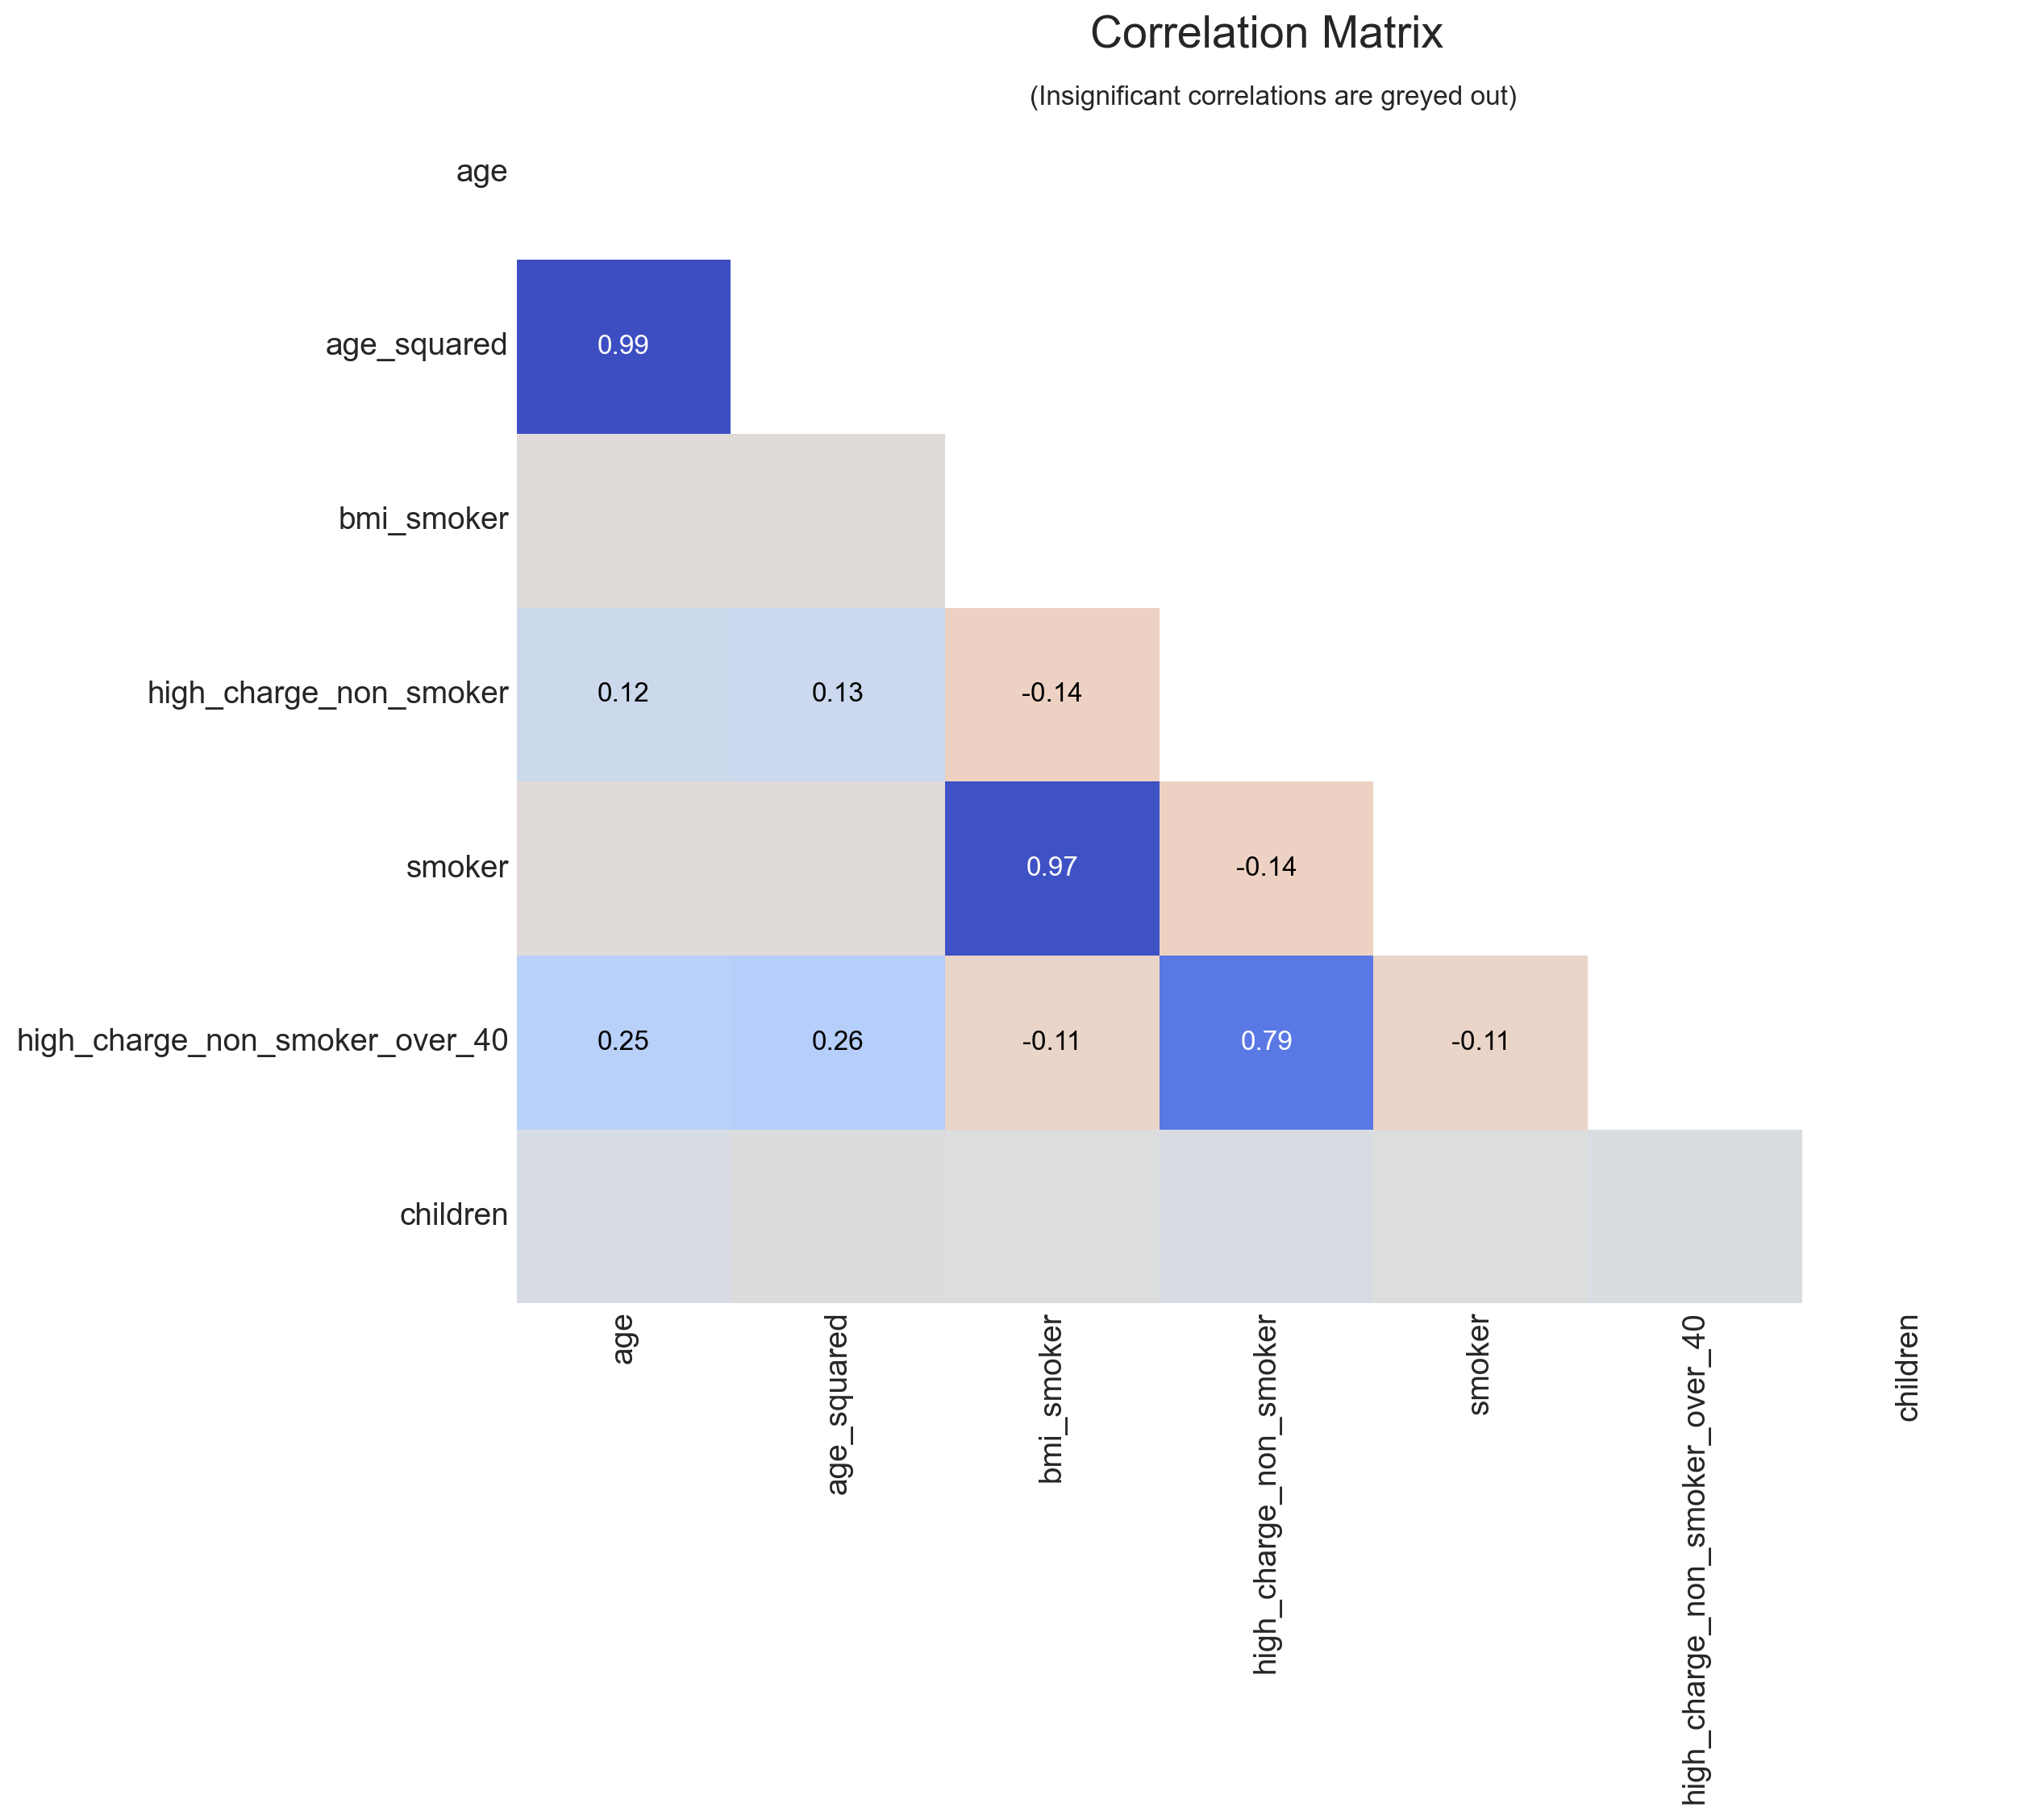

In [23]:
# Subset the data to include more columns
subset = df[['age', 'age_squared', 'bmi_smoker', 'high_charge_non_smoker', 
             'smoker', 'high_charge_non_smoker_over_40', 'children']]

# Calculate the correlation matrix
corr = subset.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Create a larger figure
plt.figure(figsize=(12, 10))

# Add the mask to the heatmap
sns.heatmap(corr, mask=mask, cmap='coolwarm_r', cbar=None, vmin=-1, vmax=1, center=0)

# Annotate only high correlations and only in the lower triangle
for (i, j), z in np.ndenumerate(corr):
    if (0.1 < abs(z) < 1.0) and (i > j):  # change this line
        plt.text(j+0.5, i+0.5, '{:0.2f}'.format(z), ha='center', va='center', 
                 color='white' if abs(z) > 0.6 else 'black')
        
# Add annotation
plt.annotate("(Insignificant correlations are greyed out)",
             xy=(0.342, 0.98), xycoords='axes fraction', fontsize=12, va='bottom', ha='left')

# Set title and x-tick and y-tick text size
plt.tick_params(axis='both', length=0)
plt.title('Correlation Matrix', fontsize=20, y=1.02)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

### Variance Inflation Factor (VIF)
- Unlike correlation, VIF captures complex multicollinearity even when the correlation between predictors is not very high.

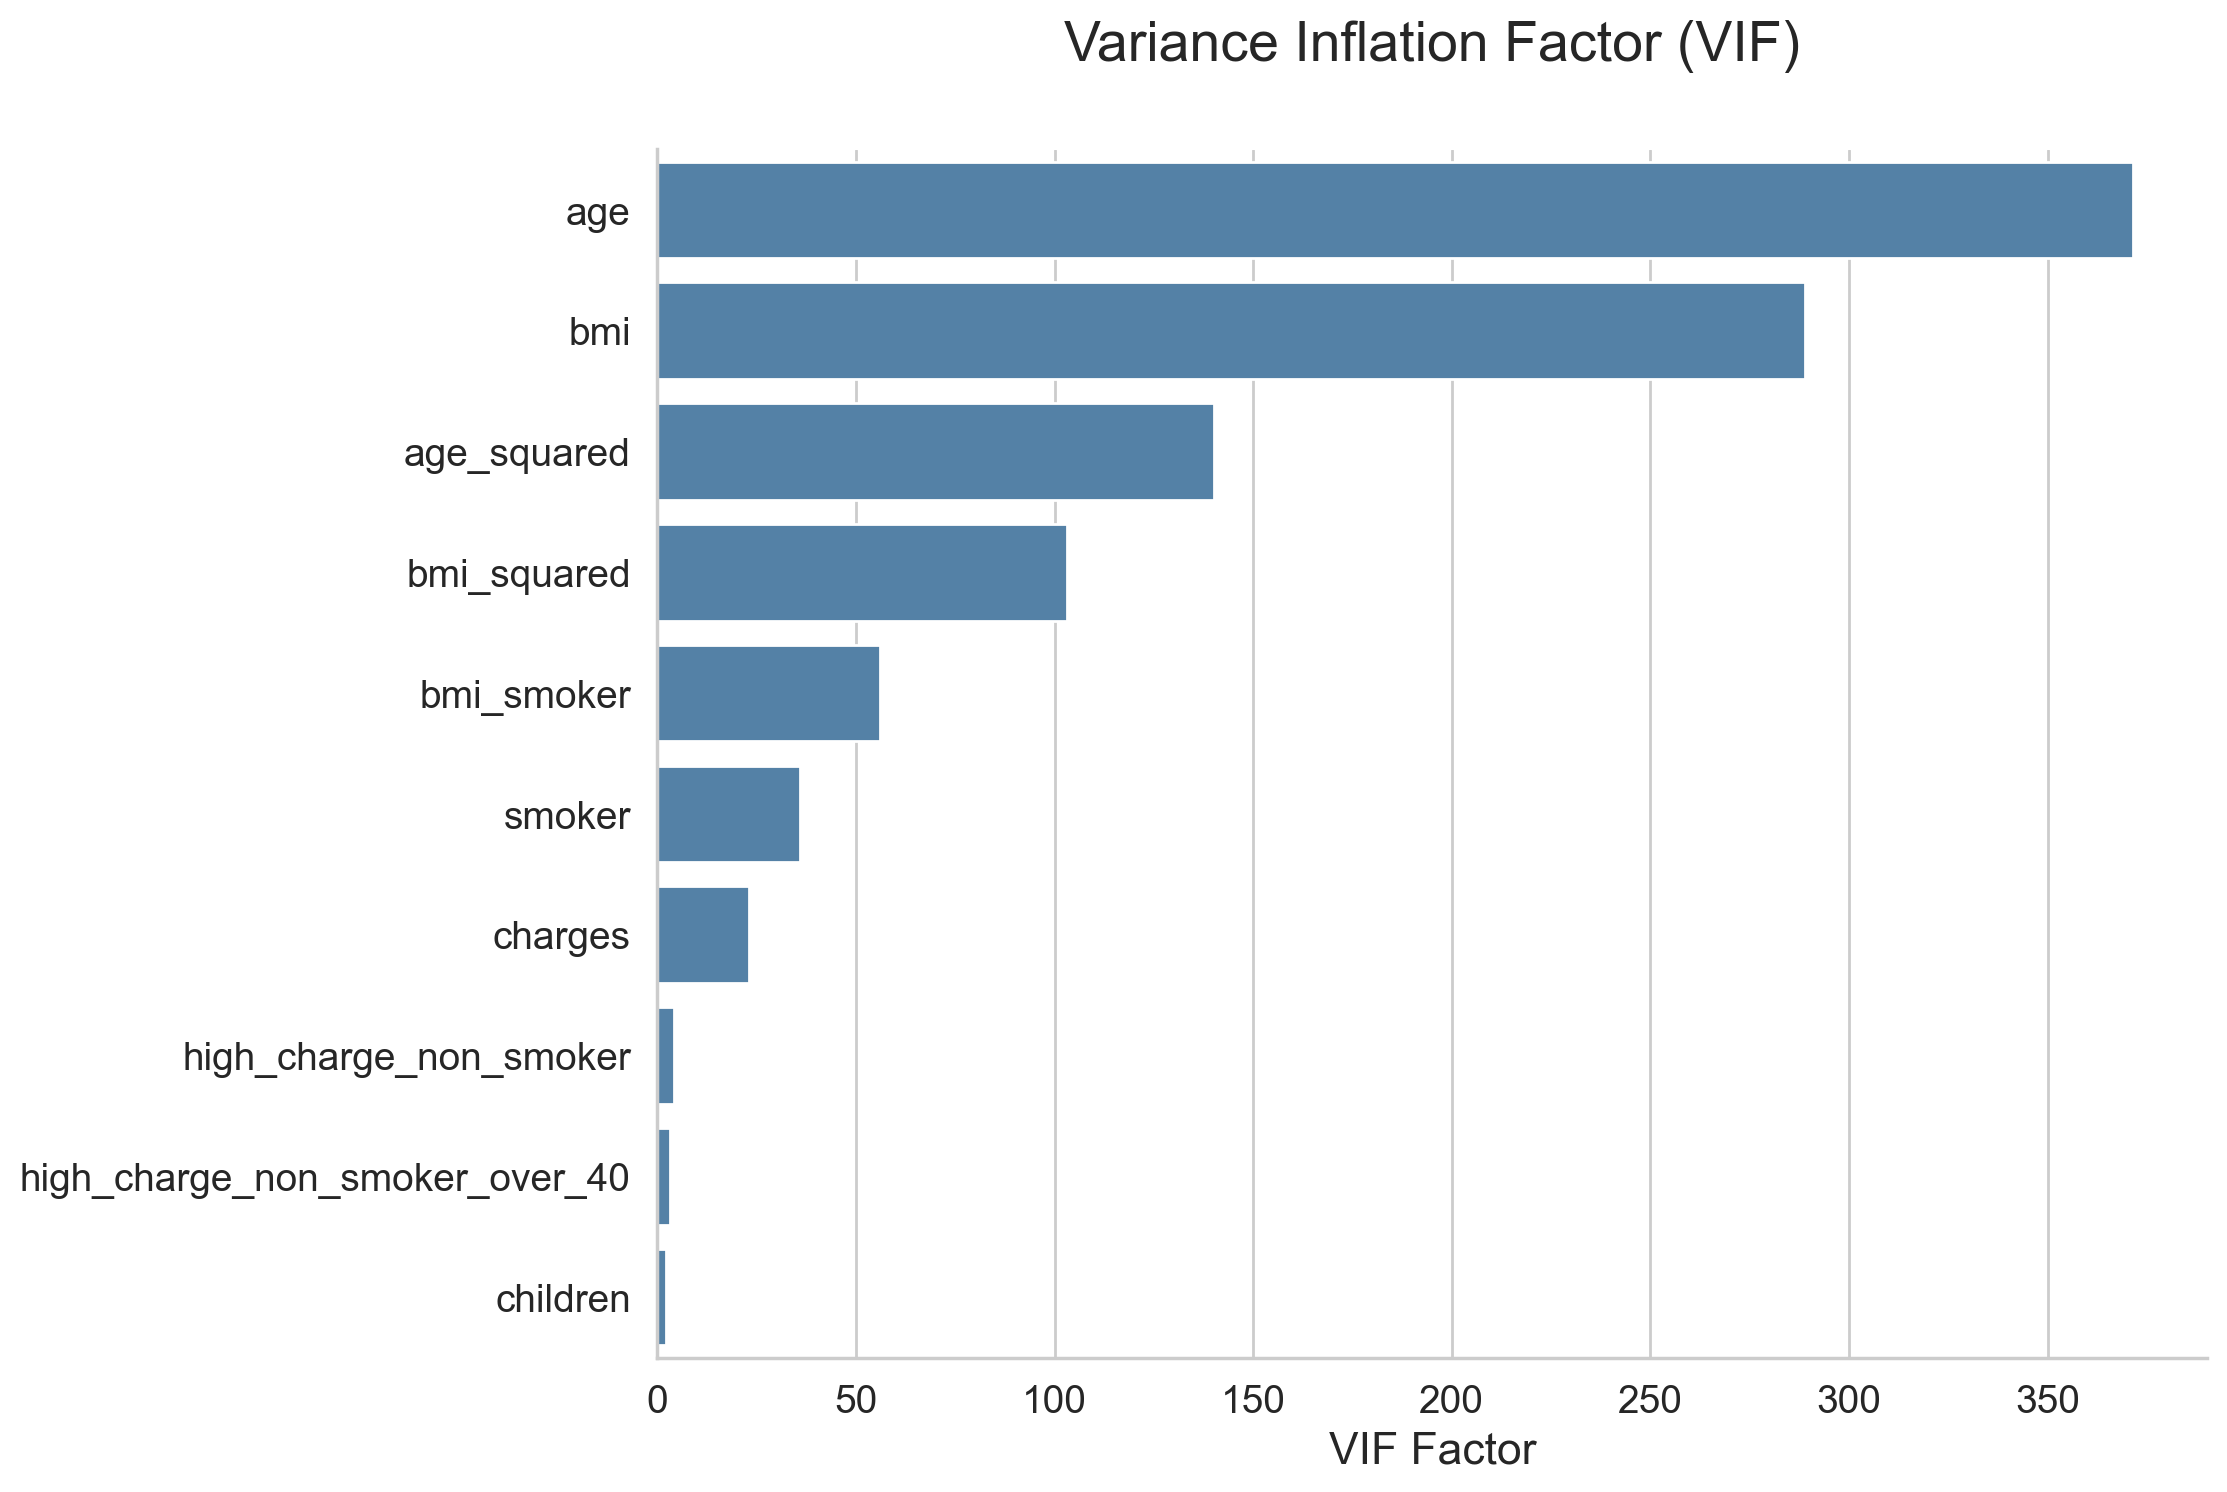

In [104]:
# Import necessary libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assume df is your DataFrame and you've filtered it to only the numeric columns you're interested in
numeric_df = df.select_dtypes(include=[np.number])

# Drop any infinite or NaN values
numeric_df = numeric_df.replace([np.inf, -np.inf], np.nan).dropna()

# Compute VIF
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(numeric_df.values, i) for i in range(numeric_df.shape[1])]
vif["features"] = numeric_df.columns

# Set the DPI for better image quality
plt.rcParams['figure.dpi'] = 200

# Sort the VIF values in descending order
vif_sorted = vif.sort_values('VIF Factor', ascending=False)

# Plot the VIF values as a bar plot
plt.figure(figsize=(10, 8))
sns.set_style('whitegrid')
sns.barplot(x='VIF Factor', y='features', data=vif_sorted, color='steelblue')

# Set the title and labels with larger fonts
plt.title('Variance Inflation Factor (VIF)', fontsize=20, y=1.06)
plt.xlabel('VIF Factor', fontsize=16)
plt.ylabel("")  # 'Features', fontsize=16

# Set the tick label font size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

sns.despine()

# Show the plot
plt.show()



### Summary: Feature Correlation and Multicollinearity Analysis

- **Multicollinearity**: Key pairs like `age`/`age_squared` and `bmi_smoker`/`smoker` have correlations of ~0.988 and ~0.974, hinting at overlapping information.

- **VIF**: Prominent values include `age` (371.58), `bmi` (289.03), `age_squared` (140.12), and a few others, pointing to multicollinearity.

- **Correlation**: `high_charge_non_smoker` and `high_charge_non_smoker_over_40` correlate at ~0.793, indicating potential redundancy.

In light of these findings, refining feature selection to address multicollinearity and redundancy is crucial for model interpretability and performance.

<hr style="border:1px solid #4A90E2"> </hr>

# Feature Selection
## Pruning: Recursive Feature Elimination (RFE)

**Importance of Pruning**:
- Pruning removes redundant and irrelevant features, thus simplifying the model and enhancing interpretability. This process can lead to better performance on unseen data.

**Why RFE?**:
- RFE simulates exhaustive feature selection but is more computationally efficient.
  
**How RFE Functions:**  
1. Systematically removes features.
2. Constructs a model with the remaining features.
3. Ranks features based on model accuracy to highlight the most critical predictors.

**Our RFE Application**: 
- **Method**: We employed `RFECV` from Scikit-learn, using a RandomForestRegressor as the estimator.
- **Results**: RFE identified the following as the top-ranking features:
```markdown
['age', 'age_squared', 'bmi_smoker', 'children', 'high_charge_non_smoker', 'smoker']
```

In [25]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestRegressor

def select_features(df, target_col):
    """
    Function to automatically select numerical and categorical features.
    target_col (str): the target variable
    """
    # Get all column names except the target column
    all_cols = [col for col in df.columns if col != target_col]
    
    # Separate categorical and numerical columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    numerical_cols = list(set(all_cols) - set(categorical_cols))

    return all_cols, categorical_cols, numerical_cols

# Usage
selection, categorical_cols, numerical_cols = select_features(df, 'charges')

# define the transformers for the ColumnTransformer
transformers = [('cat', OneHotEncoder(), categorical_cols), ('num', 'passthrough', numerical_cols)]

# define the column transformer
ct = ColumnTransformer(transformers=transformers)

# define your X and y
X = df[selection]
y = df['charges']

# apply the column transformer to X
X_transformed = ct.fit_transform(X)

# create the model
model = RandomForestRegressor(random_state=42)

# create the RFE object
rfecv = RFECV(estimator=model, step=1, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# fit RFE
rfecv.fit(X_transformed, y)

# get the feature names
feature_names = ct.named_transformers_['cat'].get_feature_names_out(categorical_cols)
feature_names = np.concatenate([feature_names, numerical_cols])

# Get DataFrame with ranking and feature names
feature_rankings = pd.DataFrame(sorted(zip(rfecv.ranking_, feature_names)), columns=['Rank', 'Feature'])

# Saving rank 1 features into a list
selected_features = feature_rankings[feature_rankings['Rank'] == 1]['Feature'].tolist()

feature_rankings.set_index('Rank', inplace=True)

# print("\nSelected Features List (Rank 1):", selected_features)
feature_rankings

# print("\nSelected Features List (Rank 1):", selected_features)

Feature
Rank                                
1                                age
1                        age_squared
1                         bmi_smoker
1                           children
1             high_charge_non_smoker
1                             smoker
2                        bmi_squared
3                                bmi
4                   region_southeast
5                   region_northeast
6                         sex_female
7                   region_southwest
8                   region_northwest
9                           sex_male
10             age_group_Young Adult
11             age_group_Middle Aged
12                age_group_Teenager
13                  age_group_Senior
14    high_charge_non_smoker_over_40

---

## Custom Feature Selection Algorithm

**Objective**: Incrementally select features that optimize the validation score using a RandomForestRegressor model. Stop when additional features don't improve the score.

**Process**:
1. Begin with top-ranked features from RFE.
2. In each iteration, add a feature that yields the highest validation score.
3. If a newly added feature doesn't improve the score, halt.

**Results**:
The top-performing feature combinations were:
- **4 Features**: ['bmi_smoker', 'high_charge_non_smoker', 'age_squared', 'children']
  - Training R-Score: 0.9856
  - Validation R-Score: 0.9487
- **5 Features**: ['bmi_smoker', 'high_charge_non_smoker', 'age_squared', 'children', 'age']
  - Training R-Score: 0.9856
  - Validation R-Score: 0.9490

The addition of the fifth feature, `'age'`, led to only a marginal improvement in the validation score.

**Conclusion**: 
While both the 4-feature and 5-feature combinations have comparable performance, we favor the 4-feature set. Adhering to Occam's razor, we prioritize simpler models when their efficacy matches more complex counterparts. The 4-feature combination achieves this balance of performance and simplicity.

In [26]:
def incremental_feature_selection(df, selection, transformers):
    """
    Implements an incremental or greedy forward feature selection strategy using the specified data, 
    potential feature list, and transformers. The strategy is to add one feature at a time that maximizes 
    the validation score of a RandomForestRegressor model, until no additional feature can improve the score.
    
    Parameters
    ----------
    df : pandas.DataFrame
        The input dataframe containing the potential features and target variable.
    selection : list
        The list of potential feature names (strings) to be considered for selection.
    transformers : list of tuples
        Each tuple consists of a transformer instance and a list of feature names (strings) 
        to which the transformer should be applied. Each transformer should be an instance 
        of a class that implements the `fit` and `transform` methods.

    Returns
    -------
    None. 
        The function prints out the highest validation scores and corresponding features for 
        each step of the feature selection process, and does not return any value. The process 
        stops and exits when no remaining feature can improve the validation score.

    Raises
    ------
    ValueError
        Errors could implicitly be raised during execution:
        - If any feature in `selection` is not present in `df`, a KeyError could be raised when 
          attempting to create subsets of `df`.
        - If any transformer in `transformers` is not an instance of a class implementing `fit` and 
          `transform`, an AttributeError could be raised when attempting to fit and transform the data.

    Examples
    --------
    >>> df = pd.DataFrame({'A': [1, 2, 3], 'B': [2, 3, 4], 'C': [3, 4, 5], 'D': [5, 6, 7]})
    >>> selection = ['A', 'B', 'C']
    >>> transformers = [('passthrough', ['A', 'B']), (StandardScaler(), ['C'])]
    >>> incremental_feature_selection(df, selection, transformers)
    """

    # store current best score
    best_score = 0
    # store best features
    best_features = []

    # loop through the features to try
    for _ in range(len(selection)):
        scores = []
        train_scores = []
        # loop through each feature not yet selected
        for feature in [f for f in selection if f not in best_features]:
            # X and y
            new_selection = best_features + [feature]
            df_temp = df[new_selection + ['charges']]

            # split the data into train, val and test sets
            X_train2, y_train2, X_val2, y_val2, X_test2, y_test2 = split_data(df, 'charges', verbose=False)

            # create a list of transformers for the selected columns
            transformers_list = [(trans, [col for col in cols if col in new_selection]) for _, trans, cols in transformers]

            # remove empty transformer lists
            transformers_list = [(trans, cols) for trans, cols in transformers_list if cols]

            # create the column transformer with the relevant transformers
            prepro = make_column_transformer(*transformers_list)

            # create the pipeline
            reg = RandomForestRegressor(random_state=42)
            pipe = make_pipeline(prepro, reg)

            # train the model
            pipe.fit(X_train2, y_train2)

            # evaluate the model on the val set and train set
            val_score = pipe.score(X_val2, y_val2)
            train_score = pipe.score(X_train2, y_train2)

            scores.append((feature, val_score))
            train_scores.append((feature, train_score))

        # find the best feature of this round
        scores.sort(key=lambda x: x[1], reverse=True)
        best_feature, best_new_score = scores[0]

        # find train score of best feature of this round
        _, best_new_train_score = next(item for item in train_scores if item[0] == best_feature)

        # if the best new score is better than the current best score, add the feature to our list
        if best_new_score > best_score:
            best_features.append(best_feature)
            best_score = best_new_score
            print(f"Highest score for [{len(best_features)}] columns is:", best_features)
            print(f"\tTrain R-Score: {best_new_train_score}")
            print(f"\tValidation R-Score: {best_score}\n")
        else:
            print("No improvement, stopping")
            break
            
# Calling the function
incremental_feature_selection(df, selected_features, transformers)


Highest score for [1] columns is: ['bmi_smoker']
	Train R-Score: 0.7397672083226497
	Validation R-Score: 0.7198081988642369

Highest score for [2] columns is: ['bmi_smoker', 'high_charge_non_smoker']
	Train R-Score: 0.8580241579581745
	Validation R-Score: 0.8250569987035106

Highest score for [3] columns is: ['bmi_smoker', 'high_charge_non_smoker', 'age_squared']
	Train R-Score: 0.9373097560900757
	Validation R-Score: 0.896923570987578

Highest score for [4] columns is: ['bmi_smoker', 'high_charge_non_smoker', 'age_squared', 'children']
	Train R-Score: 0.9855844306842048
	Validation R-Score: 0.9486953562624495

Highest score for [5] columns is: ['bmi_smoker', 'high_charge_non_smoker', 'age_squared', 'children', 'age']
	Train R-Score: 0.9856256432500897
	Validation R-Score: 0.9490385727462396

No improvement, stopping


<hr style="border:1px solid #4A90E2"> </hr>

<a name="HyperparameterTuning"></a>
# Hyperparameter Tuning

To enhance model performance, we'll fine-tune parameters using techniques such as grid search and random search. This iterative process continues until we achieve desirable model outcomes. Both individual model parameters and ensemble-specific parameters (if applicable) will be tuned.

Our focus will be on adjusting hyperparameters for the following regressors:
- RandomForestRegressor
- XGBRegressor

**Display Tuning Results & Metrics Function**

In [27]:
from prettytable import PrettyTable
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


def display_search_results(search_estimator, X_val=None, y_val=None):
    """
    Display hyperparameter tuning results and metrics in tables.

    Summarizes the results of hyperparameter tuning from a trained GridSearchCV 
    or RandomizedSearchCV. If validation data (`X_val` and `y_val`) is provided, 
    it also computes and displays RMSE, MAE, and R2 Score metrics.

    Parameters
    ----------
    search_estimator : sklearn estimator
        Trained instance of GridSearchCV or RandomizedSearchCV.
    X_val : array-like, shape (n_samples, n_features), optional
        Validation dataset to compute additional metrics. Default is None.
    y_val : array-like, shape (n_samples, ), optional
        Actual labels for `X_val`. Used only if `X_val` is provided. Default is None.

    Returns
    -------
    None
        Outputs the tuning results and metrics (if validation data is given) to the console.

    Examples
    --------
    >>> from sklearn.ensemble import RandomForestRegressor
    >>> from sklearn.model_selection import GridSearchCV
    >>> param_grid = {'randomforestregressor__n_estimators': [10, 50, 100]}
    >>> pipe = make_pipeline(preprocessor, RandomForestRegressor())
    >>> search = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=5)
    >>> search.fit(X_train, y_train)
    >>> display_search_results(search, X_val, y_val)

    Notes
    -----
    Assumes `search_estimator` is a fit instance of GridSearchCV or RandomizedSearchCV.
    The model's name is extracted from `search_estimator` for the results table title.
    """
    
    # Extract the model name from the estimator
    model_name = search_estimator.estimator.steps[-1][1].__class__.__name__
    title = f"{model_name} Tuning Results"
    
    # PrettyTable display
    myTable = PrettyTable(["Parameter", "Value"])
    
    # Check if best_params_ exists
    if hasattr(search_estimator, 'best_params_'):
        for key, value in search_estimator.best_params_.items():
            myTable.add_row([key, value])
    else:
        myTable.add_row(["No parameters found", "N/A"])
        
    myTable.title = title
    print(myTable)

    # PrettyTable for Metrics
    def display_metrics(y_true, y_pred, dataset_name):
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))
        mae = mean_absolute_error(y_true, y_pred)
        r2 = r2_score(y_true, y_pred)

        # Adjust column width based on dataset name length
        max_len = len("Validation")
        padding = max_len - len(dataset_name)
        adjusted_dataset_name = dataset_name + " " * padding

        metrics_table = PrettyTable(["Metric", adjusted_dataset_name])
        metrics_table.add_row(["RMSE", f"{rmse:.2f}"])
        metrics_table.add_row(["MAE", f"{mae:.2f}"])
        metrics_table.add_row(["R2 Score", f"{r2:.2f}"])

        print(metrics_table)

    
    # Display training metrics
    y_train_pred = search_estimator.predict(X_train)
    display_metrics(y_train, y_train_pred, "Training")

    # Evaluate and display metrics on the validation set if provided
    if X_val is not None and y_val is not None:
        y_val_pred = search_estimator.predict(X_val)
        display_metrics(y_val, y_val_pred, "Validation")


---

## Preprocessing for Selected Features

Updating the preprocessing pipeline with the optimal feature set identified during feature selection.

In [28]:
# Define features and their corresponding transformers
transformers = [
    ('passthrough', ['high_charge_non_smoker']),
    (standard_transformer, ['children', 'age_squared']),
    (robust_transformer, ['bmi_smoker'])
]

# Make column transformer
preprocessor = make_column_transformer(*transformers)


---

## Random Forest
Despite a reduced feature set, our Random Forest model showcases strong performance, affirming the success of our feature selection approach. We're on the right track.

In [29]:
# Define hyperparameter grids for RandomForestRegressor
def get_param_grid():
    return {
        'randomforestregressor__max_depth': [15],        # Max depth of the trees, limiting how many splits it can make
        'randomforestregressor__max_features': [3],      # Max num of features considered when looking for the best split
        'randomforestregressor__max_leaf_nodes': [None], # Max number of terminal nodes/leaves in a tree
        'randomforestregressor__min_samples_leaf': [2],  # Min samples needed in a leaf after splitting
        'randomforestregressor__min_samples_split': [5], # Sets min num of samples required to split an internal node
        'randomforestregressor__n_estimators': [70],     # Num of trees in the forest
        #'randomforestregressor__max_samples': [0.7],    # Max number or fraction of samples to draw for training each estimator
        # ... other hyperparameters as needed
        
    }


# Hyperparameter tuning for RandomForestRegressor
regressor = RandomForestRegressor(random_state=random_state)
pipe = make_pipeline(preprocessor, regressor)

grid_rf = GridSearchCV(estimator=pipe,
                      param_grid=get_param_grid(),
                      cv=num_folds,
                      scoring="r2")
grid_rf.fit(X_train, y_train)

# Display best parameters and their corresponding train score
display_search_results(grid_rf, X_val, y_val)


+--------------------------------------------------+
|       RandomForestRegressor Tuning Results       |
+------------------------------------------+-------+
|                Parameter                 | Value |
+------------------------------------------+-------+
|     randomforestregressor__max_depth     |   15  |
|   randomforestregressor__max_features    |   3   |
|  randomforestregressor__max_leaf_nodes   |  None |
| randomforestregressor__min_samples_leaf  |   2   |
| randomforestregressor__min_samples_split |   5   |
|   randomforestregressor__n_estimators    |   70  |
+------------------------------------------+-------+
+----------+------------+
|  Metric  | Training   |
+----------+------------+
|   RMSE   |  2045.82   |
|   MAE    |   952.44   |
| R2 Score |    0.97    |
+----------+------------+
+----------+------------+
|  Metric  | Validation |
+----------+------------+
|   RMSE   |  2787.13   |
|   MAE    |  1270.22   |
| R2 Score |    0.95    |
+----------+------------+


### RF Decision Trees Plot

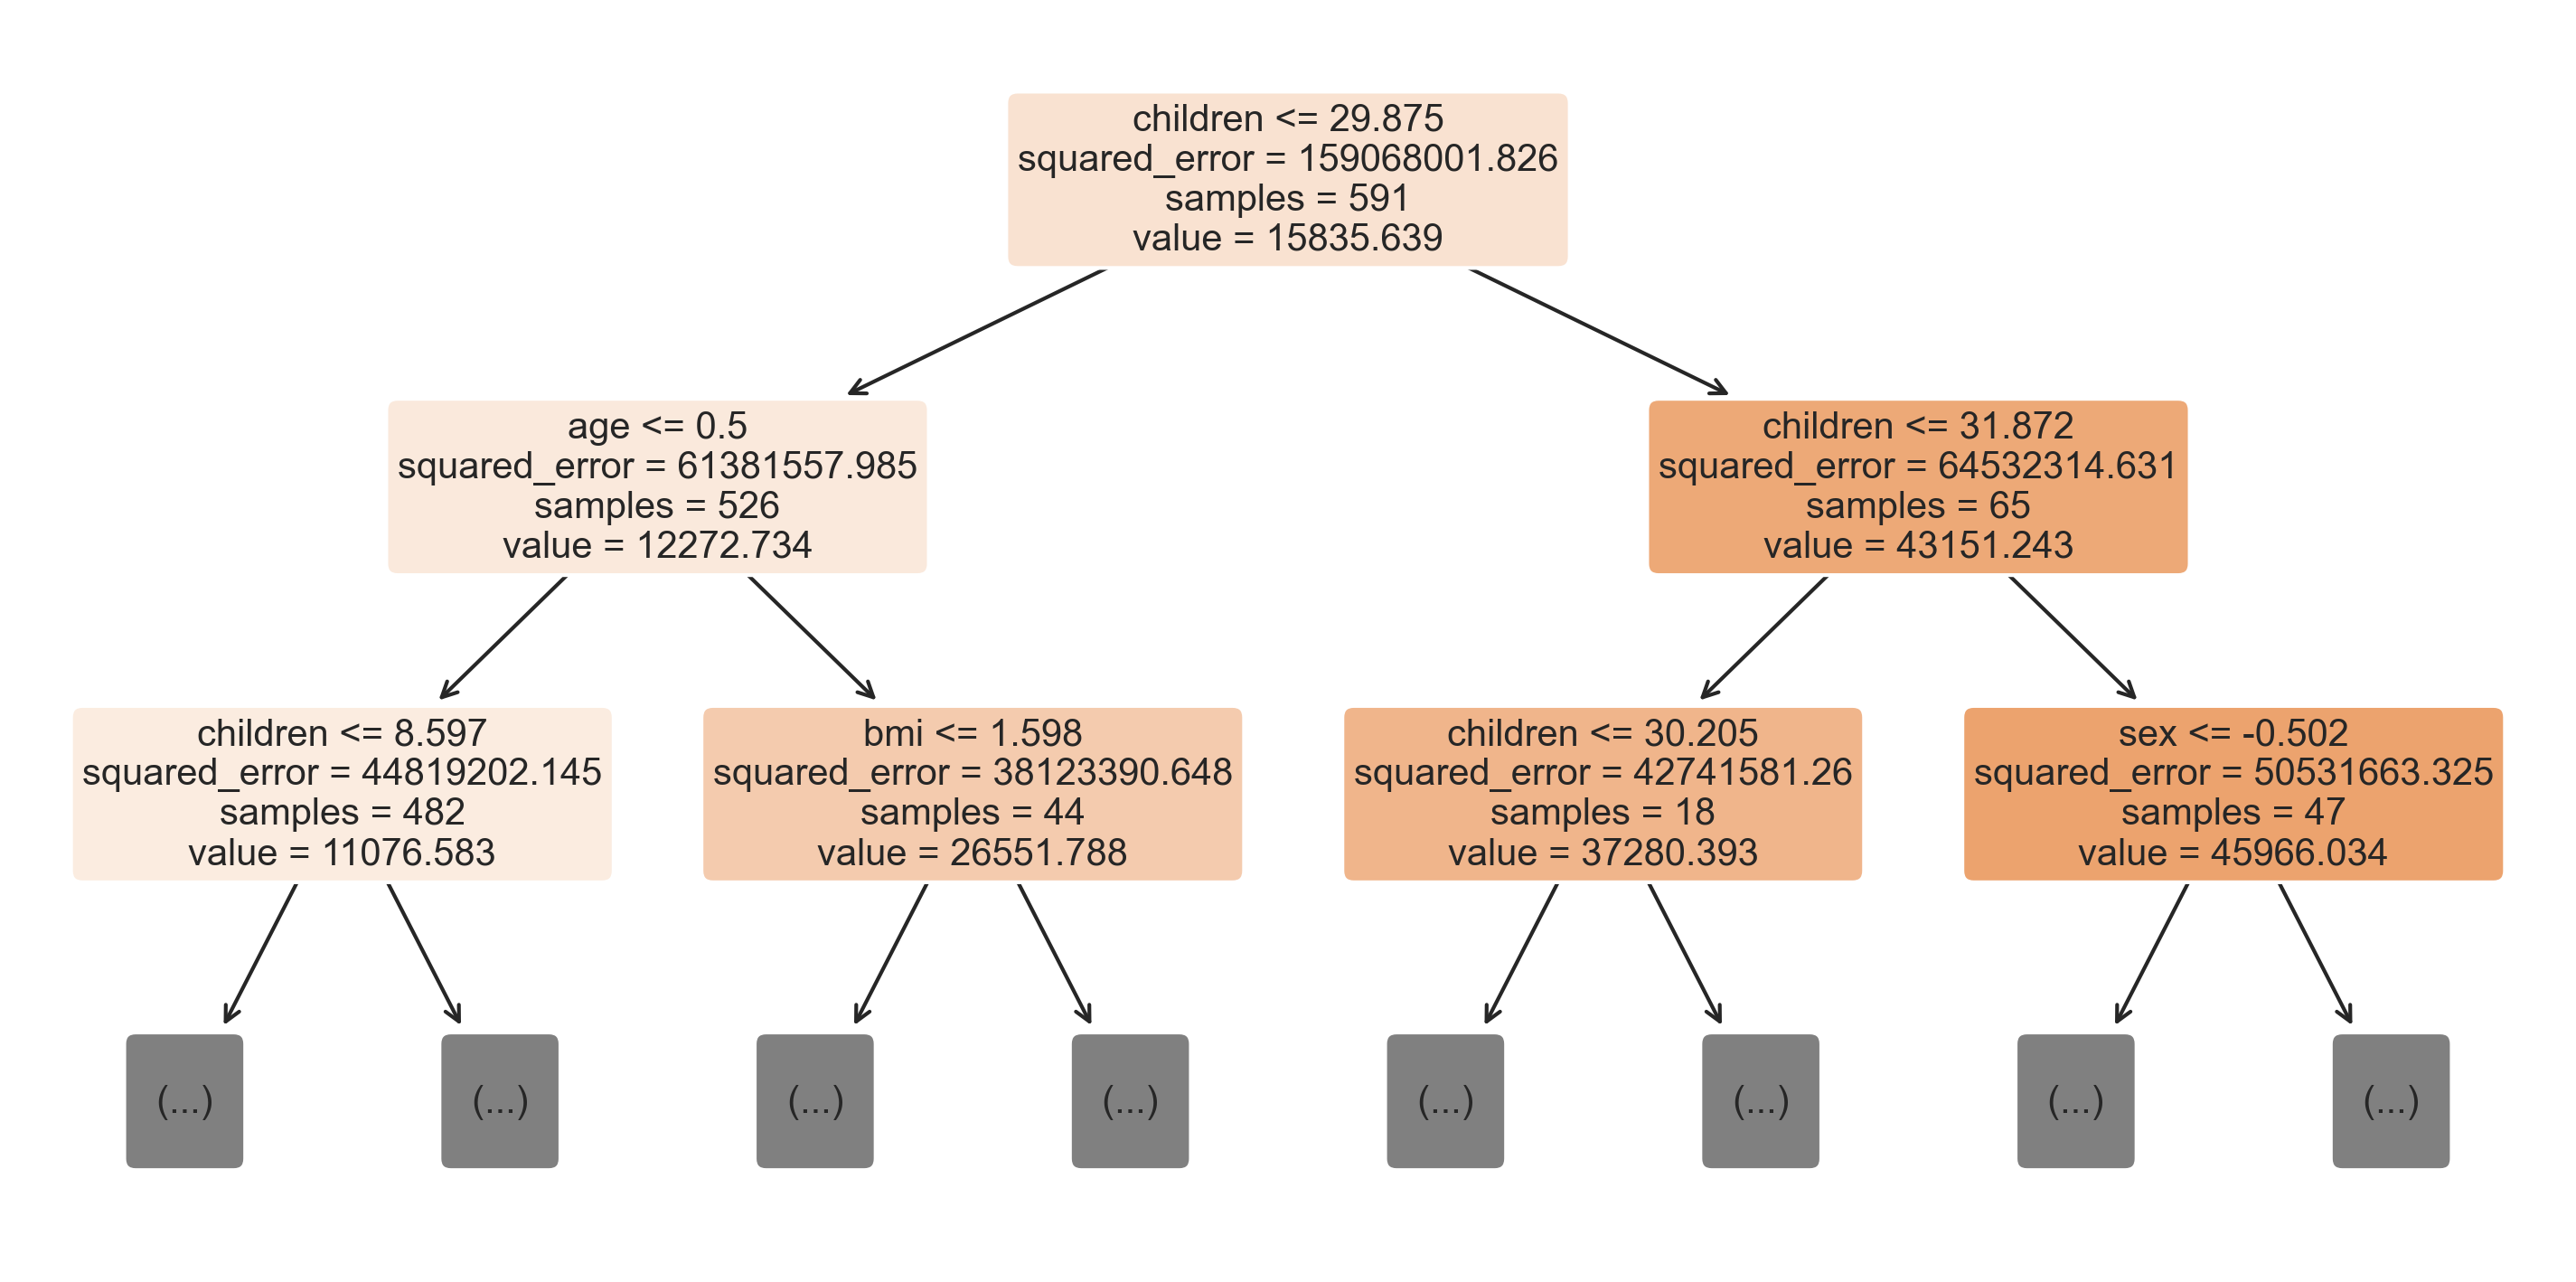

In [102]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Extract the best RandomForestRegressor estimator from GridSearchCV
best_rf = grid_rf.best_estimator_.named_steps['randomforestregressor']

# Define a function to visualize a tree to a specific depth
def visualize_tree(tree, feature_names, max_depth=None):
    plt.figure(figsize=(12,6), dpi=300) # Set dpi to 300 for clearer visualization
    plot_tree(tree, 
              feature_names=feature_names, 
              filled=True,
              rounded=True, 
              fontsize=10,
              max_depth=max_depth) # Limit the depth of the tree if max_depth is provided
    plt.show()

# Visualize the nth tree from the forest to a depth of 3 for easier interpretation
visualize_tree(best_rf.estimators_[5], feature_names=X_train.columns, max_depth=2)


---
## XGBRegressor

In [64]:
# Define the hyperparameter grid for XGBRegressor
def get_param_grid():
    return {
        'xgbregressor__colsample_bytree': [0.7],     # Denotes the fraction of features to be random samples for each tree.
        'xgbregressor__gamma': [1],                  # Regularization on leaves. The min loss reduction required to make a split.
        'xgbregressor__learning_rate': [0.04],       # Step size shrinkage used to prevent overfitting. Range: [0,1]
        'xgbregressor__max_depth': [2],              # Depth of the tree. Increasing can make model more complex / likely to overfit.
        'xgbregressor__min_child_weight': [5],       # Min sum of weights of all observations required in a child.
        'xgbregressor__n_estimators': [400],         # Number of boosting rounds or trees to build. It's important to tune it properly.
        'xgbregressor__reg_alpha': [13],             # L1 (Ridge regression) regularization term. Reduces overfitting.
        'xgbregressor__reg_lambda': [0.04],          # L2 (Lasso...) regularization term. Runs faster if high dimensionality.
        'xgbregressor__subsample': [0.9],            # Fraction of training samples used per boosting round. Prevents overfitting.
        # ... other hyperparameters as needed
    }

# Hyperparameter tuning for XGBRegressor
regressor = XGBRegressor(random_state=random_state, objective='reg:squarederror')  # you can set `objective` as needed
pipe = make_pipeline(preprocessor, regressor)

grid_xgb = GridSearchCV(estimator=pipe,
                        param_grid=get_param_grid(),
                        cv=num_folds,
                        scoring="r2")
grid_xgb.fit(X_train, y_train)

# Display best parameters and their corresponding train score
display_search_results(grid_xgb, X_val, y_val)


+----------------------------------------+
|      XGBRegressor Tuning Results       |
+--------------------------------+-------+
|           Parameter            | Value |
+--------------------------------+-------+
| xgbregressor__colsample_bytree |  0.7  |
|      xgbregressor__gamma       |   1   |
|  xgbregressor__learning_rate   |  0.04 |
|    xgbregressor__max_depth     |   2   |
| xgbregressor__min_child_weight |   5   |
|   xgbregressor__n_estimators   |  400  |
|    xgbregressor__reg_alpha     |   13  |
|    xgbregressor__reg_lambda    |  0.04 |
|    xgbregressor__subsample     |  0.9  |
+--------------------------------+-------+
+----------+------------+
|  Metric  | Training   |
+----------+------------+
|   RMSE   |  2463.94   |
|   MAE    |  1205.77   |
| R2 Score |    0.96    |
+----------+------------+
+----------+------------+
|  Metric  | Validation |
+----------+------------+
|   RMSE   |  2826.16   |
|   MAE    |  1360.61   |
| R2 Score |    0.95    |
+----------+-----

<a name="ModelEvaluation"></a>
# Model Evaluation

After the thorough process of model selection and tuning, we have shortlisted two powerful models: the XGBRegressor and the RandomForestRegressor. It's essential to delve into their performance metrics to select the most appropriate model for deployment.

### Comparison Metrics:

1. **R2 Score**:
    Both models exhibit a commendable performance, with each achieving an \( R^2 \) score of 0.95 on the validation set.<br><br>

2. **Root Mean Squared Error (RMSE)**:
    - **XGBRegressor**: 
        * Training: 2463.94
        * Validation: 2826.16<br><br>
    - **RandomForestRegressor**: 
        * Training: 2045.82 
        * Validation: 2787.13
    
    The RandomForestRegressor boasts a marginally superior RMSE for both training and validation sets, hinting at a slightly better fit and marginally more accurate predictions.<br><br>

3. **Mean Absolute Error (MAE)**:
    - **XGBRegressor**: 
        * Training: 1205.77 
        * Validation: 1360.61<br><br>
    - **RandomForestRegressor**: 
        * Training: 952.44 
        * Validation: 1270.22
    
    Once more, the RandomForestRegressor edges out, indicating that its predictions, on average, lie closer to the actual values.<br><br>

4. **Model Complexity and Interpretability**:
    - **XGBRegressor**: Despite its potent performance, this model comes with the baggage of a multitude of hyperparameters, making it somewhat more intricate.
    - **RandomForestRegressor**: With fewer hyperparameters and the innate simplicity of decision trees, RF models offer both robust performance and ease of interpretation. They also tend to be more computationally intensive with a higher number of trees.

### Model Evaluation Conclusion

Based on the evaluated metrics and the delicate equilibrium between performance and interpretability, the RandomForestRegressor stands out as the preferred model. Its marginally better results, combined with its straightforward interpretability, position it as a prime candidate for predicting medical costs.


<hr style="border:1px solid #4A90E2"> </hr>

<a name="FinalEvaluation"></a>
# Final Evaluation on Test Data

Upon finalizing the RandomForestRegressor as our model of choice during the evaluation phase post-hyperparameter tuning, it's crucial to gauge its prowess on the test data. This unseen data serves as a genuine test for our model, offering an objective assessment of its capabilities. The results from this phase will validate the model's suitability and underscore its preparedness for real-world applications.

## Performance Metrics:


1. **R2 Score**:
    The RandomForestRegressor maintained its performance with an \( R^2 \) score of **0.96** on the test set. This metric provides an indication of how much of the variability in the target variable is explained by our model's predictions. Closer to 1, the better the model fits the data.<br><br>

2. **Root Mean Squared Error (RMSE)**:
    - **RandomForestRegressor**: **2427.95**
    
    The RMSE gives us a sense of the magnitude of our model's errors. This score indicates that the model's predictions, on average, deviate from the actual values by approximately 2427.95 units on the test set. The RMSE places more weight on larger errors, which means it can be more sensitive to occasional large errors.<br><br>

3. **Mean Absolute Error (MAE)**:
    - **RandomForestRegressor**: **1118.93**
    
    The MAE measures the average magnitude of the errors between predicted and observed values, regardless of direction. In simpler terms, this reflects that, on average, our predictions are off by about 1118.93 units when evaluated on the test data. It's less sensitive to occasional large errors than RMSE.
    
**Summmary**  
The RandomForestRegressor's unwavering excellence on both the validation and test datasets underscores its steadfastness and trustworthiness. These outcomes not only validate our preliminary selection but also highlight the model's prime suitability for real-world deployment in forecasting medical costs.

## Predictions vs. Actual Values

*Note: Include the scatter plot of actual vs. predicted values here to visually assess how closely the predictions align with the actuals.*

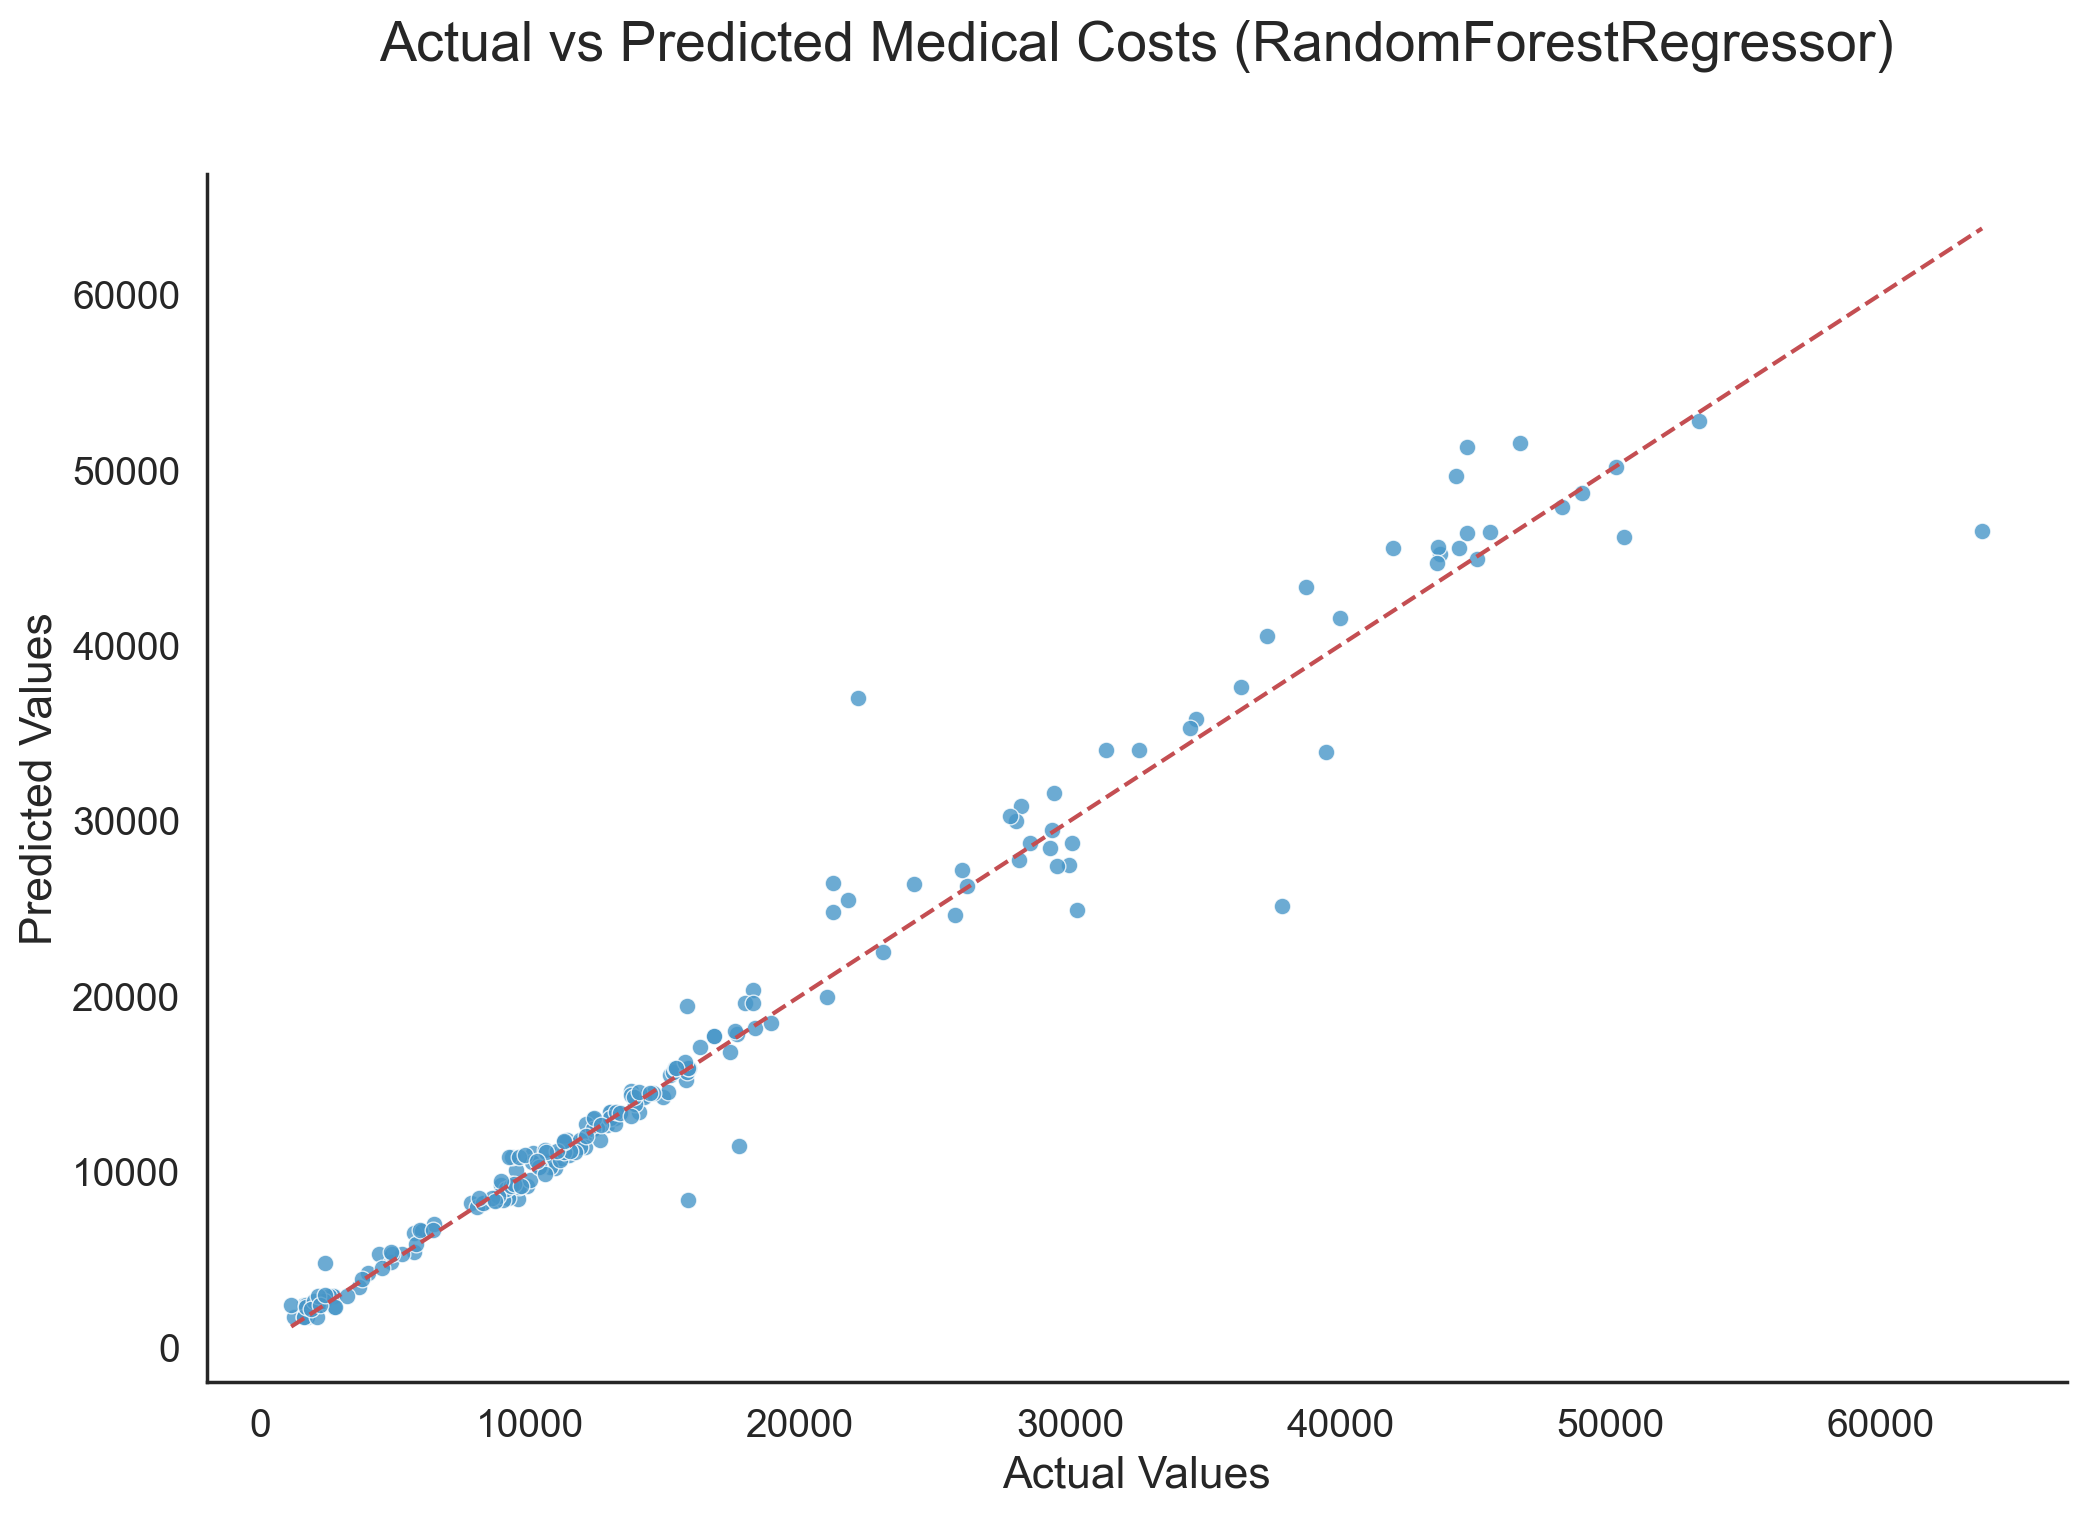

In [87]:
# Visualization for RandomForestRegressor
plt.figure(figsize=(12, 8))
sns.set_style("white")  # Ensures background is white and no grid
sns.scatterplot(x=y_test, y=y_test_pred_rf, alpha=0.8)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r')
plt.xlabel("Actual Values", fontsize=16)
plt.ylabel("Predicted Values", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Actual vs Predicted Medical Costs (RandomForestRegressor)", fontsize=20, y=1.08)
sns.despine()
plt.show()

## Dominant Features Driving the Final Model's Decisions

Understanding which features have the most influence on our model's predictions is key to enhancing its transparency and interpretability. In our RandomForestRegressor, these particular features emerged as especially impactful:

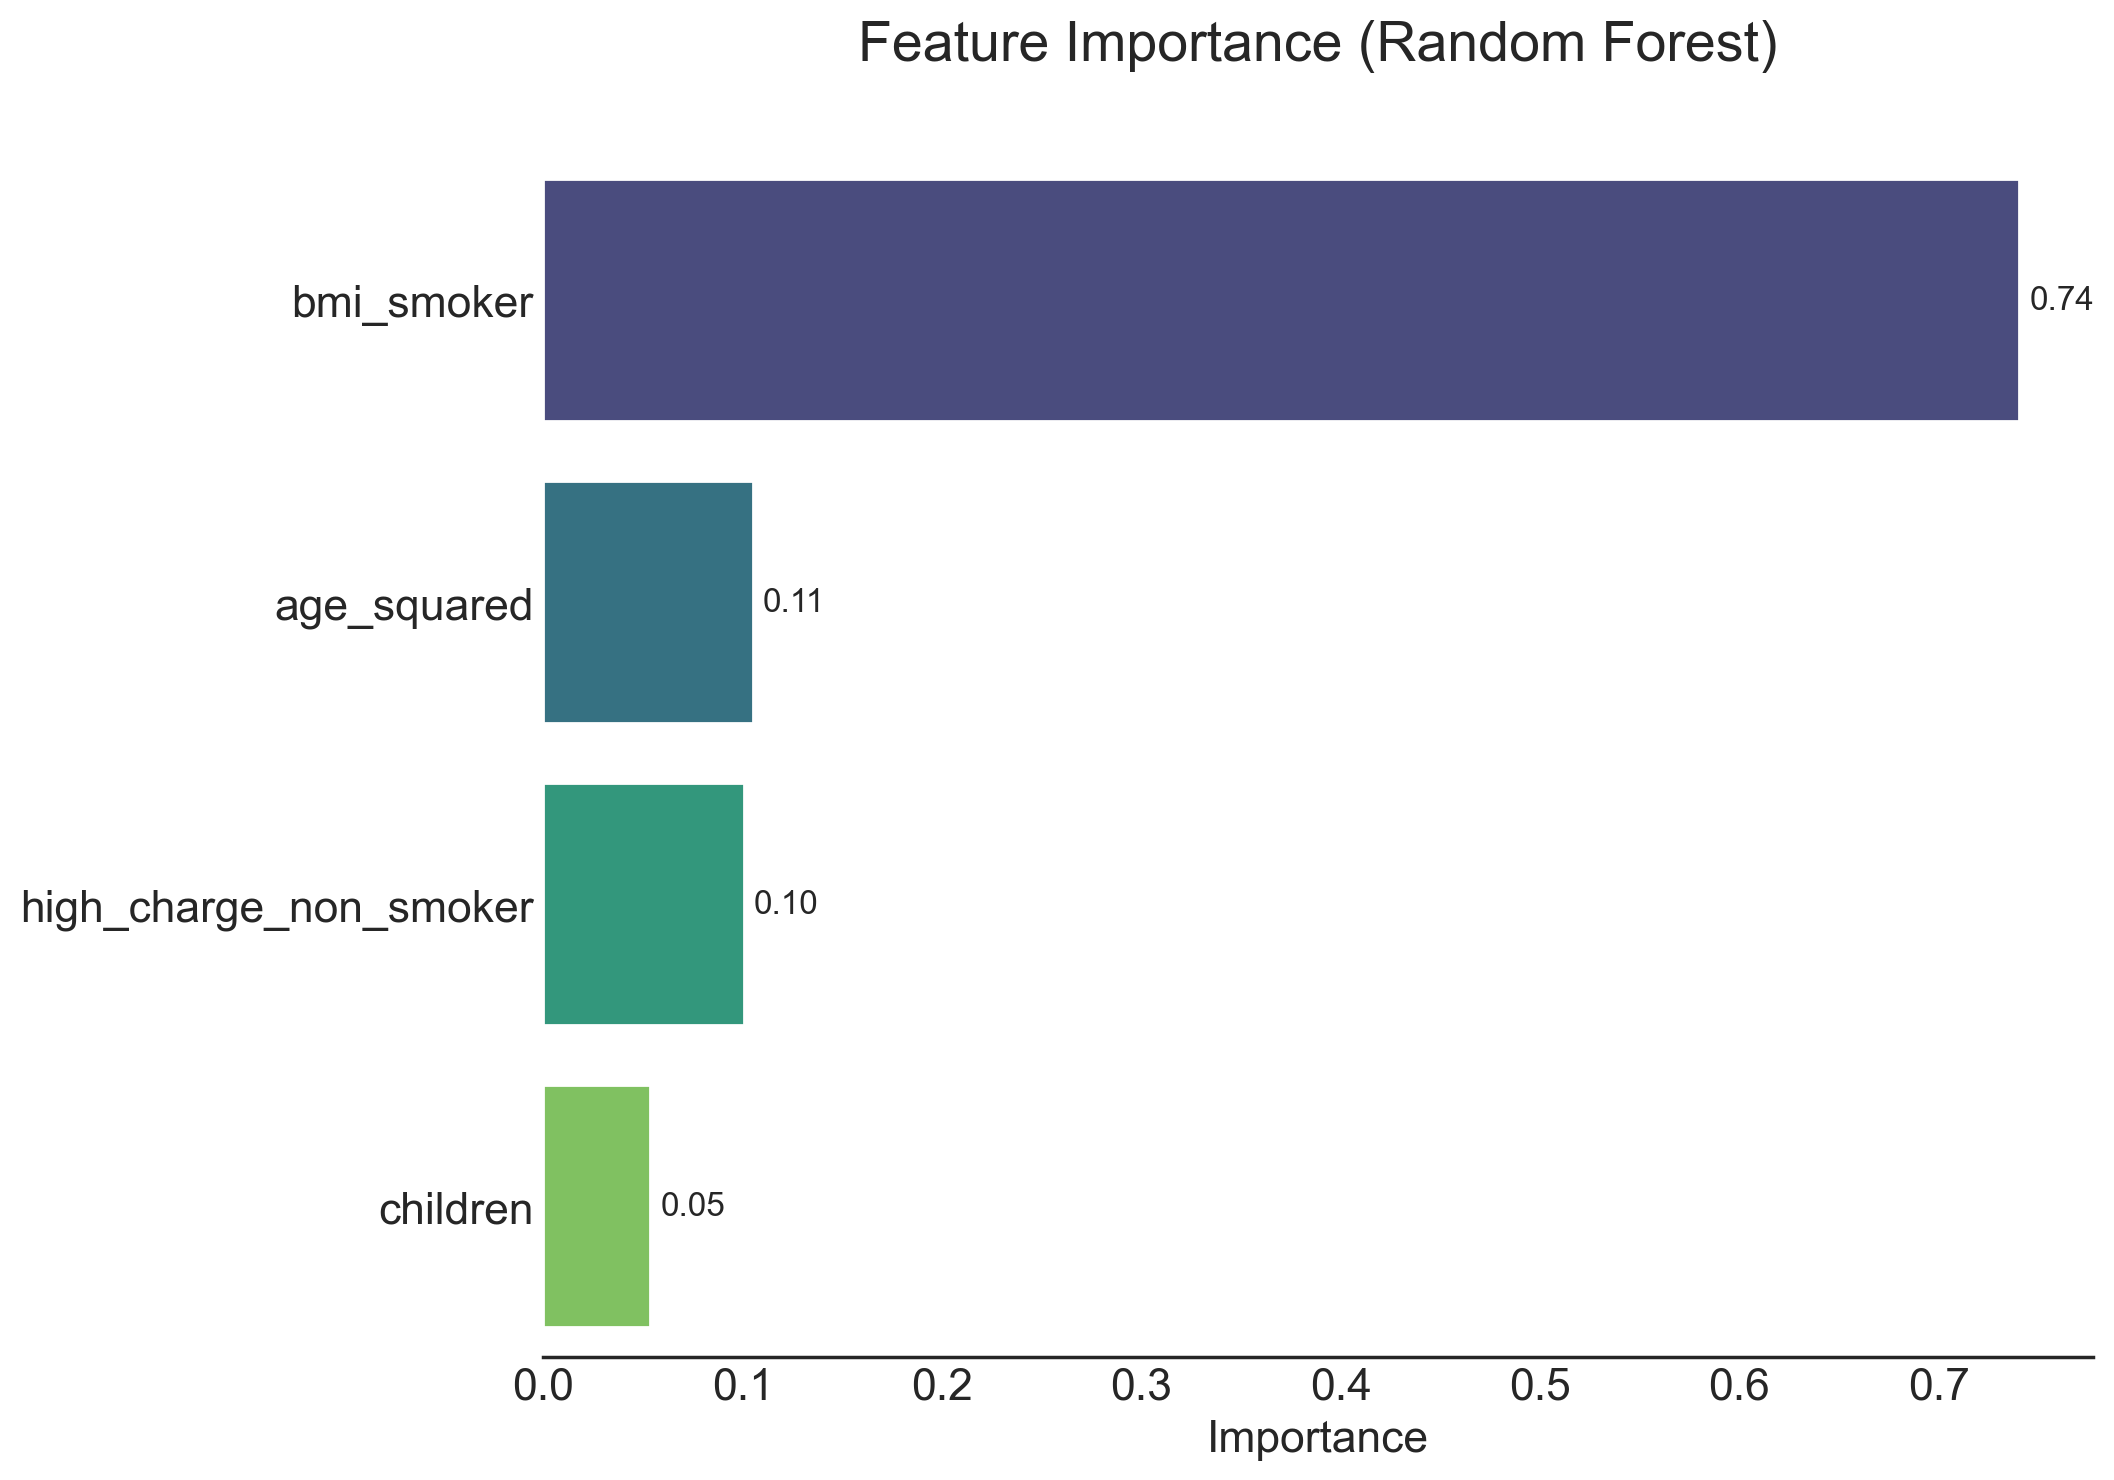

In [93]:
# Plotting function for feature importance
def plot_rf_feature_importance(model, feature_names):
    importances = model.named_steps['randomforestregressor'].feature_importances_
    sorted_indices = importances.argsort()[::-1]
    sorted_importances = importances[sorted_indices]
    
    # Process the feature names to remove unwanted prefixes
    processed_feature_names = [name.split('__')[-1] for name in feature_names]
    sorted_feature_names = [processed_feature_names[i] for i in sorted_indices]

    n = min(9, len(sorted_feature_names))

    plt.figure(figsize=(10, 8))
    ax = sns.barplot(y=sorted_feature_names[:n], x=sorted_importances[:n], palette='viridis')
    
    plt.title('Feature Importance (Random Forest)', fontsize=20, y=1.06)
    plt.xlabel('Importance', fontsize=16)
    plt.yticks(fontsize=16)
    plt.xticks(fontsize=16)
    plt.tick_params(axis='both', length=0)
    sns.despine(left=True)
    
    for i, v in enumerate(sorted_importances[:n]):
        ax.text(v + 0.005, i, f'{v:.2f}', fontsize=12, va='center')
    plt.show()

# Get the fitted preprocessor from the pipeline
fitted_preprocessor = grid_rf.best_estimator_.named_steps['columntransformer']

# Now get feature names from the fitted preprocessor
feature_names = fitted_preprocessor.get_feature_names_out()

# Display feature importances after training
plot_rf_feature_importance(grid_rf.best_estimator_, feature_names=feature_names)

## Performance Metrics for RandomForestRegressor Final Model

In [134]:
# Function to display metrics for test data for RandomForestRegressor
def display_test_metrics_rf(y_test, y_pred):
    """Displays RMSE, MAE, and R2 Score for test data."""
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    metrics_table = PrettyTable(["Metric", "Test"])
    metrics_table.add_row(["RMSE", f"{rmse:.2f}"])
    metrics_table.add_row(["MAE", f"{mae:.2f}"])
    metrics_table.add_row(["R2 Score", f"{r2:.2f}"])
    
    print(metrics_table)

# Final evaluation for the RandomForestRegressor model
print("\nPerformance Metrics for RandomForestRegressor\n")
#print("="*45, "\n")
y_test_pred_rf = grid_rf.predict(X_test)

# Display the metrics for the test data for RandomForestRegressor
display_test_metrics_rf(y_test, y_test_pred_rf)



Performance Metrics for RandomForestRegressor

+----------+---------+
|  Metric  |   Test  |
+----------+---------+
|   RMSE   | 2427.95 |
|   MAE    | 1118.93 |
| R2 Score |   0.96  |
+----------+---------+


<hr style="border:1px solid #4A90E2"> </hr>

<a name="Conclusion"></a>
# **Conclusion**

In this project, I embarked on an insightful journey through exploratory data analysis, feature engineering, and machine learning model optimization. Here are some highlights and key takeaways:

1. **The Power of Feature Engineering:** A testament to the importance of domain knowledge and creativity in data science. We engineered three out of the four features that our final model utilized, one of which was an interaction term that proved invaluable. The data spoke, and we listened.

2. **Minimalist Approach:** With an emphasis on interpretability, we strived to utilize the fewest features possible. The result? A robust RandomForestRegressor model that achieved an R^2 score of 0.96 on the test data using just four features.

3. **Custom Feature Selection:** The development and deployment of a custom feature selection algorithm using an "incremental or greedy forward feature selection strategy" stands as one of our hallmark achievements. It underscores the notion that bespoke solutions can, at times, surpass conventional out-of-the-box methods.

4. **Hyperparameter Tuning Mastery:** Through rigorous hyperparameter tuning, not only did we achieve outstanding model performance, but I also gained a nuanced understanding of the intricacies of the RandomForestRegressor and XGBRegressor models. It’s clear: the devil is in the details.

5. **Interpretability is Key:** Our emphasis on model simplicity wasn’t just a philosophical choice. In the real world, a model's recommendations, especially in sectors like healthcare, need to be transparent. Our project showcases that you don’t always have to sacrifice performance for clarity.

6. **Lessons in Multicollinearity:** We tackled multicollinearity head-on, demonstrating the importance of a clear predictor interpretation and ensuring model resilience against data shifts.

7. **A Testament to Iterative Refinement:** From EDA to model evaluation, our project was an exercise in iterative refinement, underscored by regular validation checkpoints to ensure empirical, bias-minimized decision making.

I am incredibly proud of the results we achieved and the methodologies we employed. I believe this project underscores my skills in data science and showcases the blend of creativity, technical expertise, and pragmatic decision-making I bring to the table.

Feel free to delve deeper into the repository, ask any questions, or provide feedback. Looking forward to collaborative opportunities!


<br><br><br>

<div style="text-align: left;">
<a href="https://freeimage.host/i/HXsIQUv"><img src="https://iili.io/HXsIQUv.md.jpg" alt="HXsIQUv.md.jpg" border="0" width="450"></a>
</div>

<hr style="border:4px solid #4A90E2"> </hr>